In [1]:
import pandas as pd
data = pd.read_excel('data.xlsx')
data.set_index('Year', inplace=True)

C:\Users\ygurbuz\AppData\Local\Temp\ipykernel_13464\106093899.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data

BDI-Population, total  BDI-Population growth (annual %)  \
Year                                                            
2005                7388874                          3.699797   
2006                7658190                          3.580031   
2007                7944609                          3.671792   
2008                8278109                          4.112098   
2009                8709366                          5.078444   
2010                9126605                          4.679478   
2011                9455733                          3.542745   
2012                9795479                          3.529973   
2013               10149577                          3.551108   
2014               10494913                          3.345863   
2015               10727148                          2.188706   
2016               10903327                          1.629025   
2017               11155593                          2.287301   
2018               11493472                          2.983824   
2019               11874838                          3.264249   
2020               12220227                          2.867082   
2021               12551213                          2.672478   
2022               12889576                          2.660161   

      BDI-Population density (people per sq. km of land area)  \
Year                                                            
2005                                         287.728738         
2006                                         298.216121         
2007                                         309.369509         
2008                                         322.356269         
2009                                         339.149766         
2010                                         355.397391         
2011                                         368.213902         
2012                                         381.443886         
2013                                         395.232749         
2014                                         408.680413         
2015                                         417.723832         
2016                                         424.584385         
2017                                         434.407827         
2018                                         447.565109         
2019                                         462.415810         
2020                                         475.865537         
2021                                         488.754400         
2022                                         488.754400         

      BDI-GNI, Atlas method (current US$)  \
Year                                        
2005                         9.955266e+08   
2006                         1.175593e+09   
2007                         1.332125e+09   
2008                         1.516882e+09   
2009                         1.667672e+09   
2010                         1.895261e+09   
2011                         2.104212e+09   
2012                         2.314488e+09   
2013                         2.477671e+09   
2014                         2.602424e+09   
2015                         2.652740e+09   
2016                         2.698514e+09   
2017                         2.772947e+09   
2018                         2.751049e+09   
2019                         2.752978e+09   
2020                         2.699979e+09   
2021                         2.815868e+09   
2022                         3.117740e+09   

      BDI-GNI per capita, Atlas method (current US$)  \
Year                                                   
2005                                             130   
2006                                             150   
2007                                             170   
2008                                             180   
2009                                             190   
2010                                             210   
2011                                             220   

In [5]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = 'data.xlsx'
df = pd.read_excel(file_path)

# Select the first 10 exogenous variables and the target variable
X = df.iloc[:, 1:134]  # Exclude the 'Year' column and select the first 10 columns
y = df['container_port_traffic']

# Make predictions for each exogenous variable using ARIMA models
future_exog_predictions = {}
for column in X.columns:
    model = ARIMA(df[column], order=(1, 1, 1))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=20)
    future_exog_predictions[column] = forecast

# Convert future exogenous variable values to a DataFrame
future_exog_df = pd.DataFrame(future_exog_predictions)

# Build and train a SARIMAX model
arima_model = ARIMA(y, exog=X, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast 'container_port_traffic' for the next 10 years
forecast_container_port_traffic = arima_result.get_forecast(steps=20, exog=future_exog_df)
forecast_values = forecast_container_port_traffic.predicted_mean
confidence_intervals = forecast_container_port_traffic.conf_int()

In [4]:
# As an example, let's simulate the predicted values and confidence intervals (replace with actual results)
# Convert predicted values and confidence intervals to a DataFrame
forecast_df_example = pd.DataFrame({
    'Year': range(2023, 2043),
    'Predicted container_port_traffic': forecast_values
})

forecast_df_example

Year  Predicted container_port_traffic
18  2023                      1.493933e+06
19  2024                      1.490865e+06
20  2025                      1.490652e+06
21  2026                      1.489686e+06
22  2027                      1.488230e+06
23  2028                      1.486266e+06
24  2029                      1.483796e+06
25  2030                      1.480821e+06
26  2031                      1.477345e+06
27  2032                      1.473367e+06
28  2033                      1.468891e+06
29  2034                      1.463917e+06
30  2035                      1.458448e+06
31  2036                      1.452485e+06
32  2037                      1.446032e+06
33  2038                      1.439089e+06
34  2039                      1.431659e+06
35  2040                      1.423744e+06
36  2041                      1.415347e+06
37  2042                      1.406469e+06

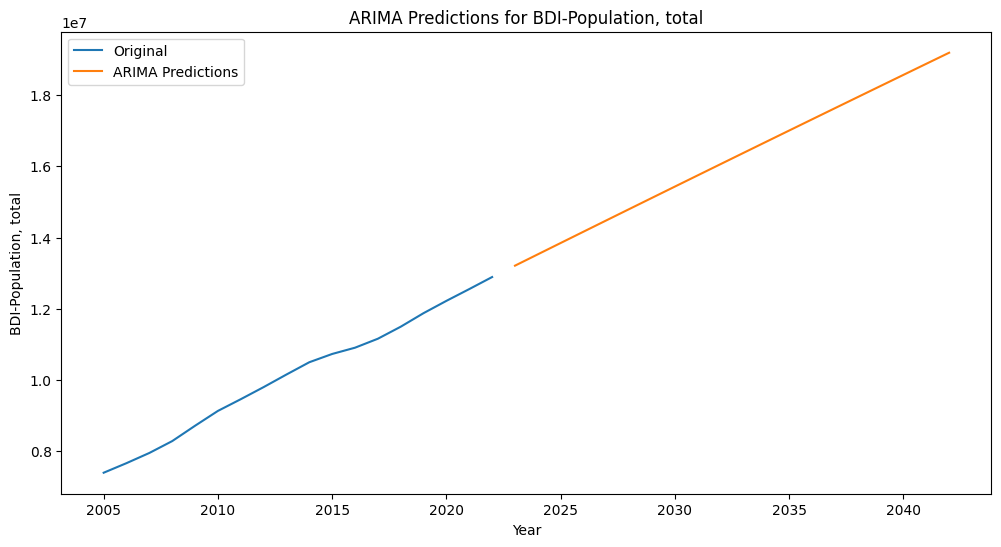

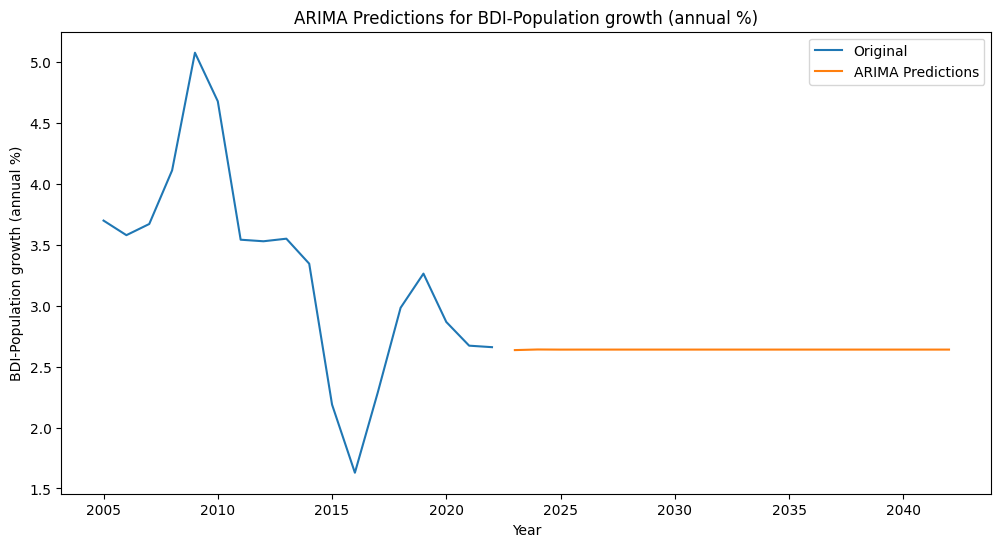

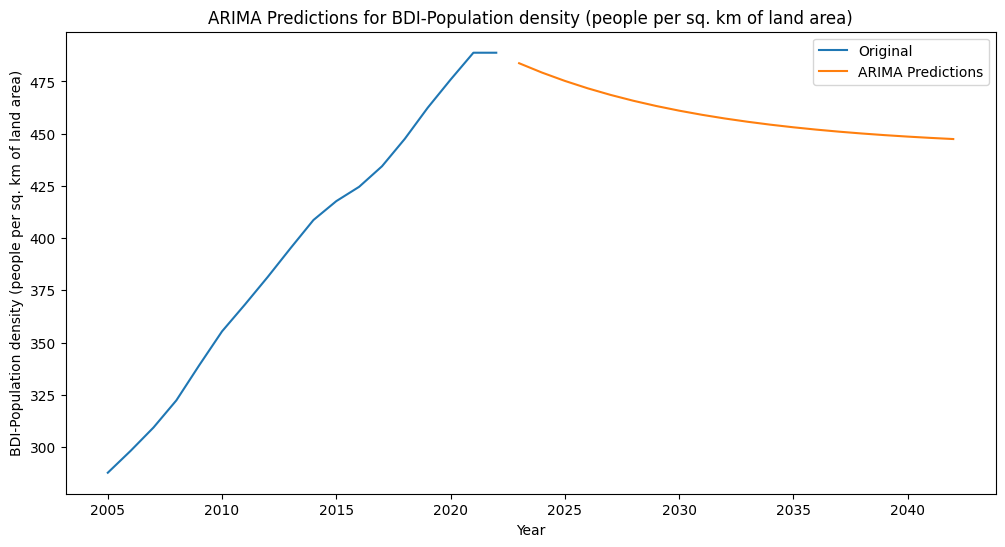

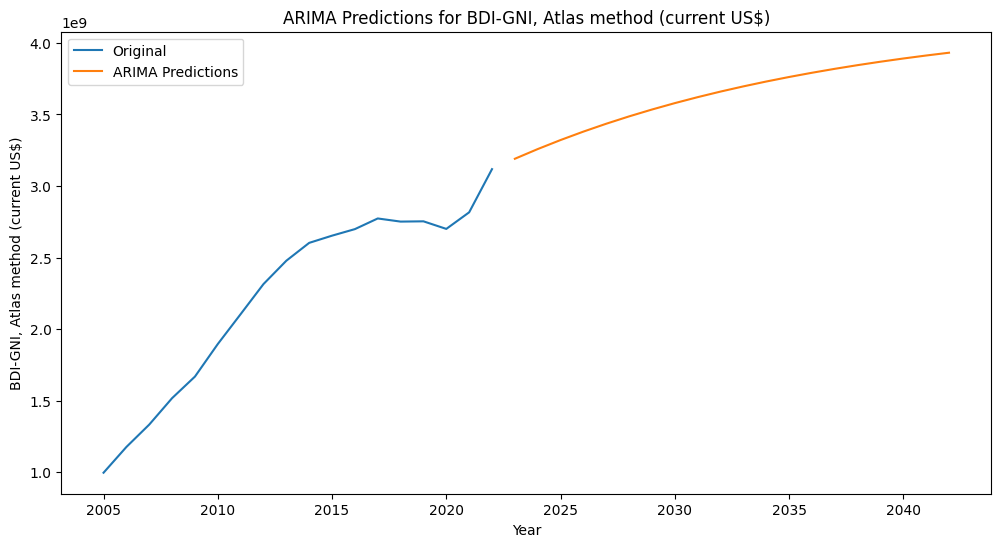

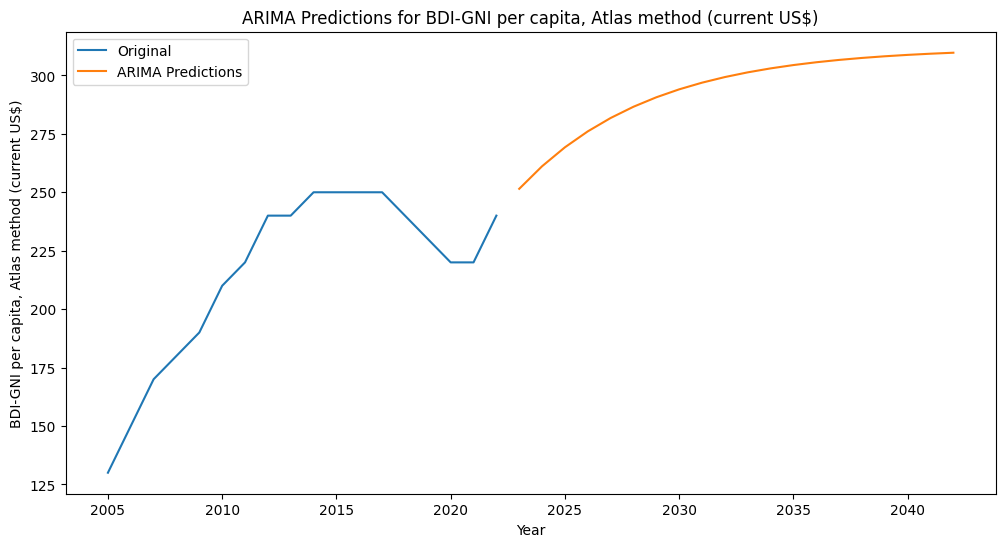

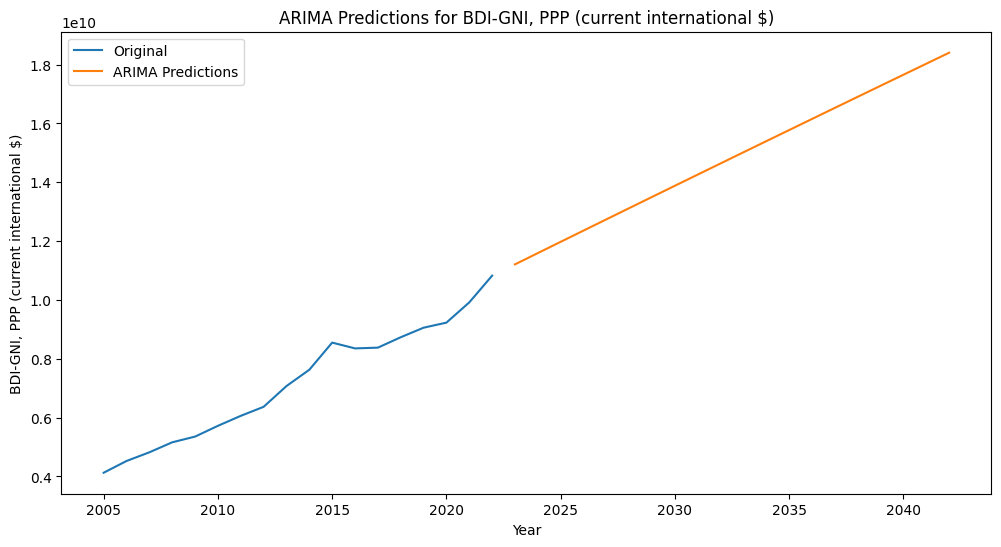

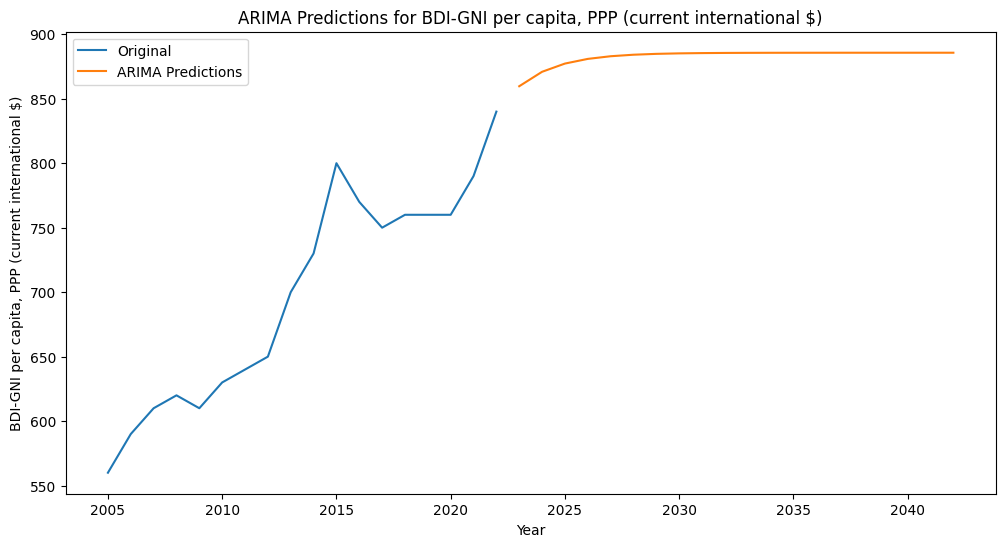

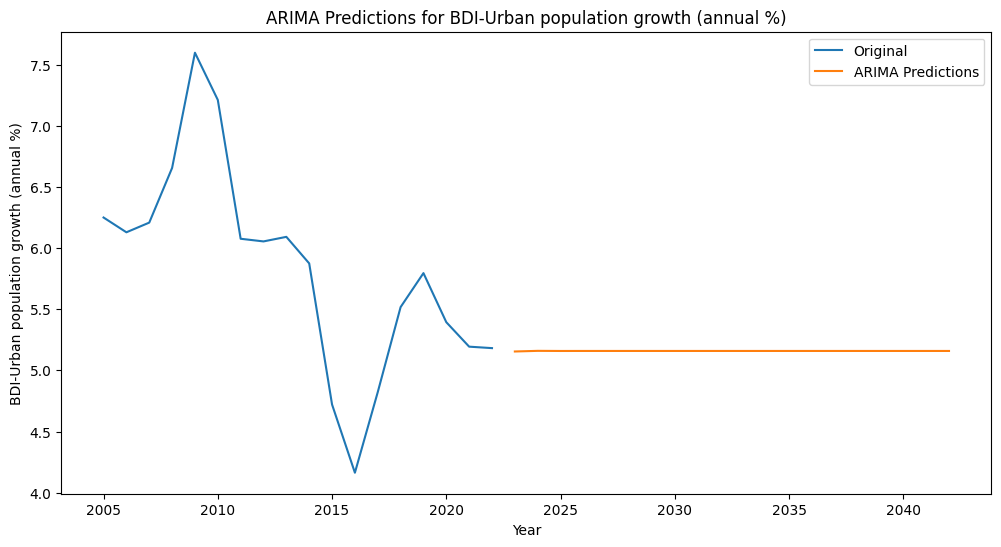

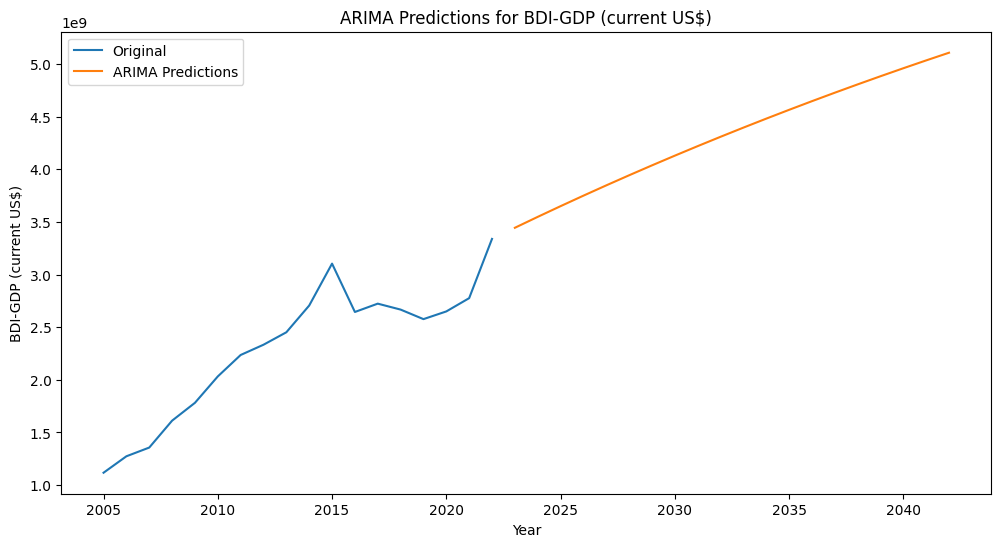

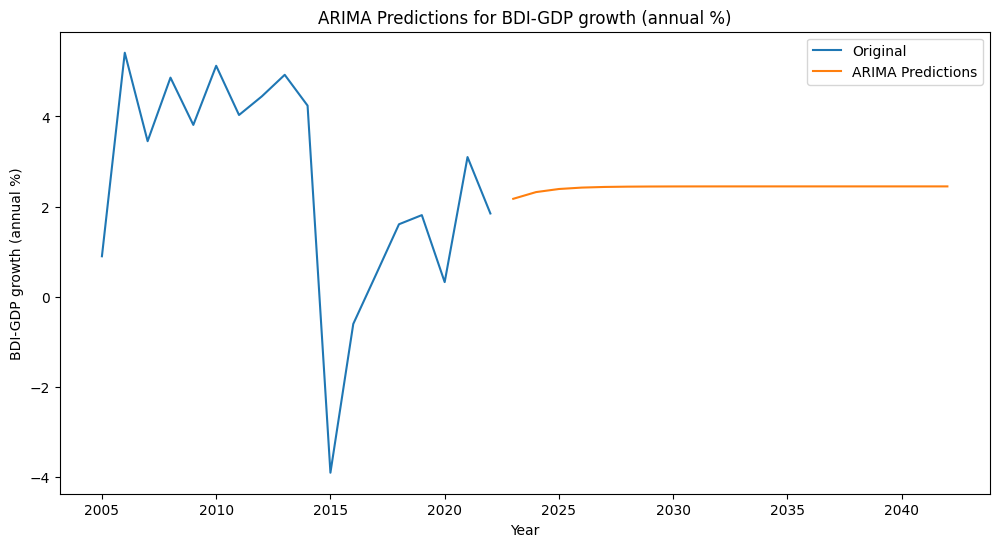

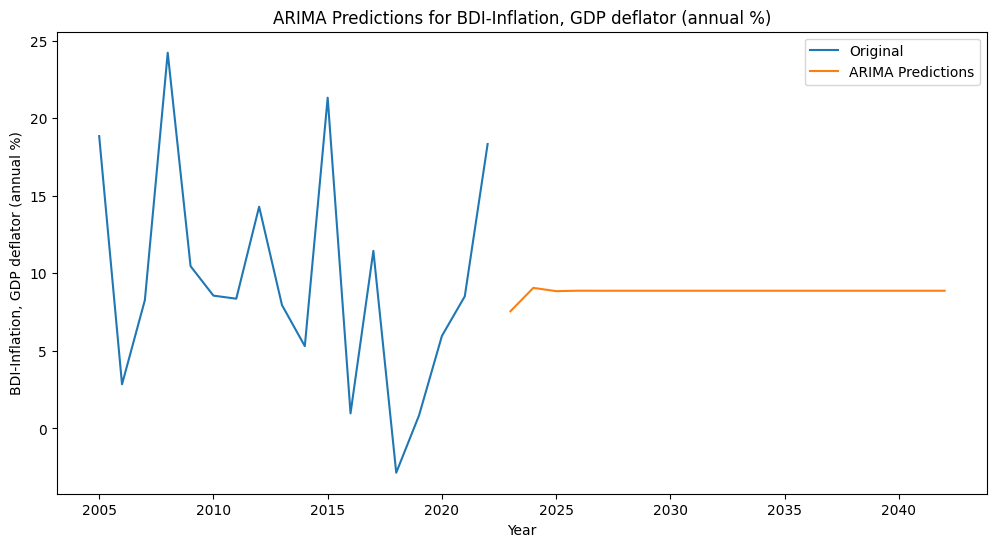

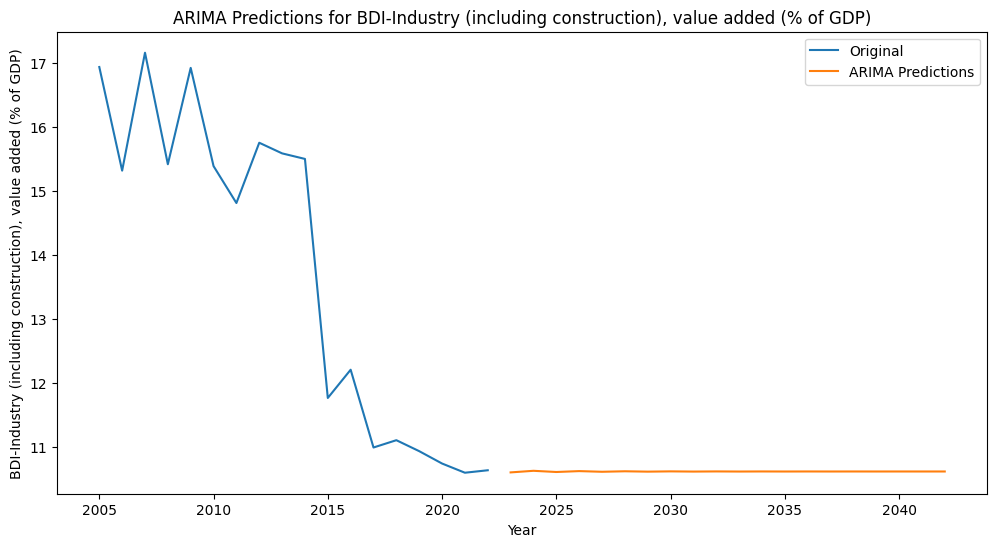

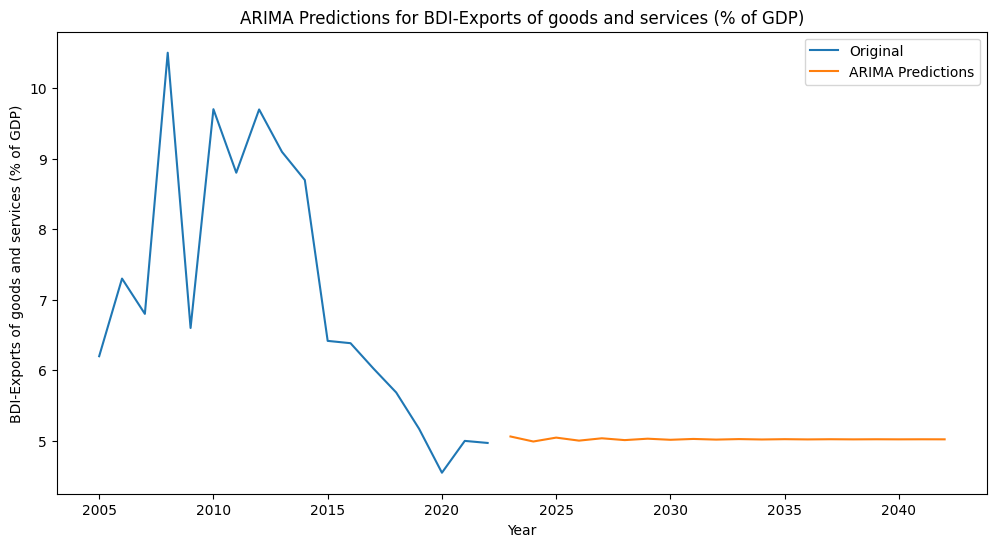

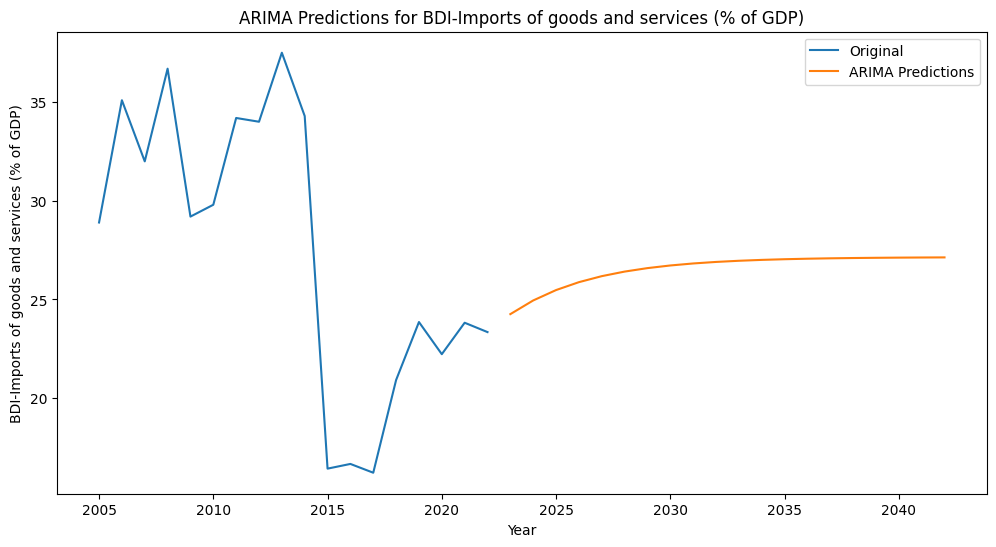

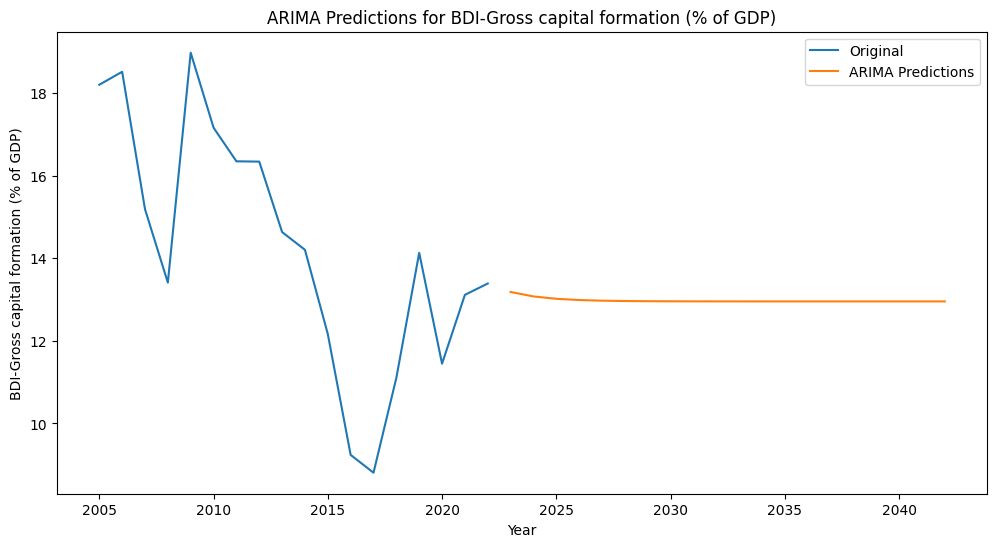

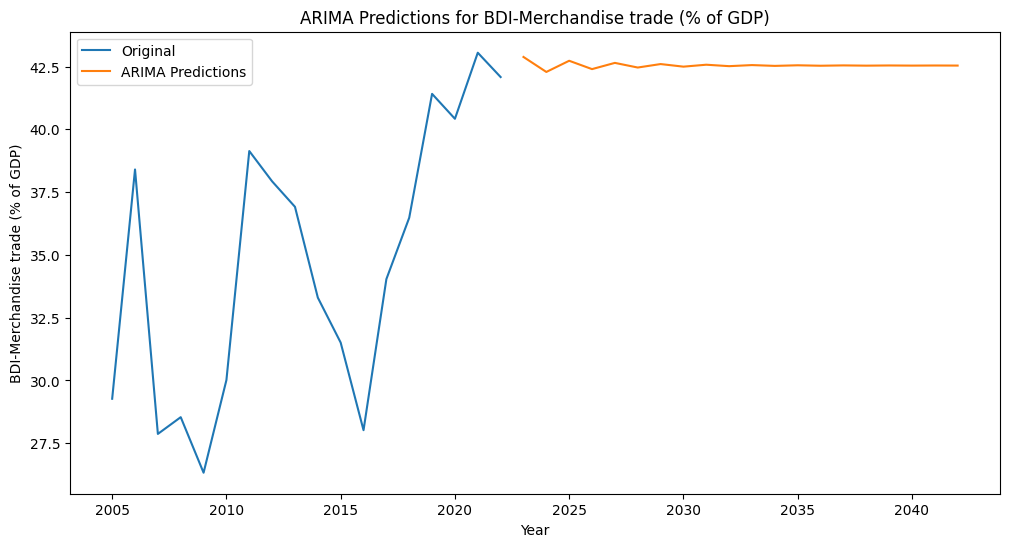

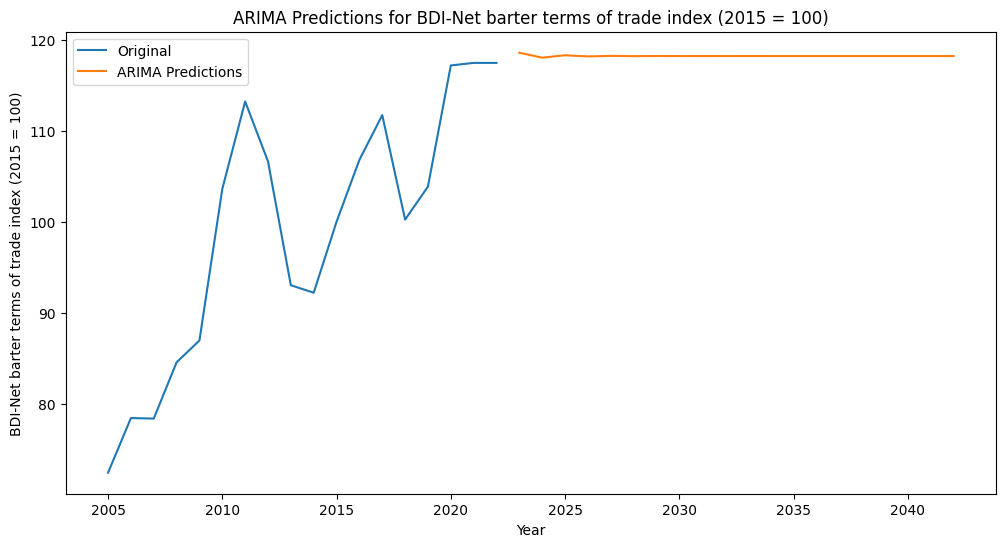

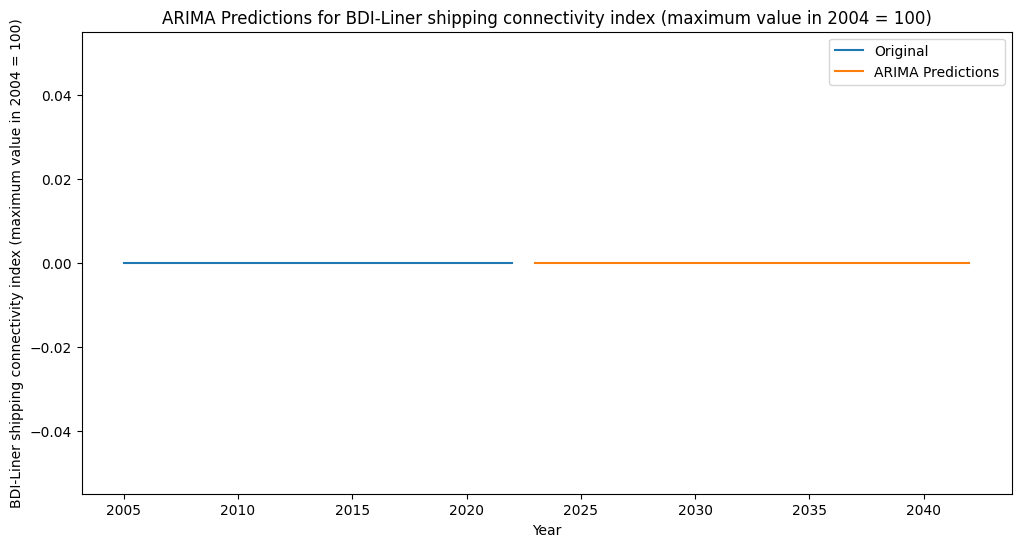

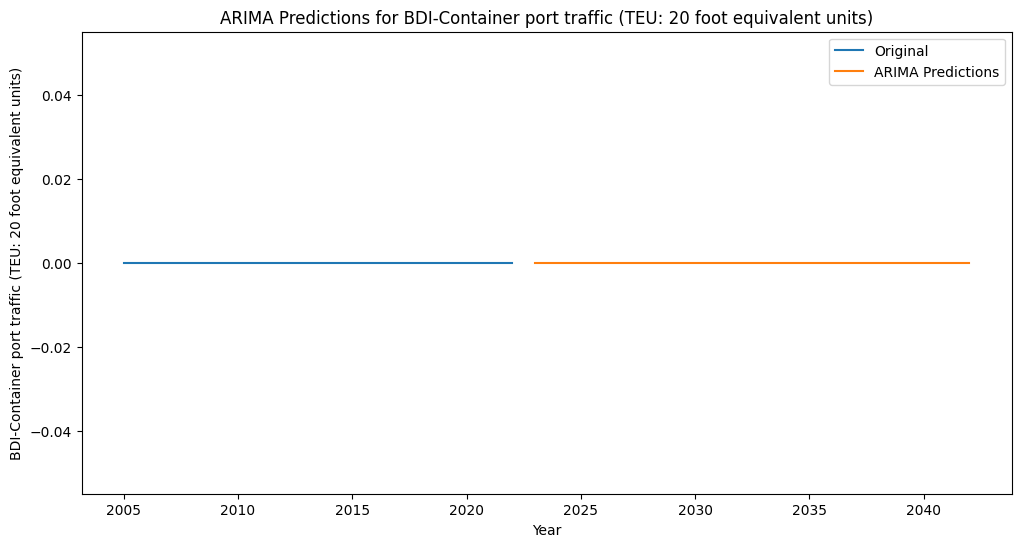

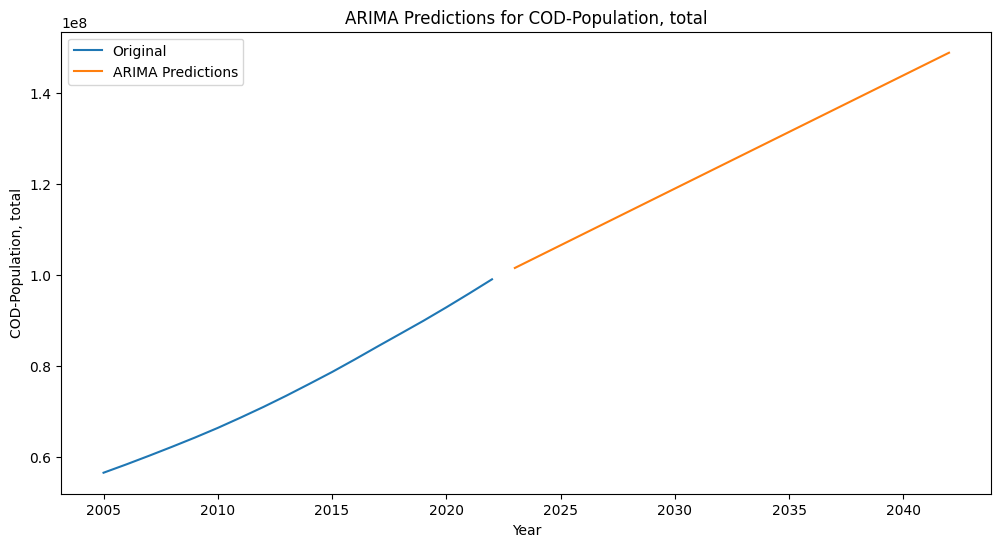

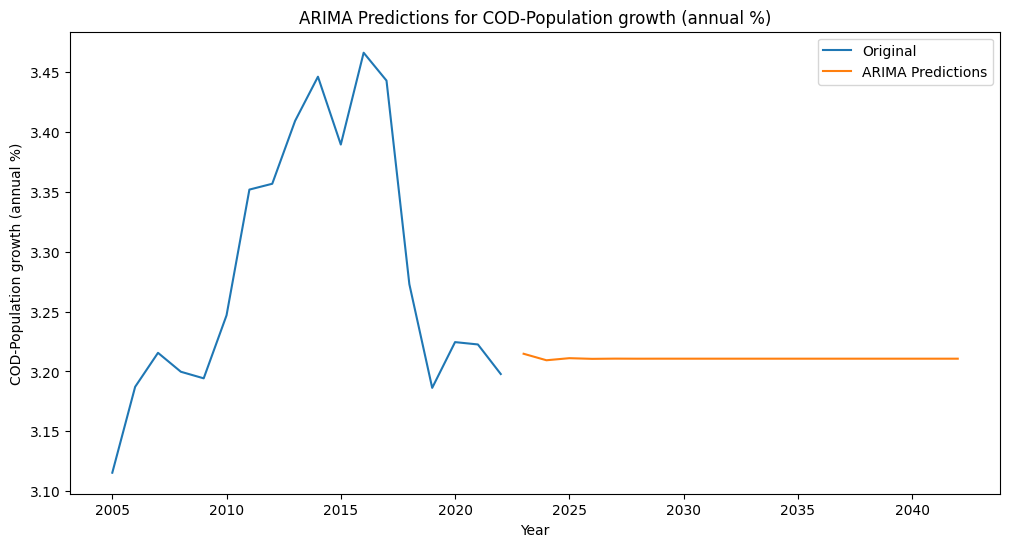

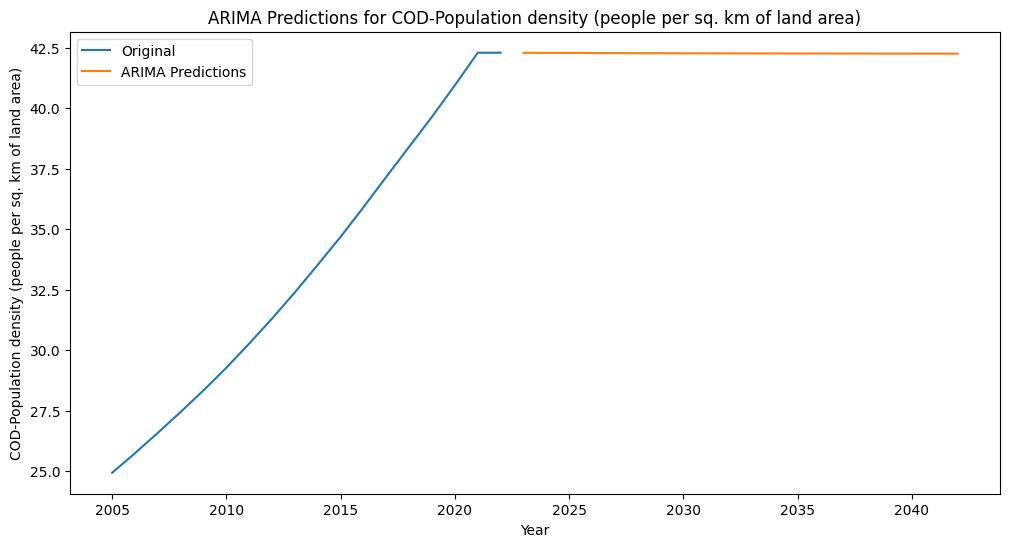

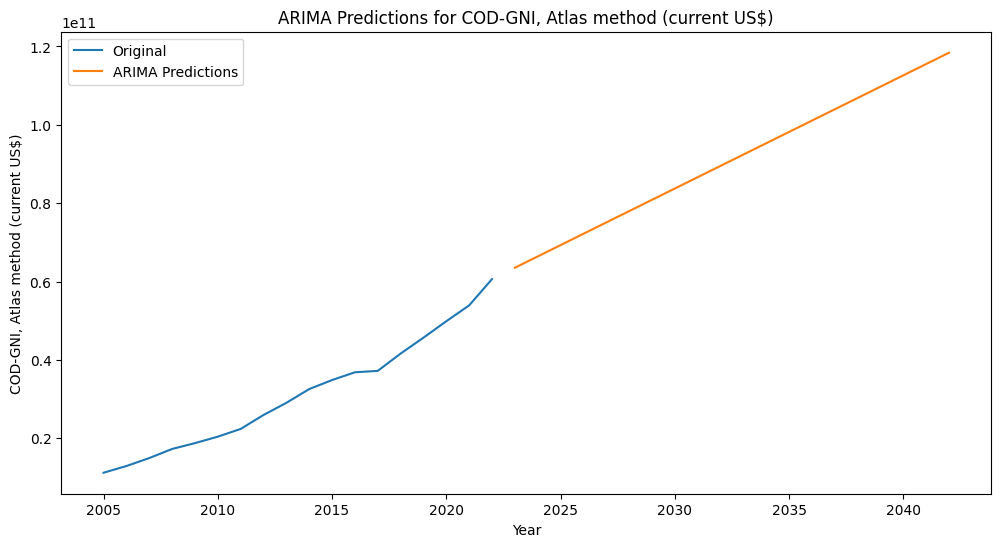

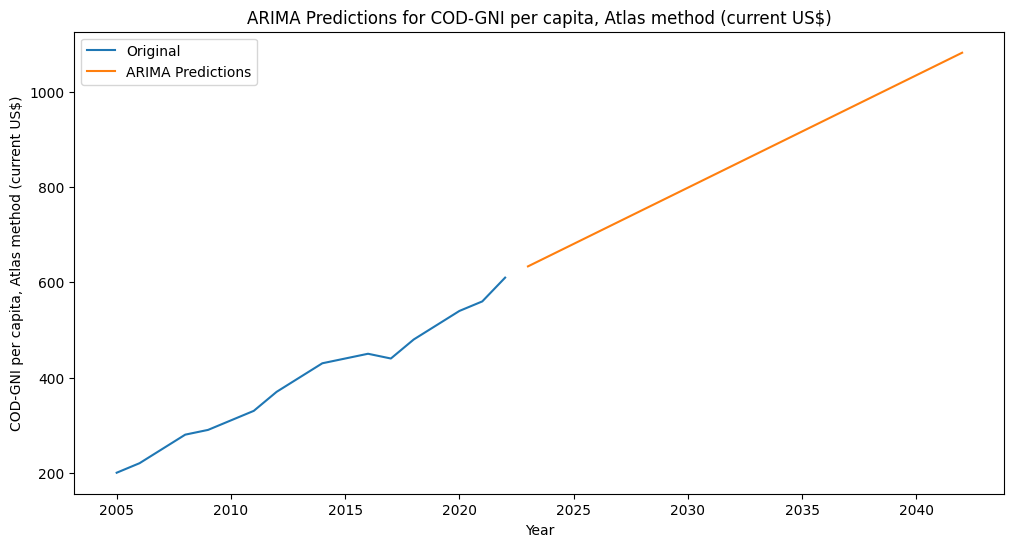

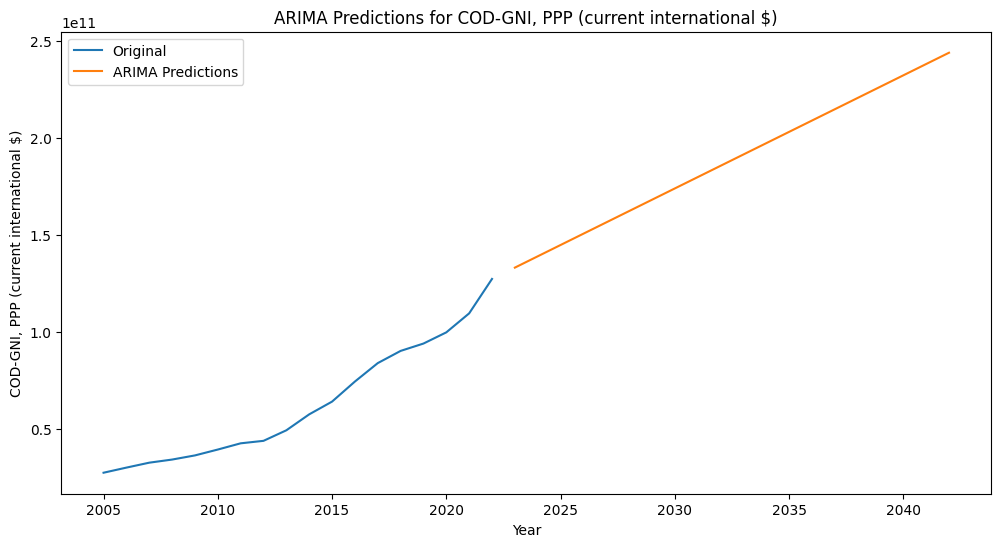

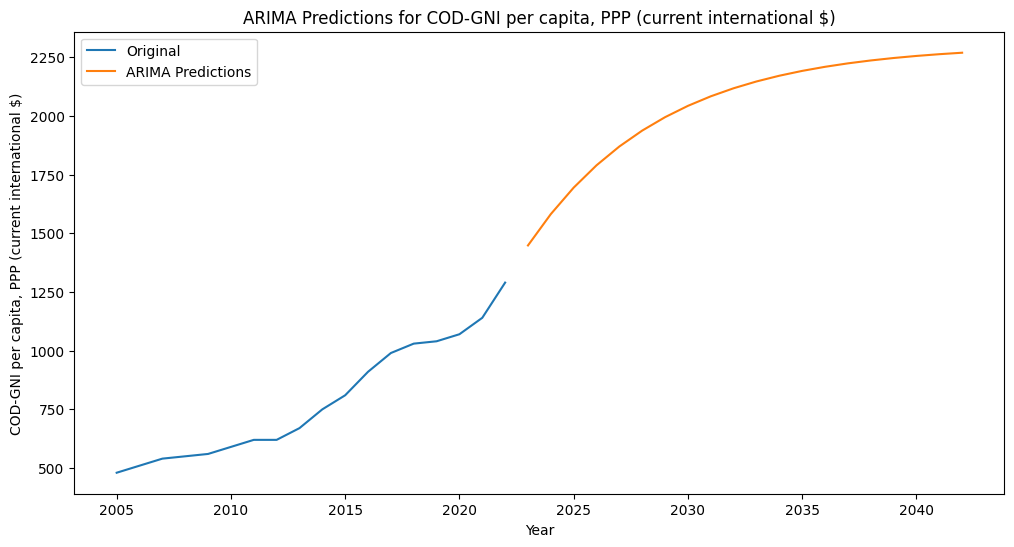

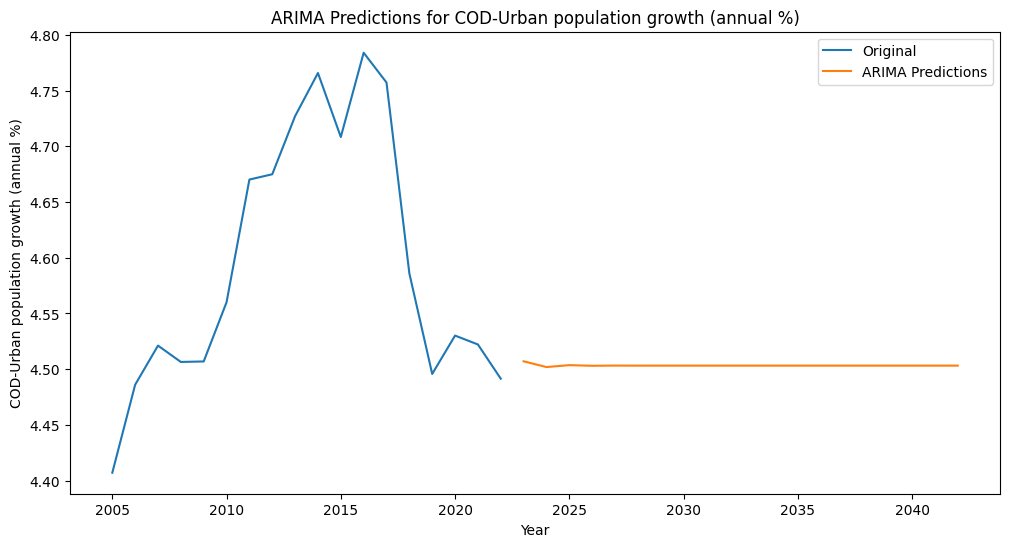

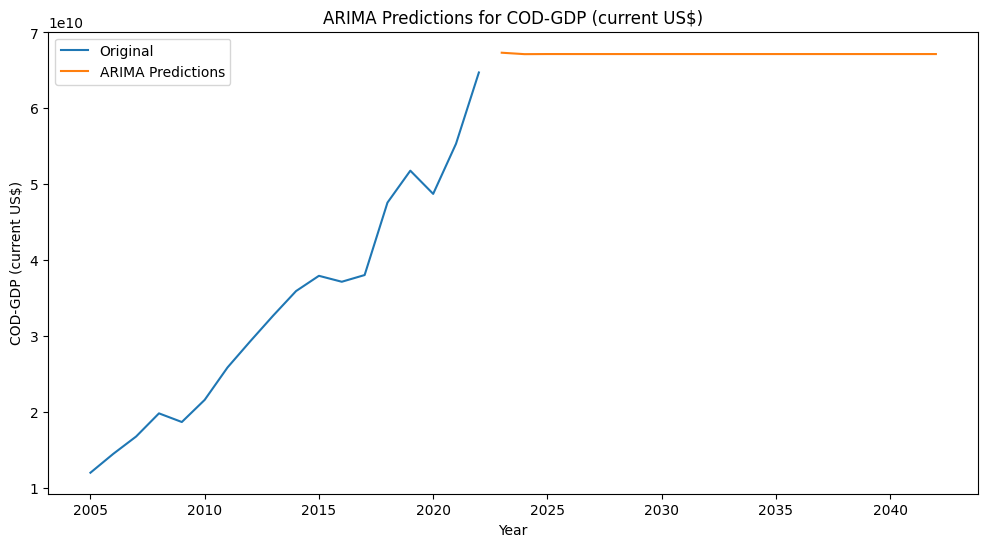

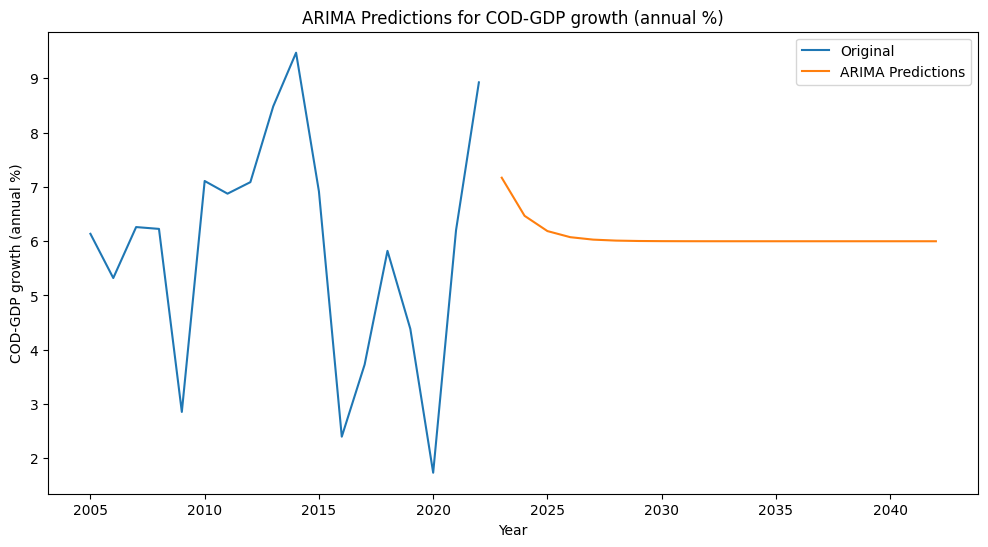

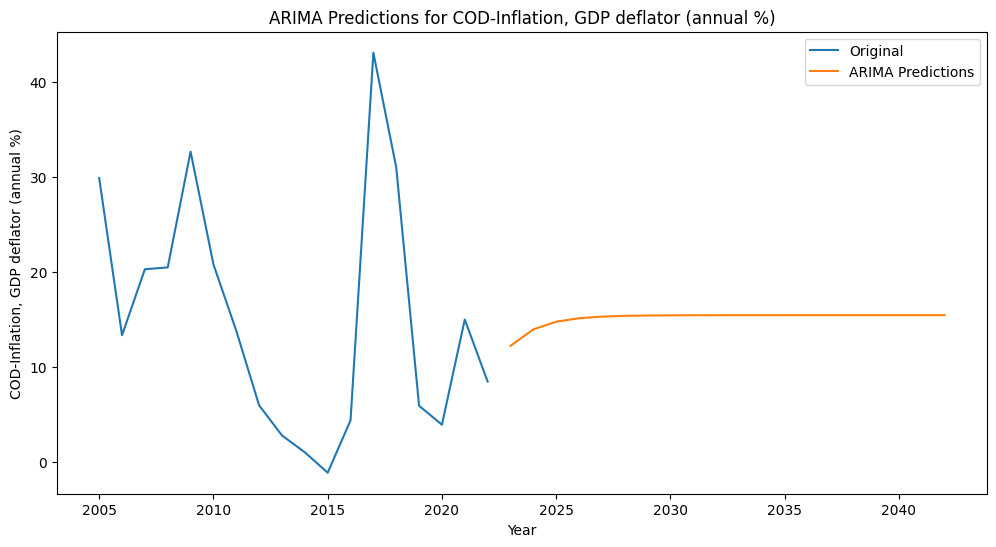

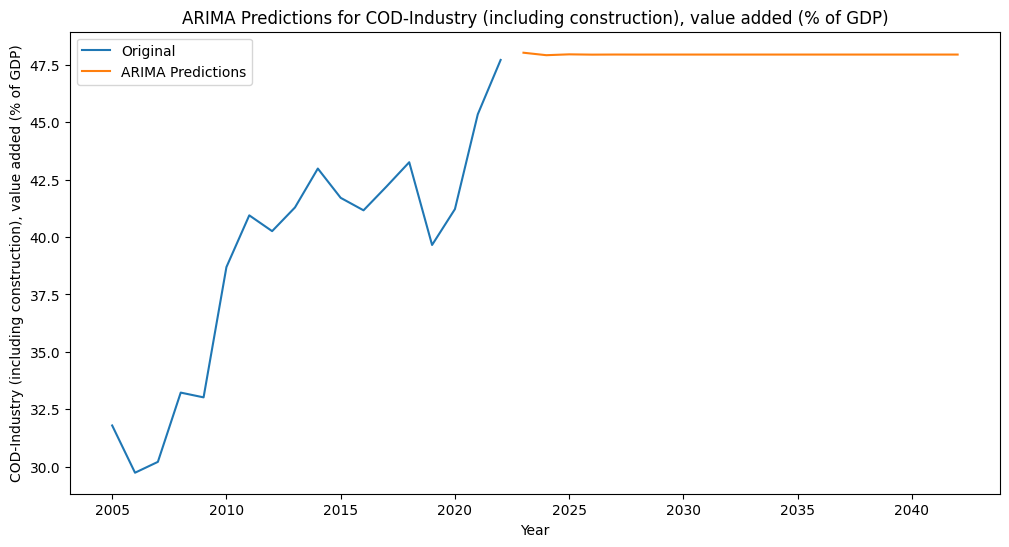

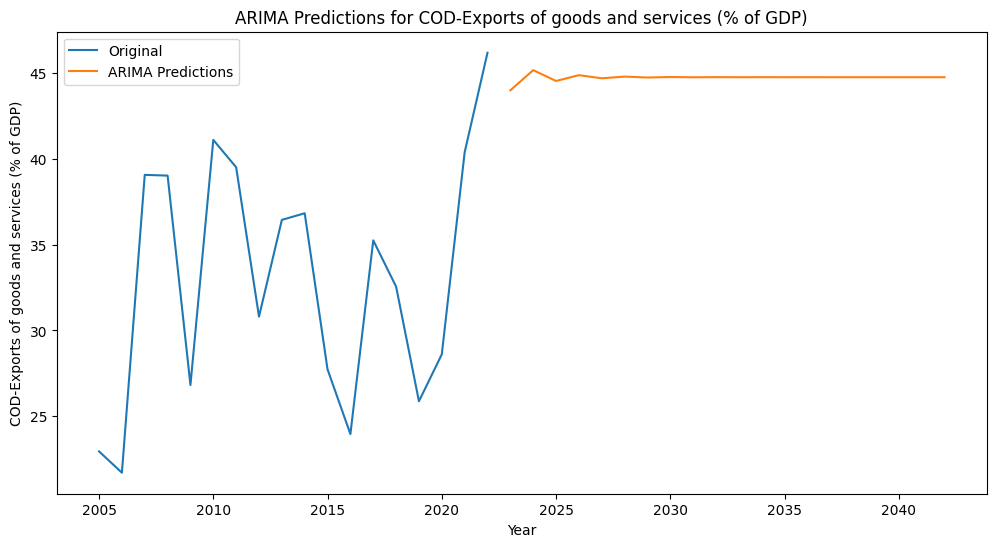

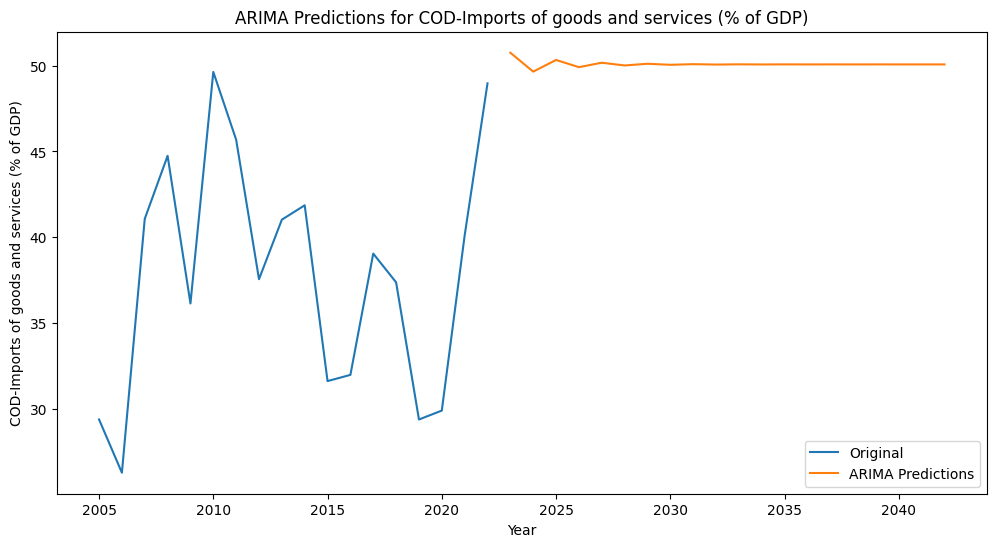

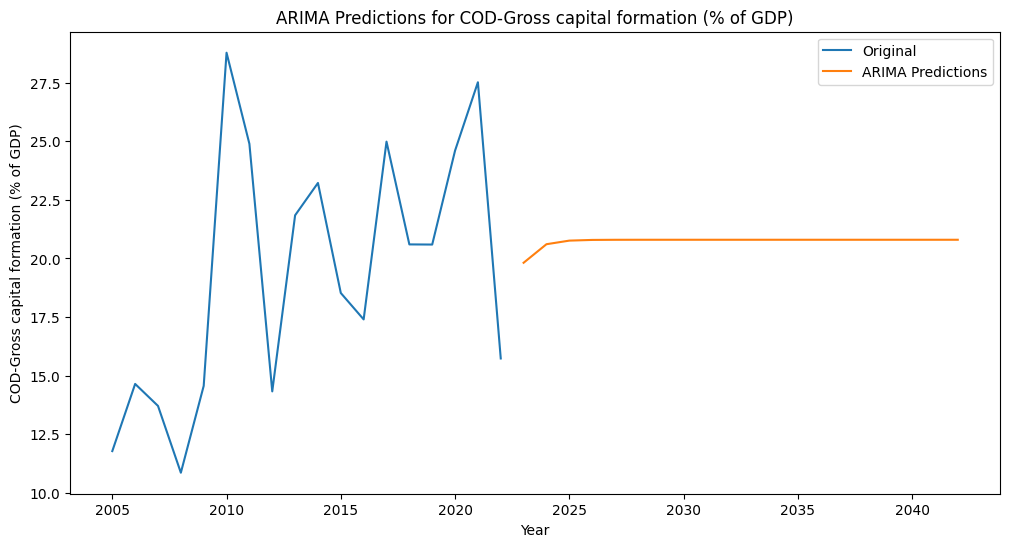

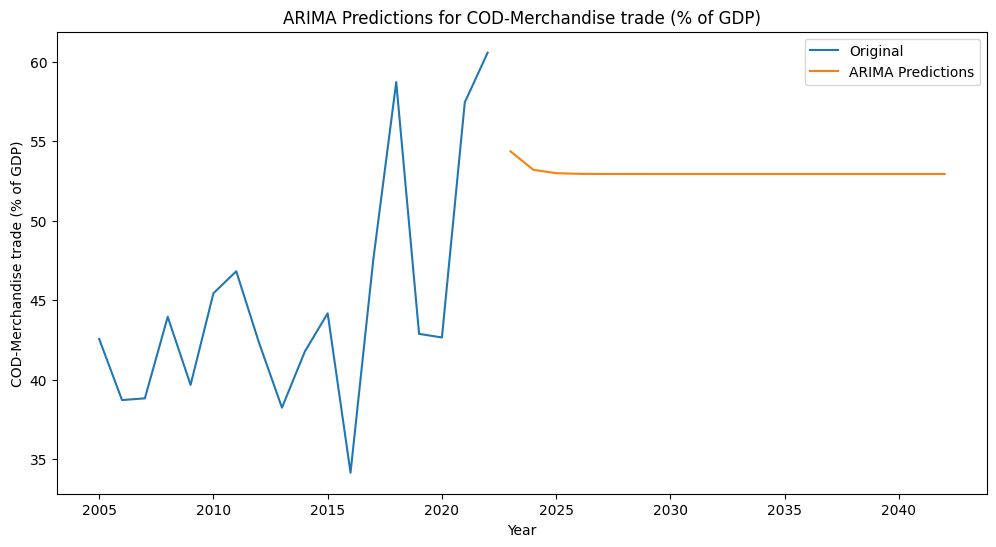

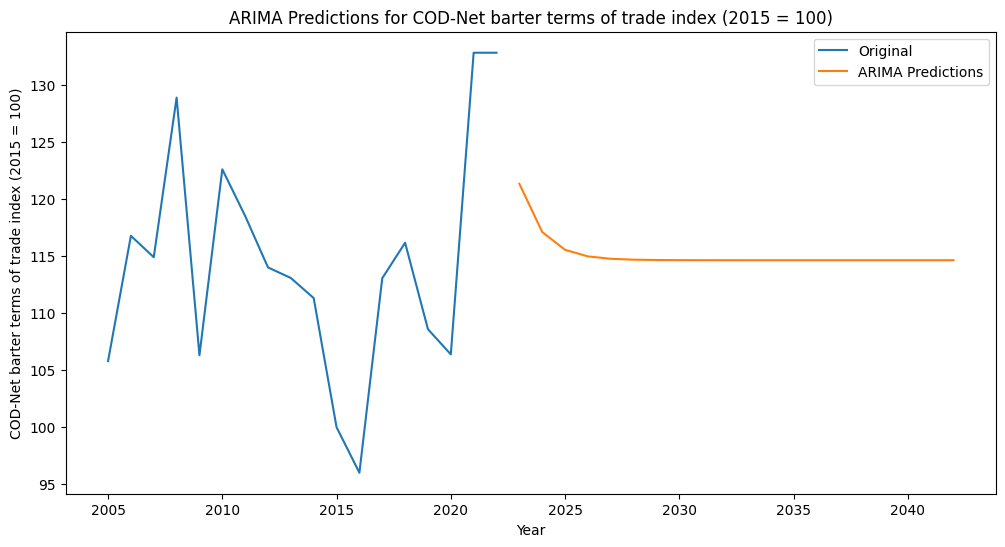

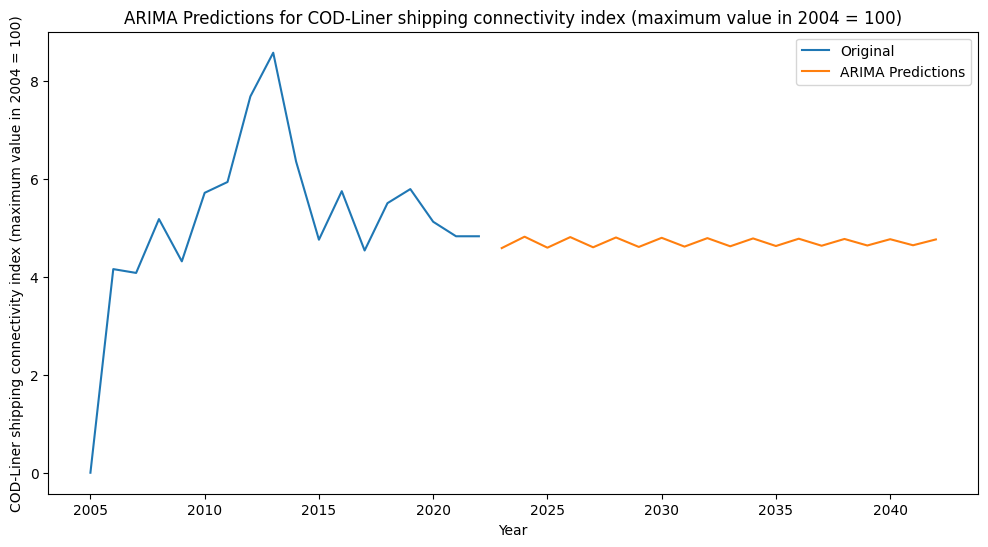

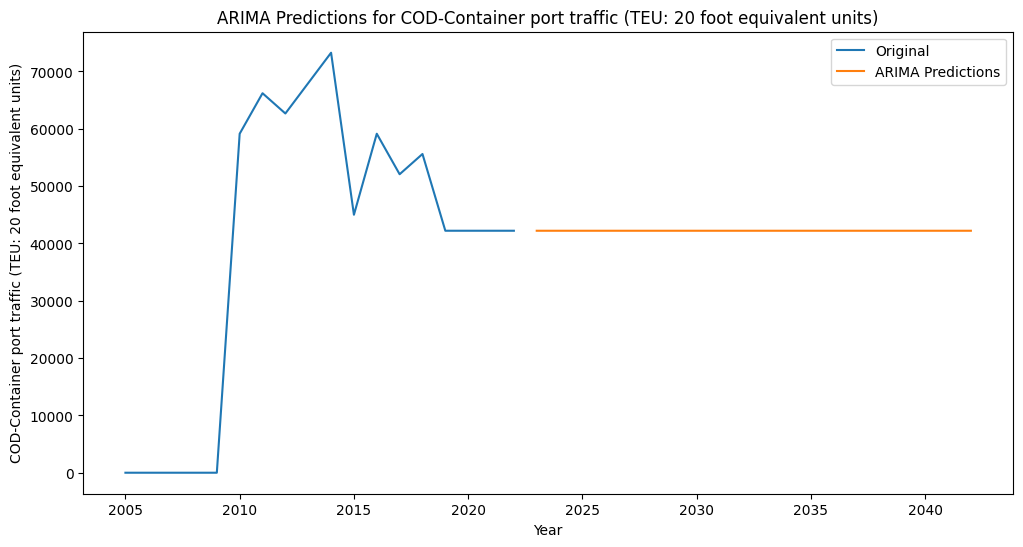

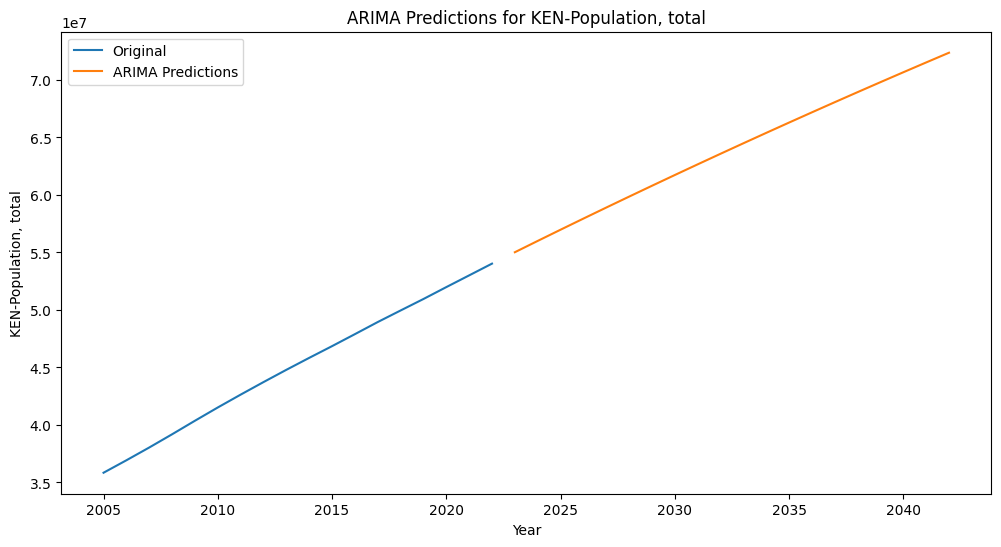

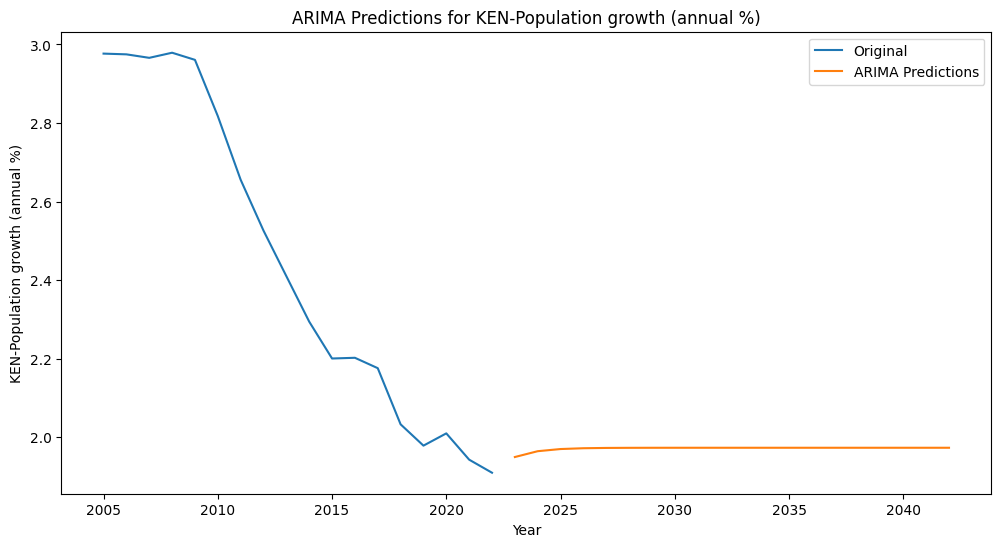

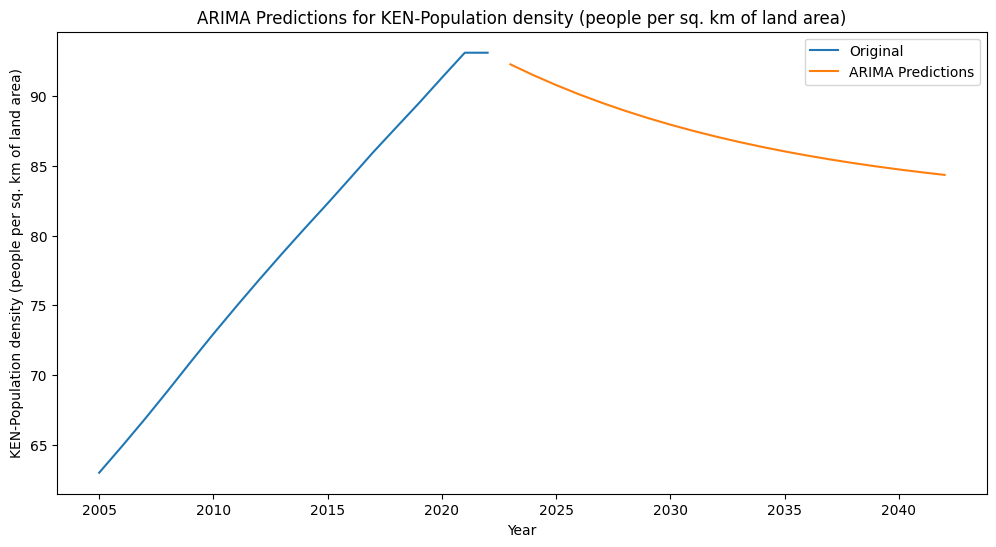

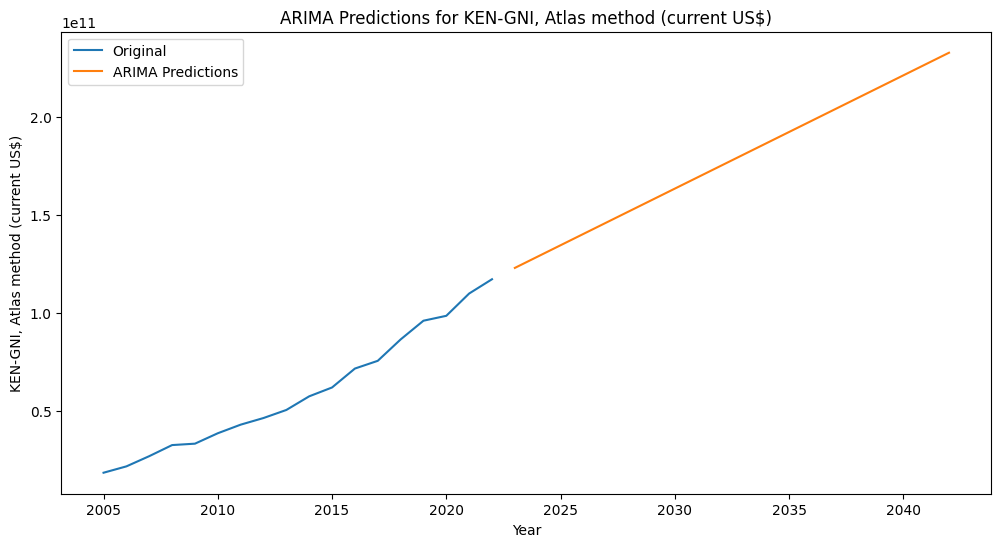

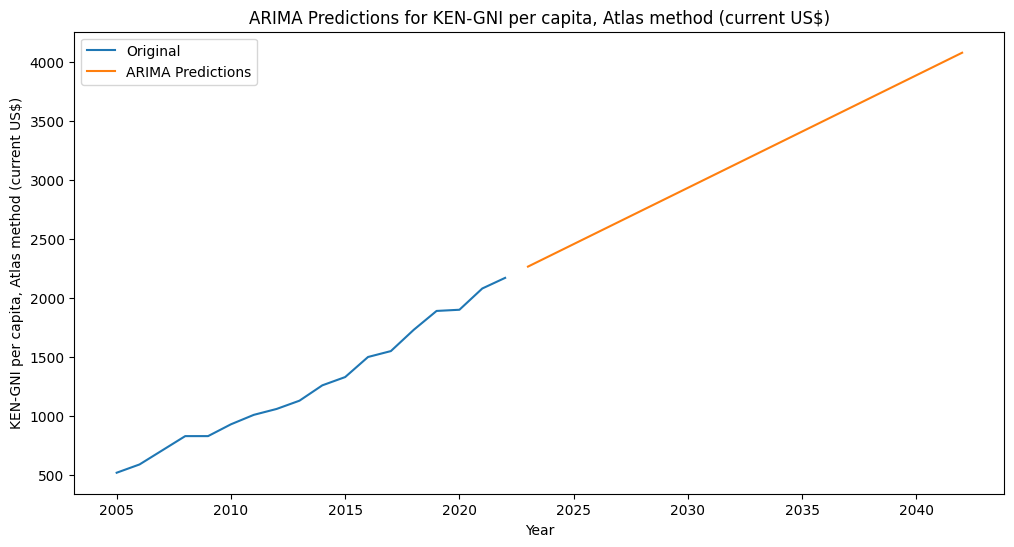

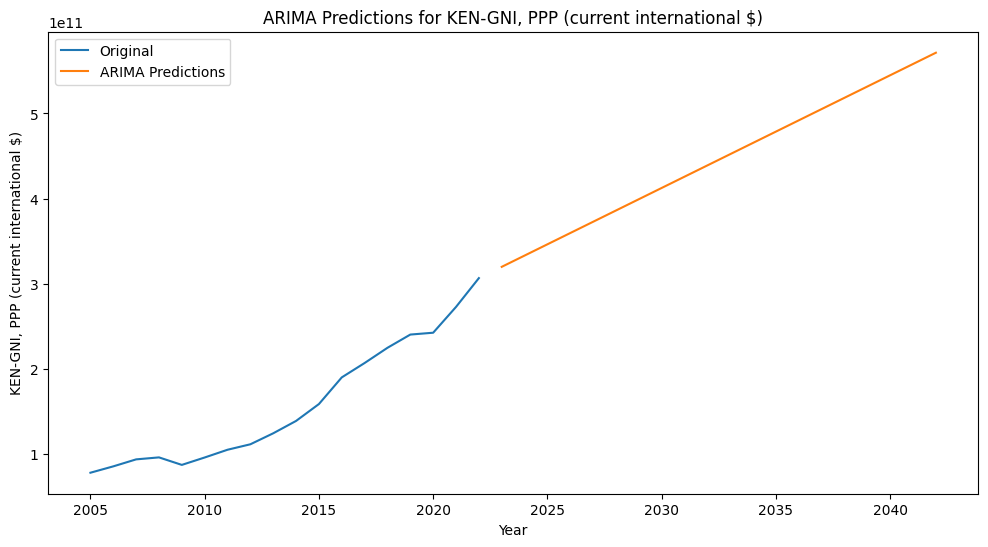

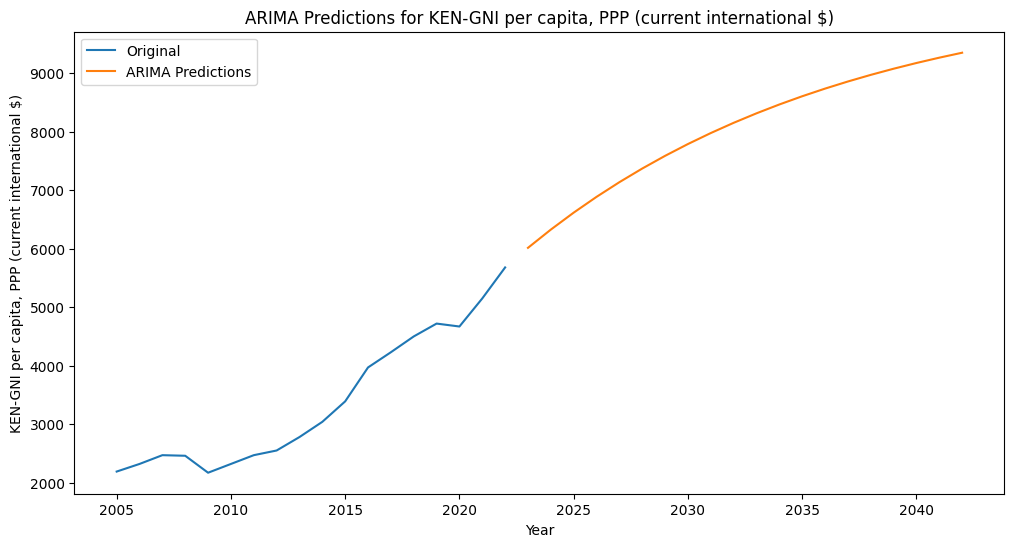

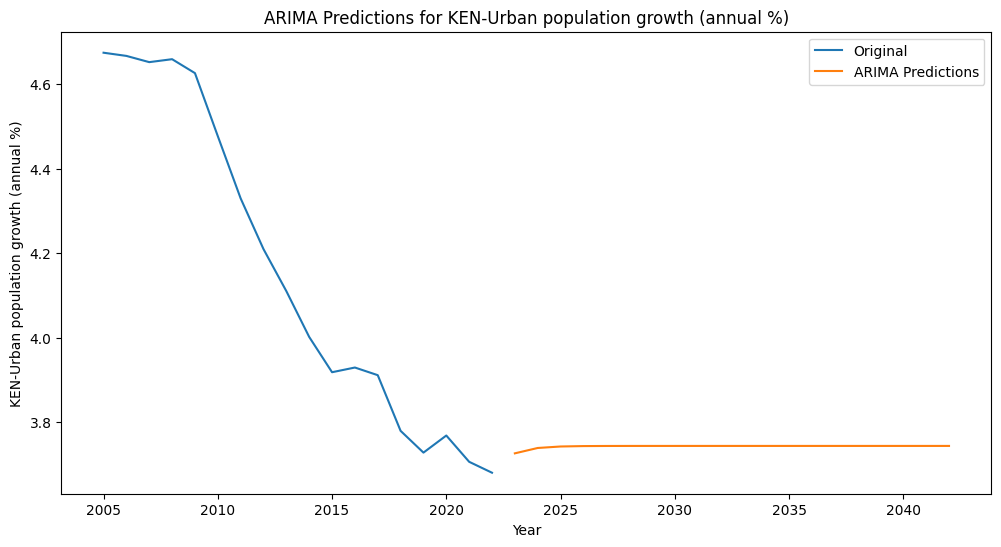

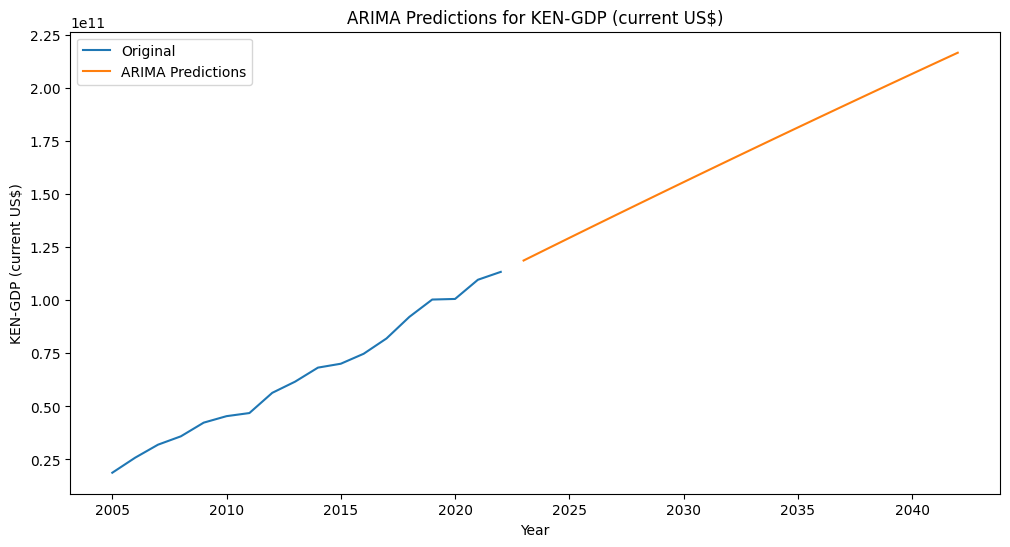

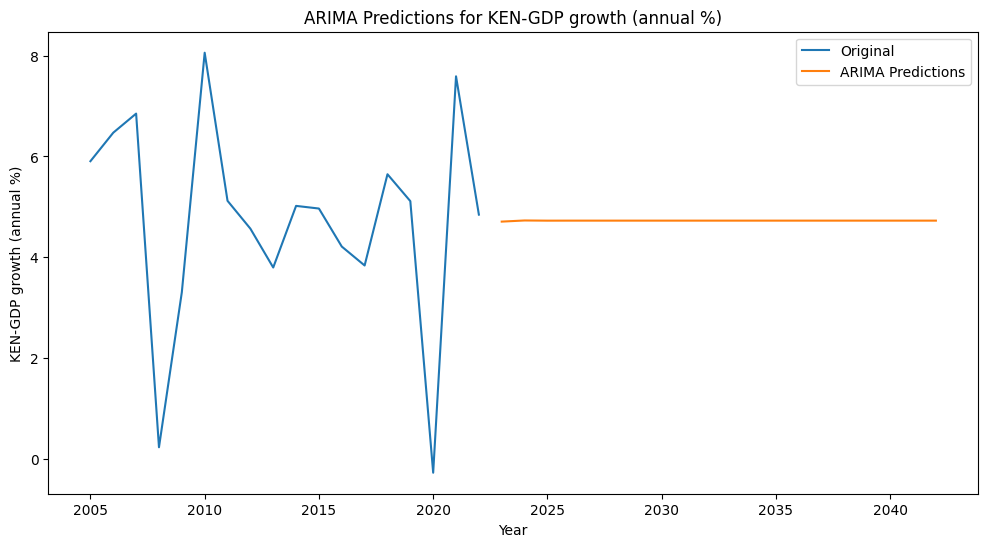

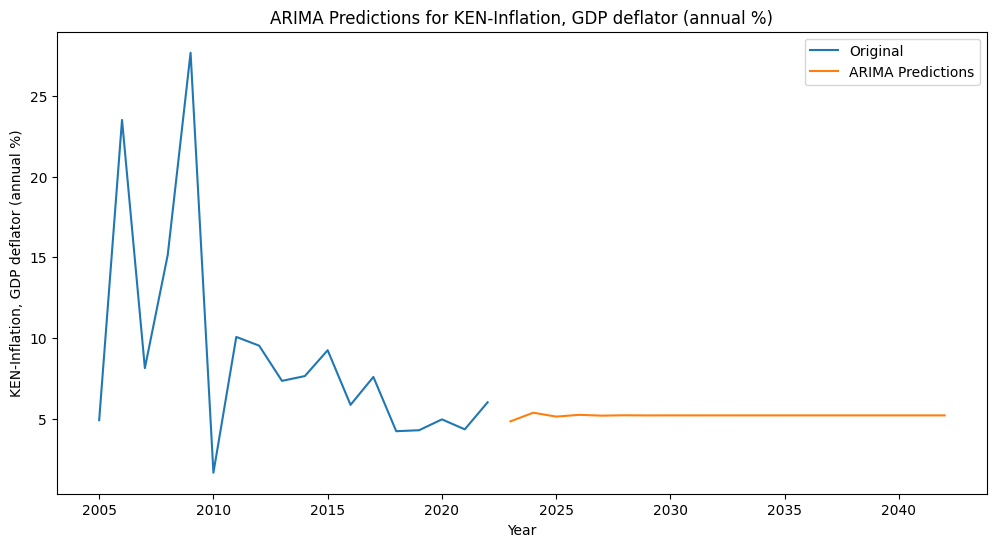

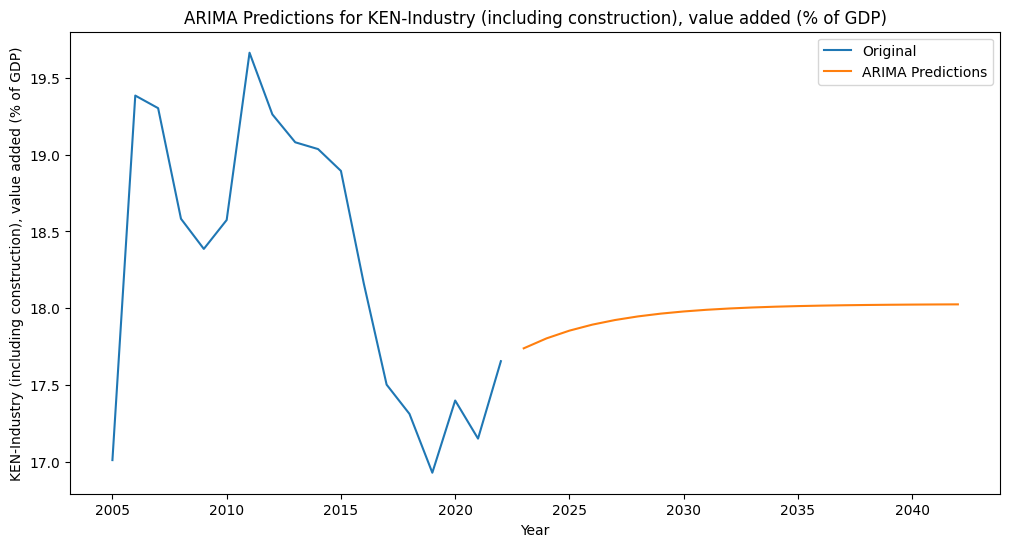

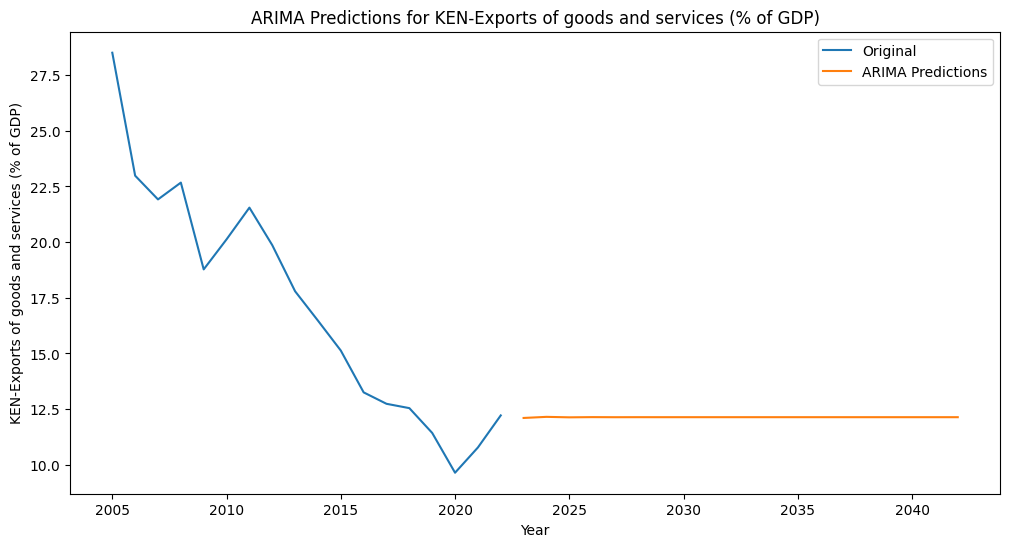

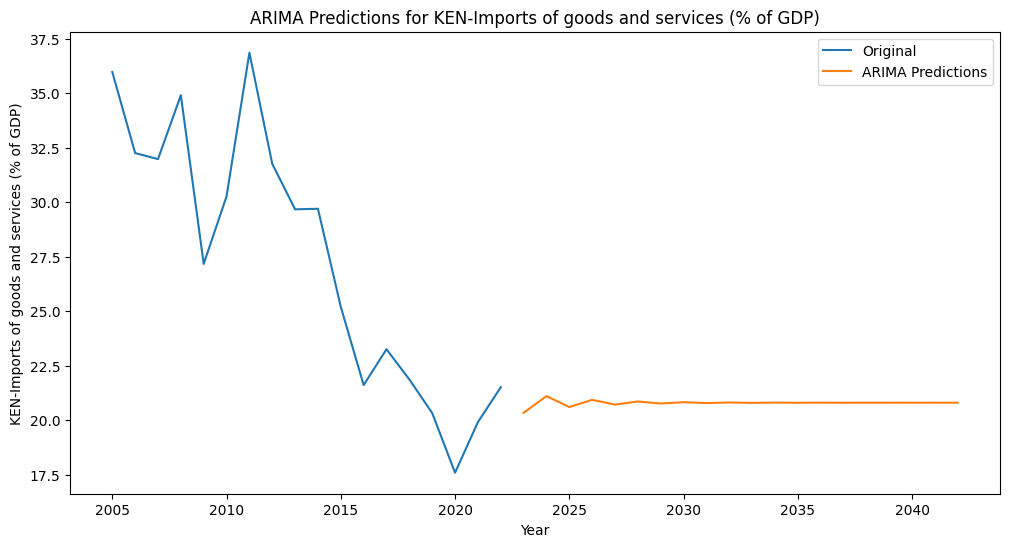

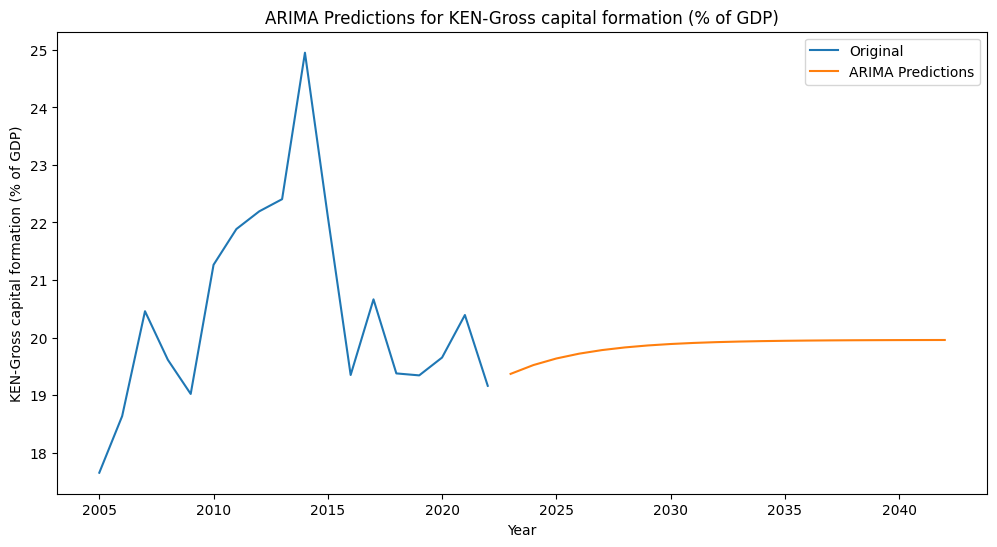

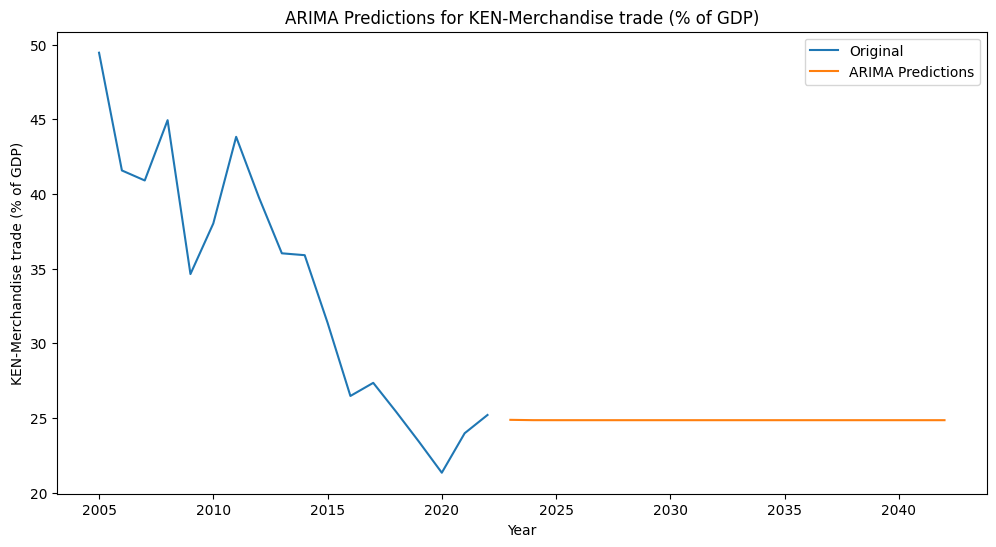

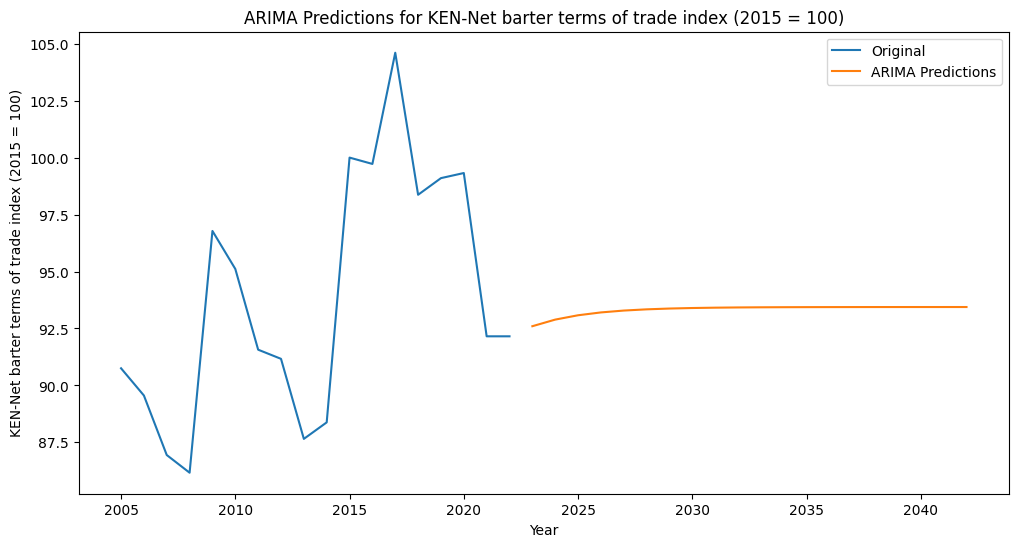

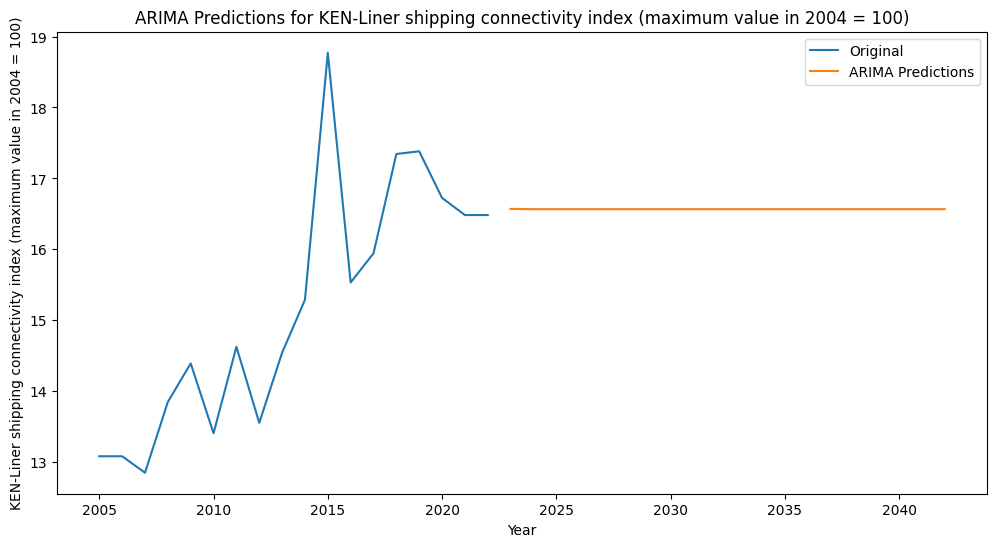

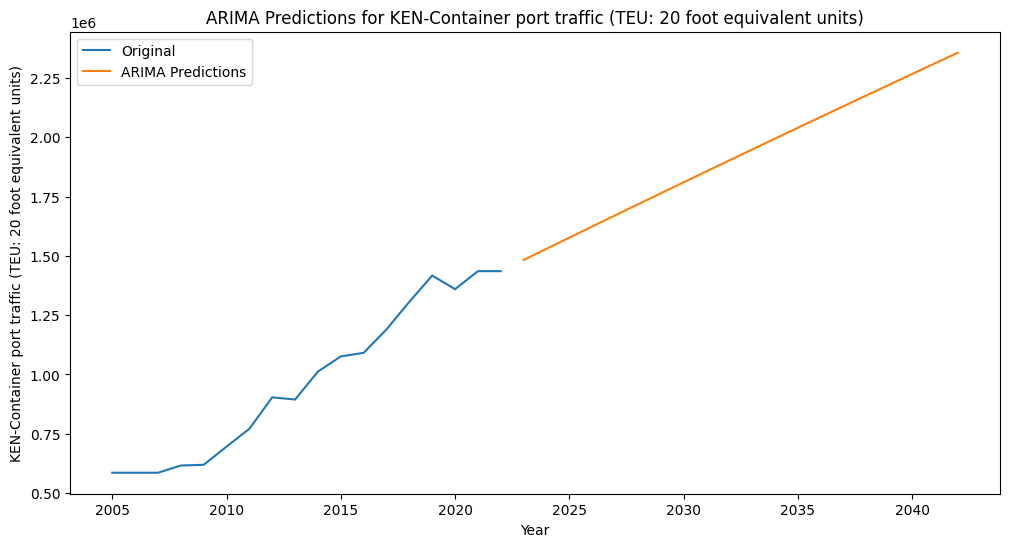

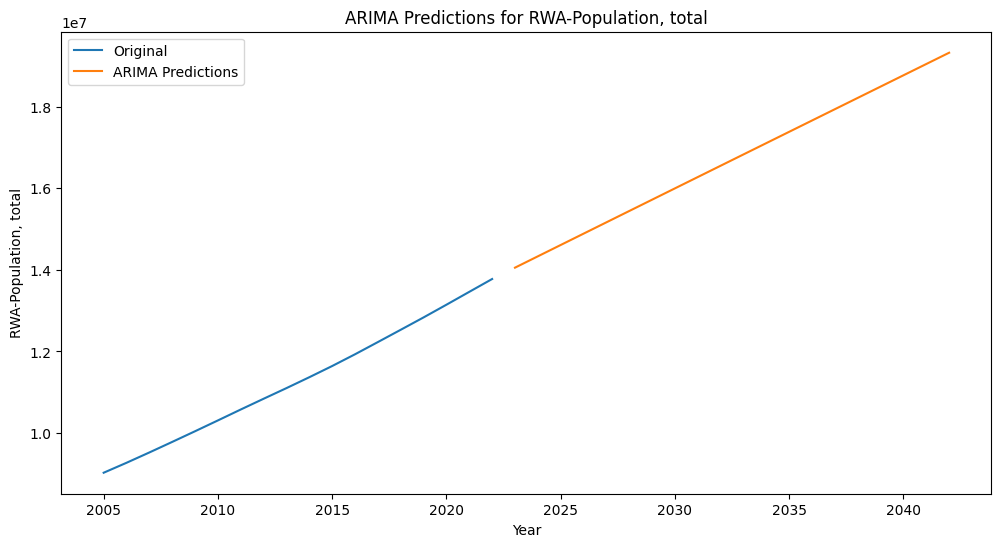

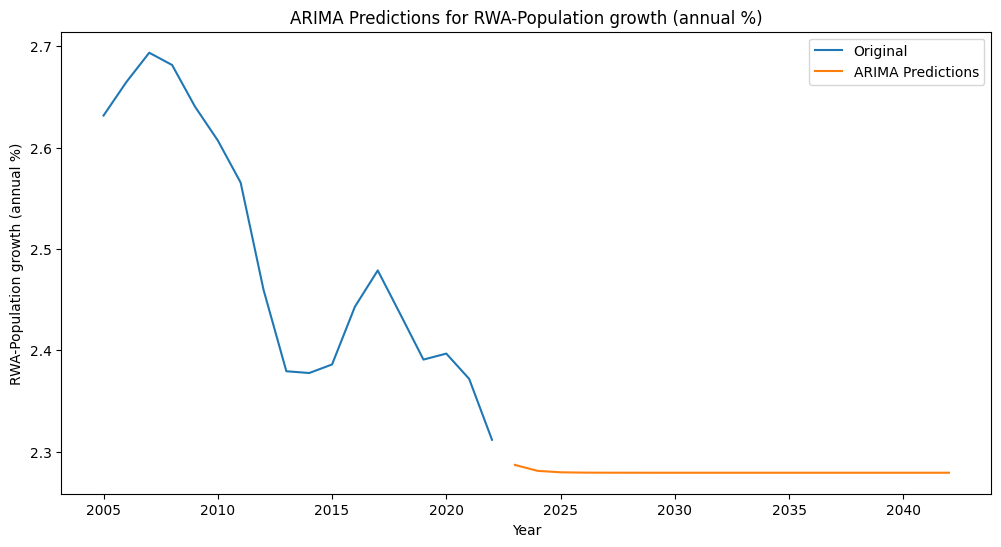

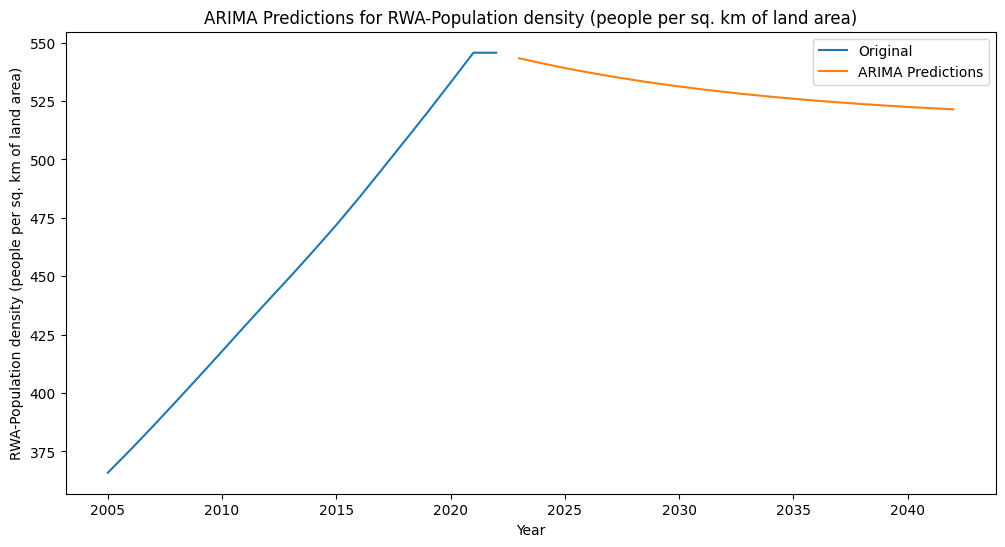

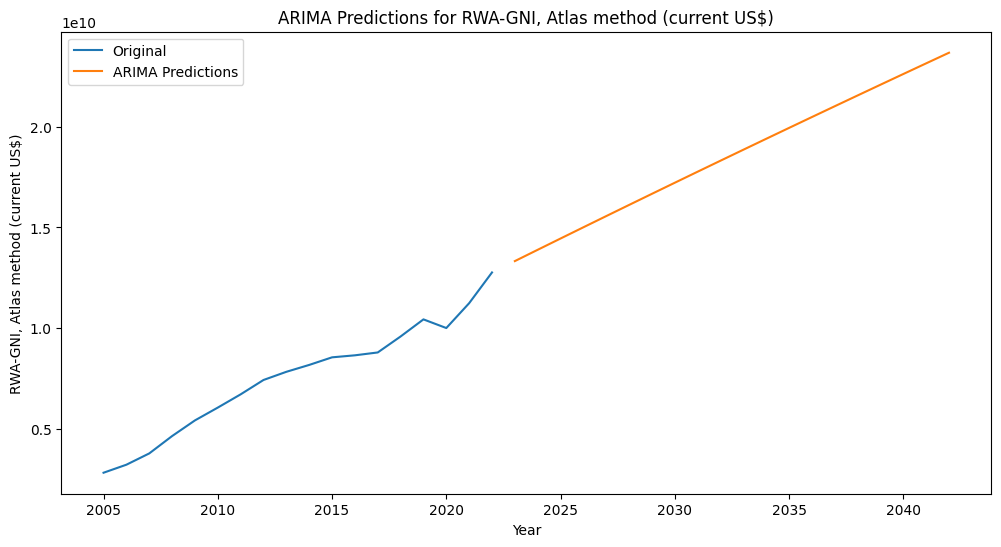

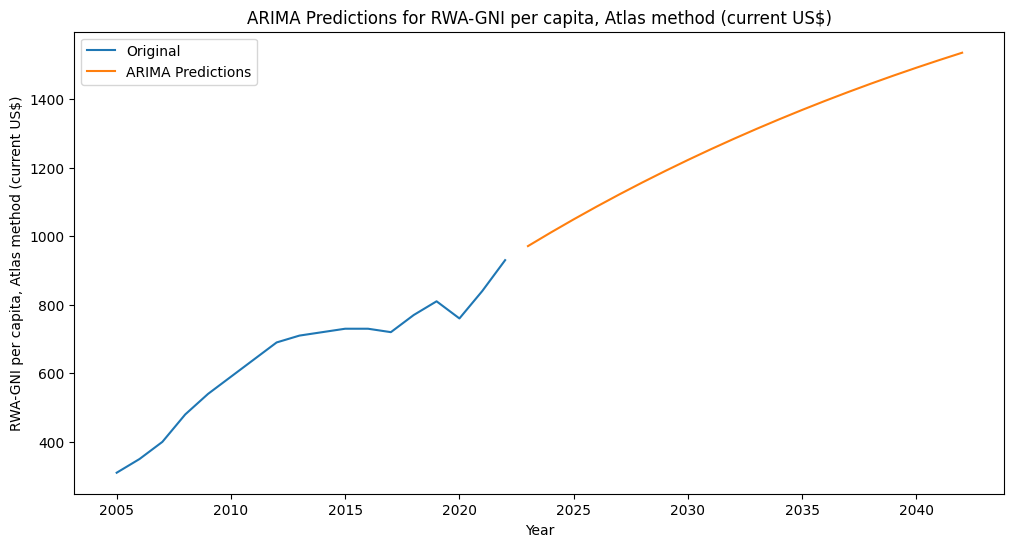

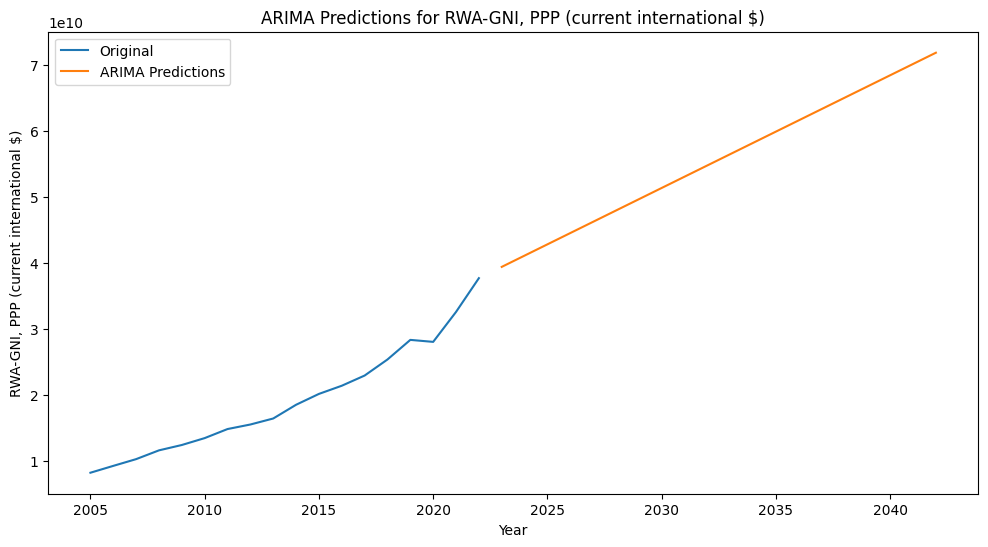

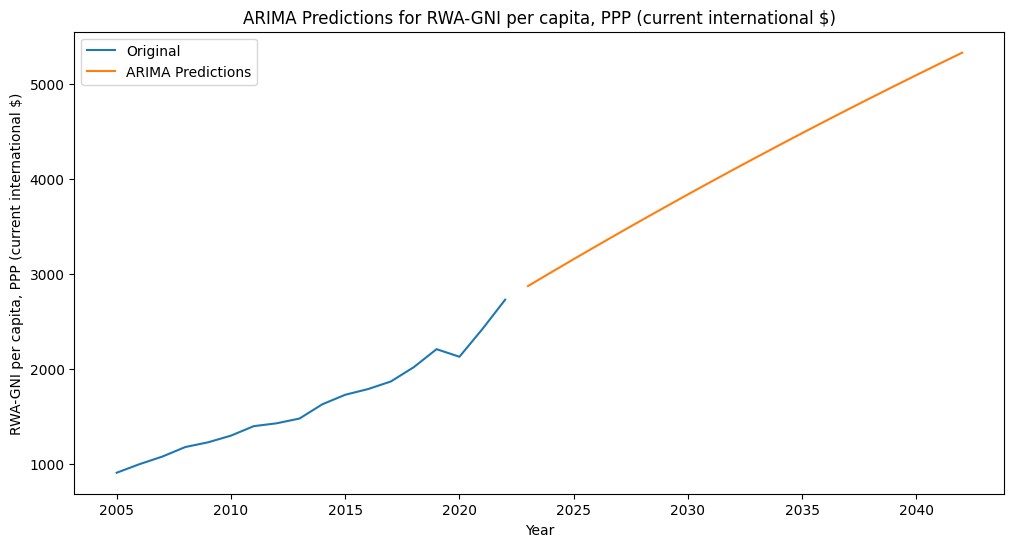

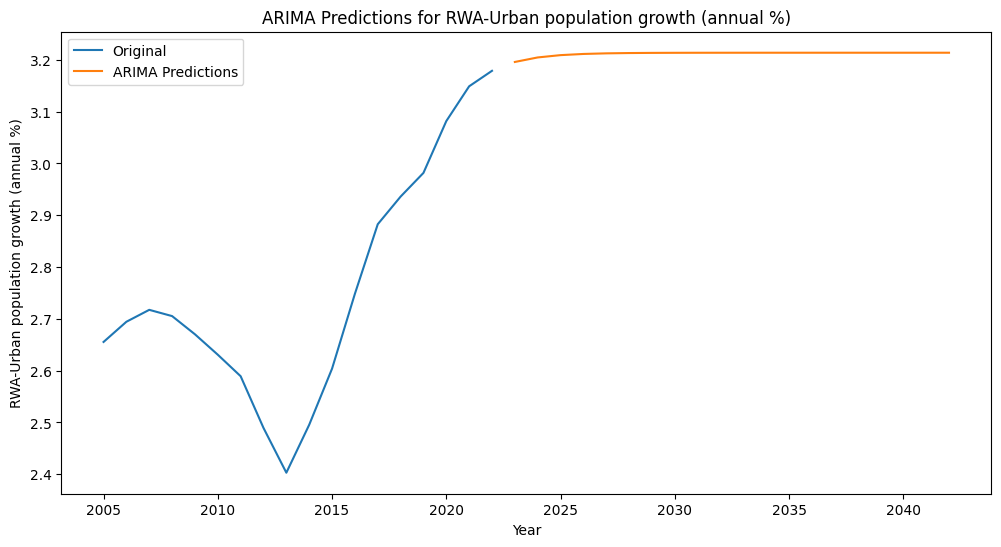

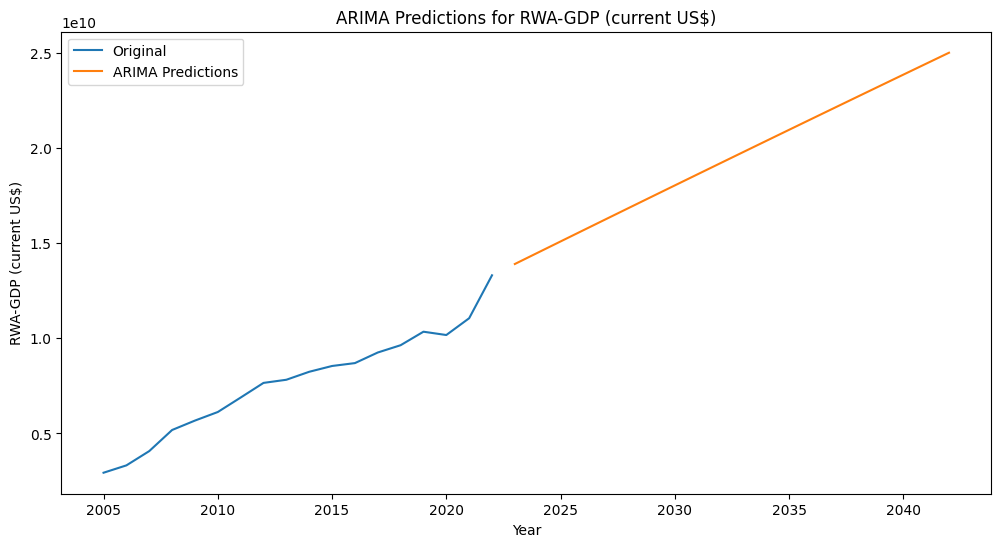

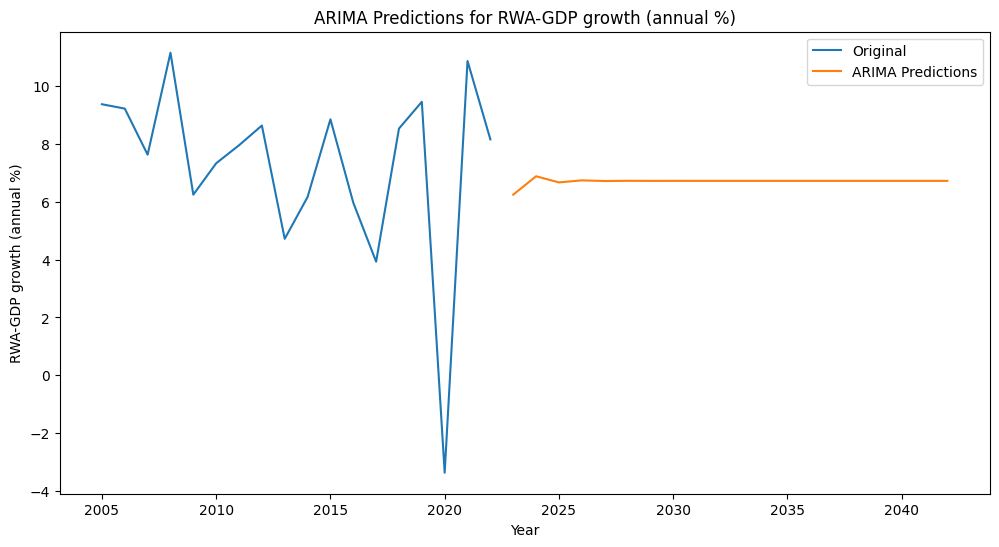

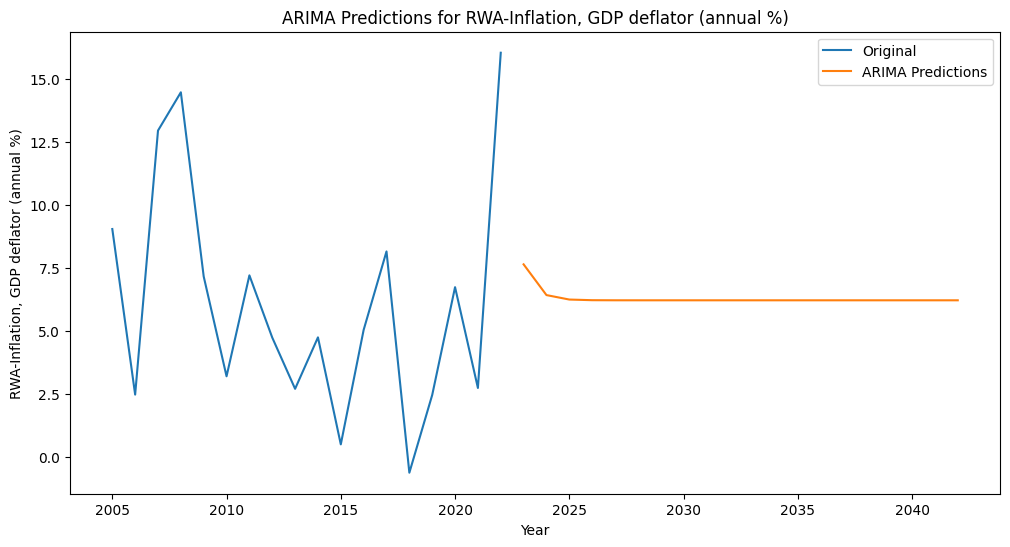

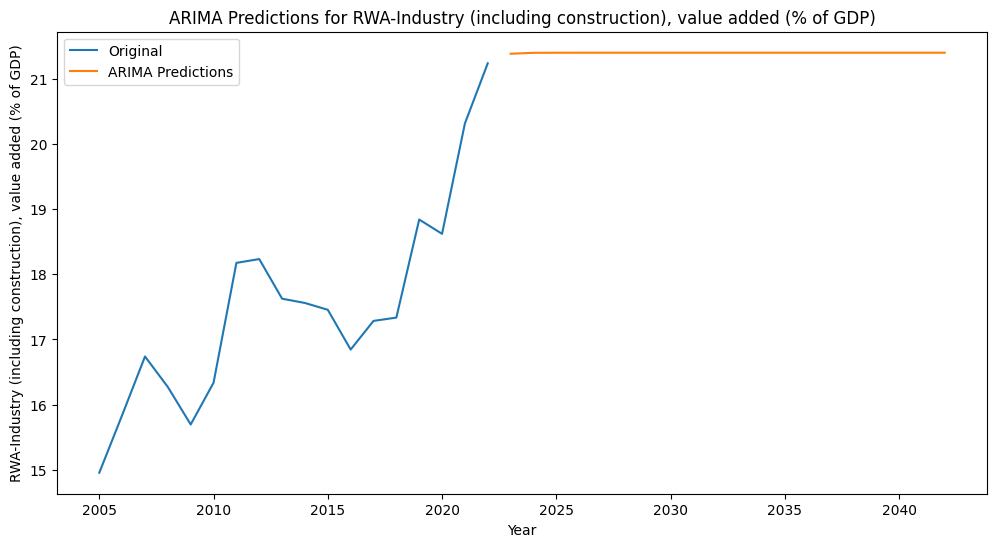

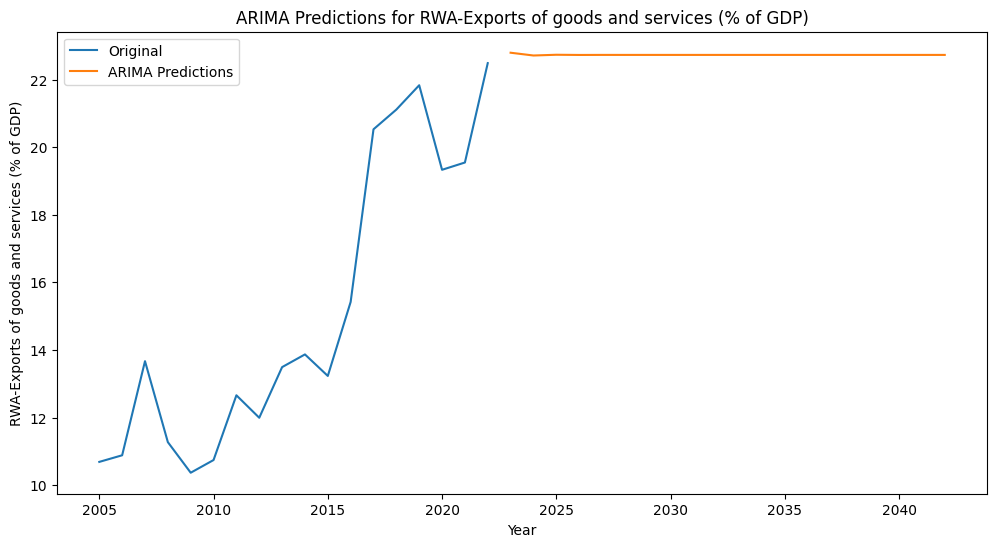

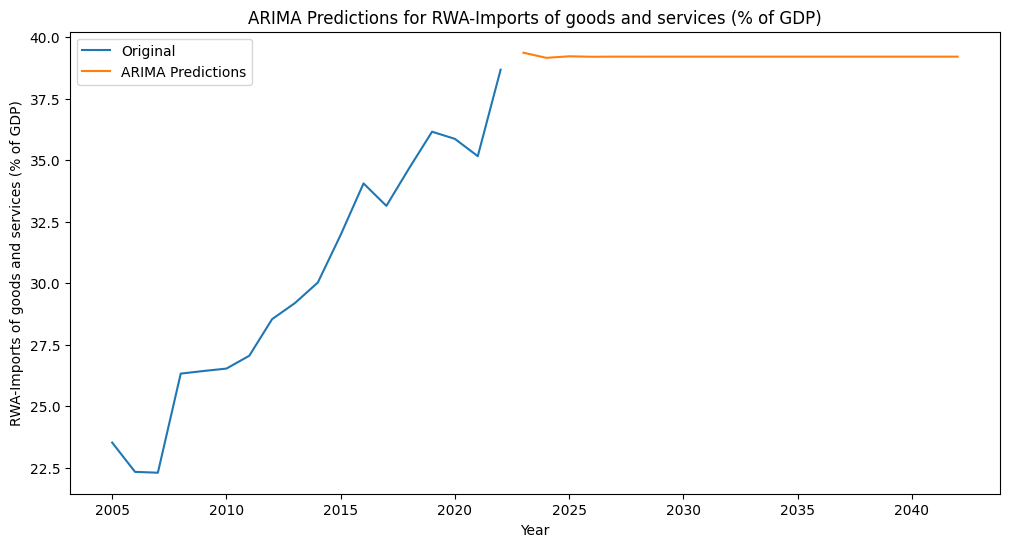

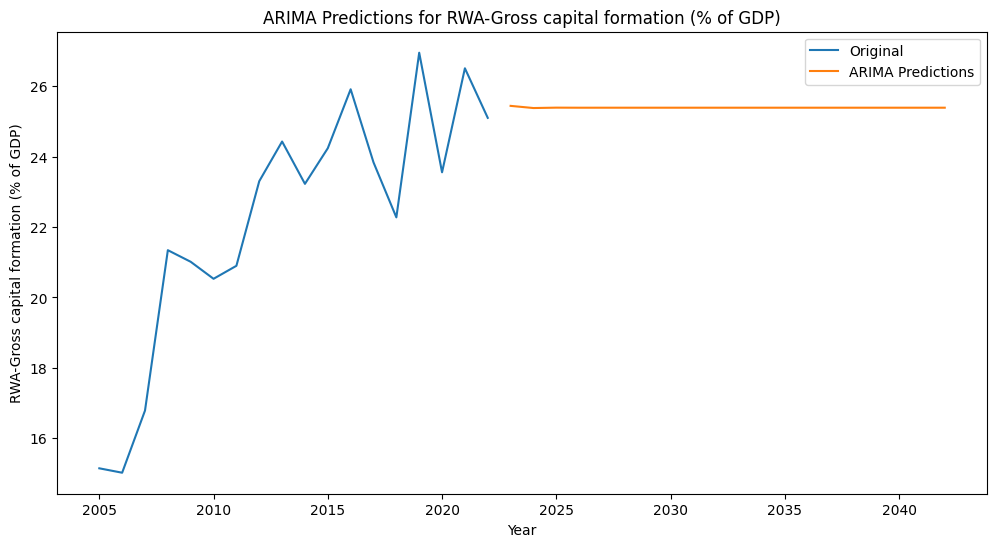

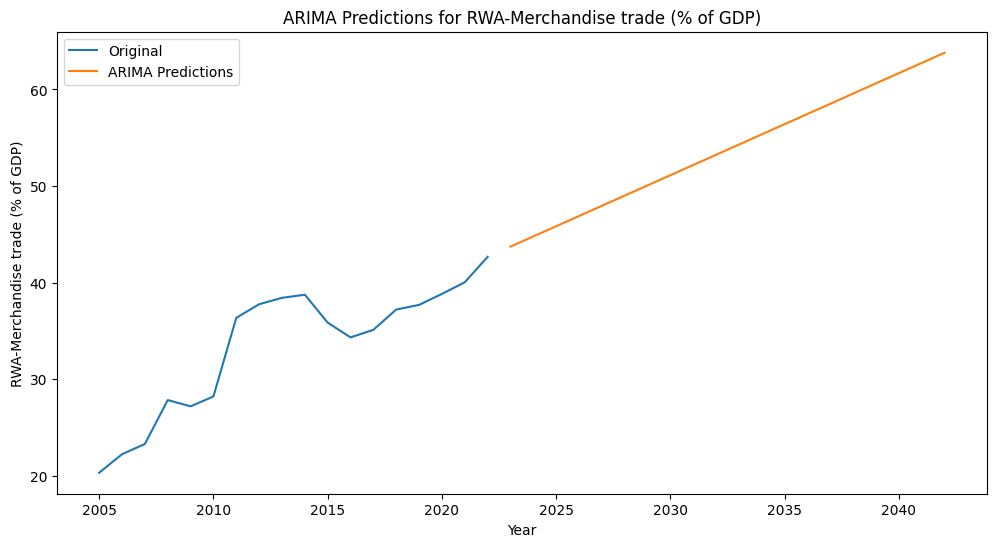

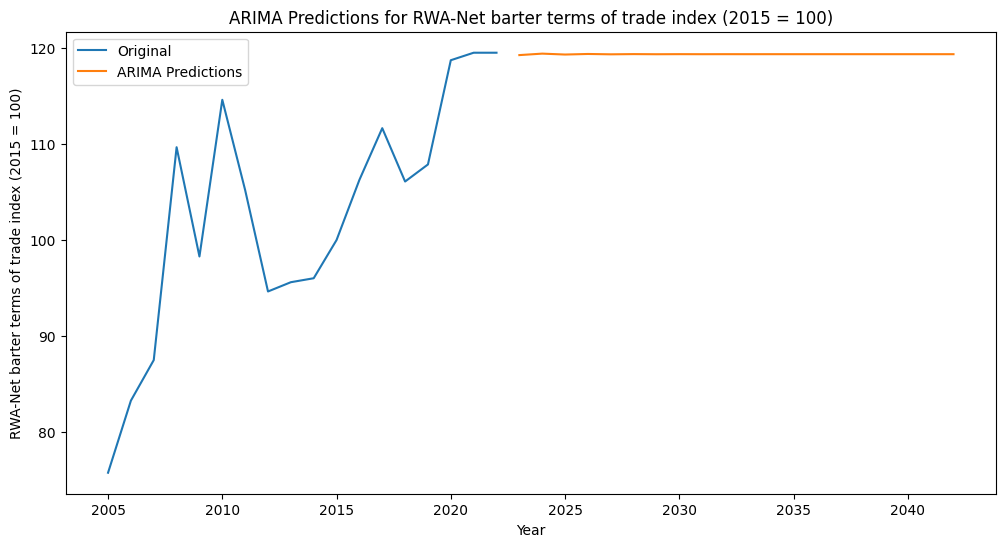

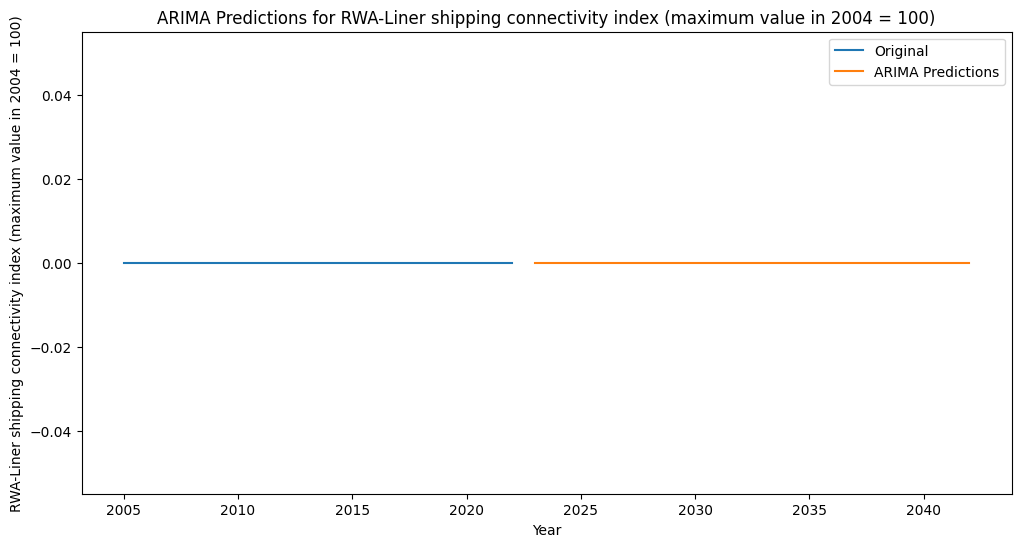

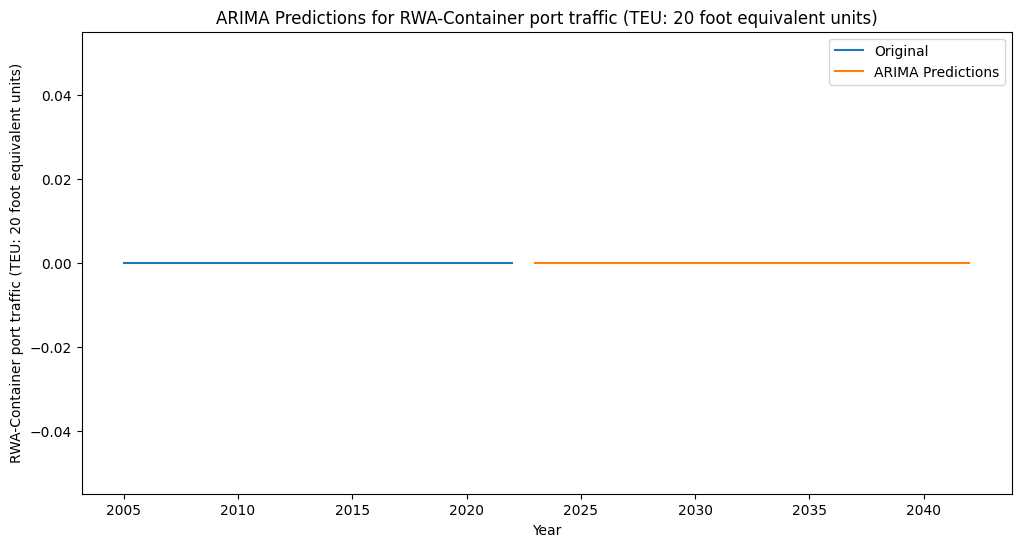

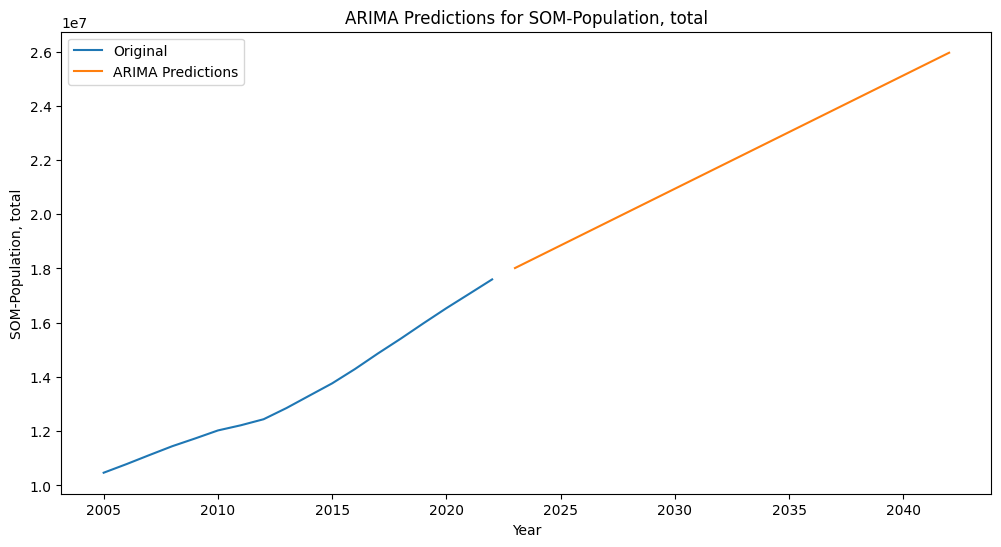

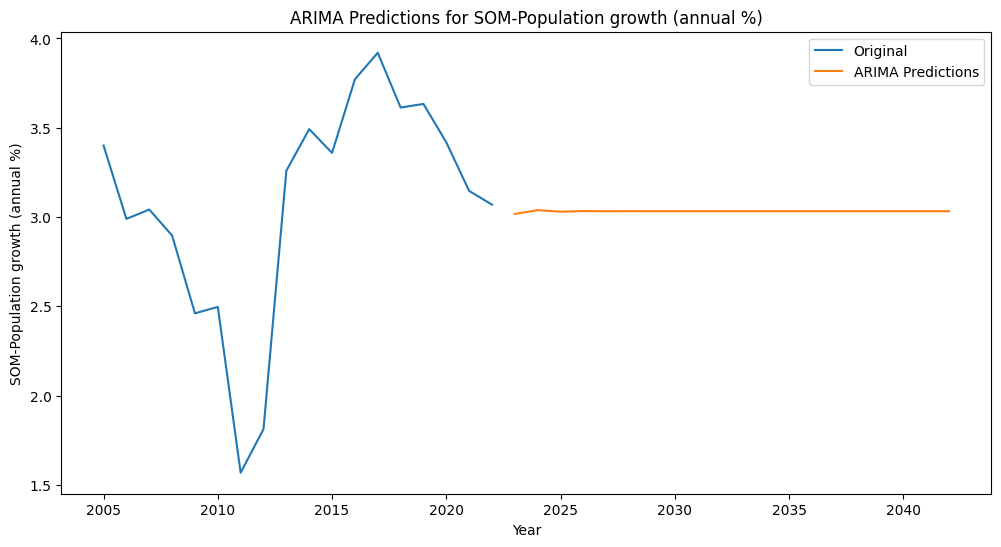

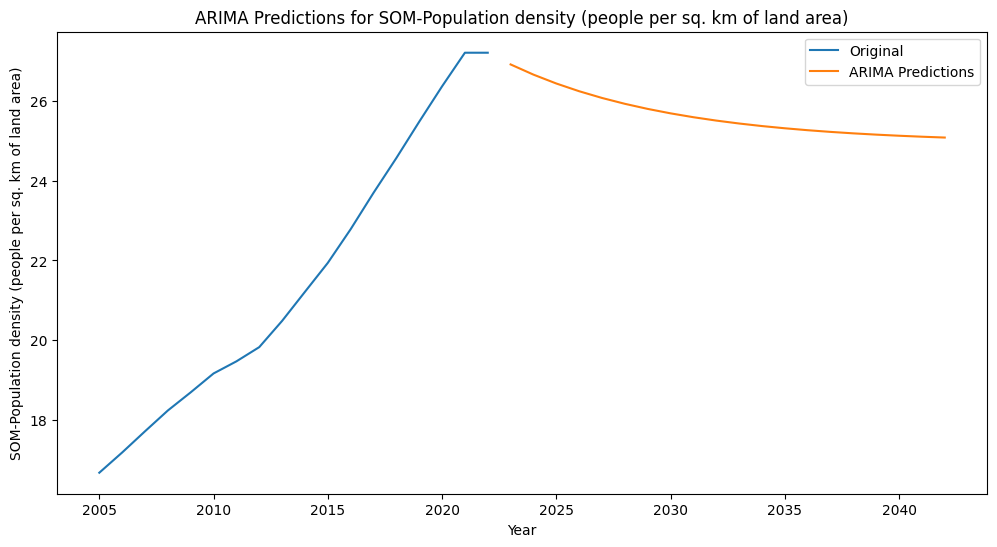

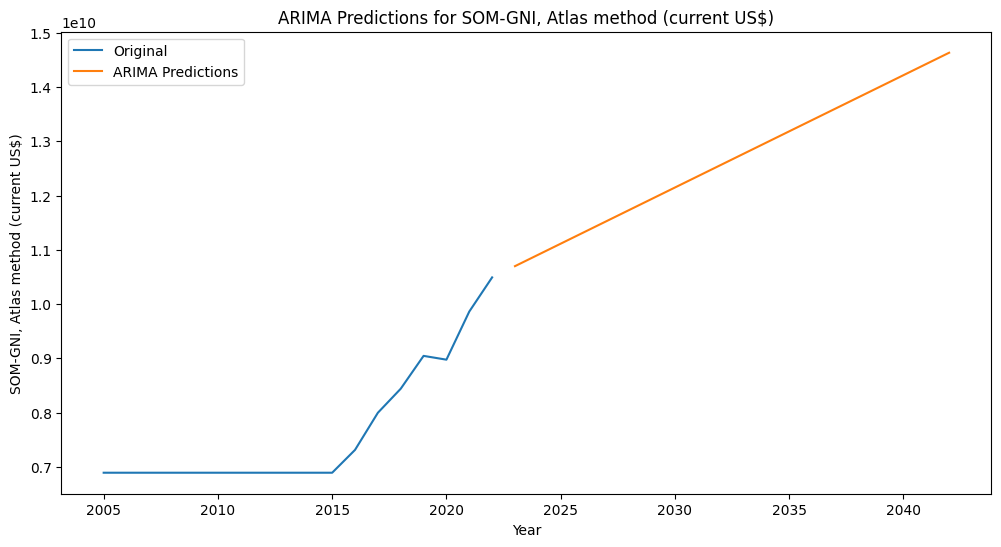

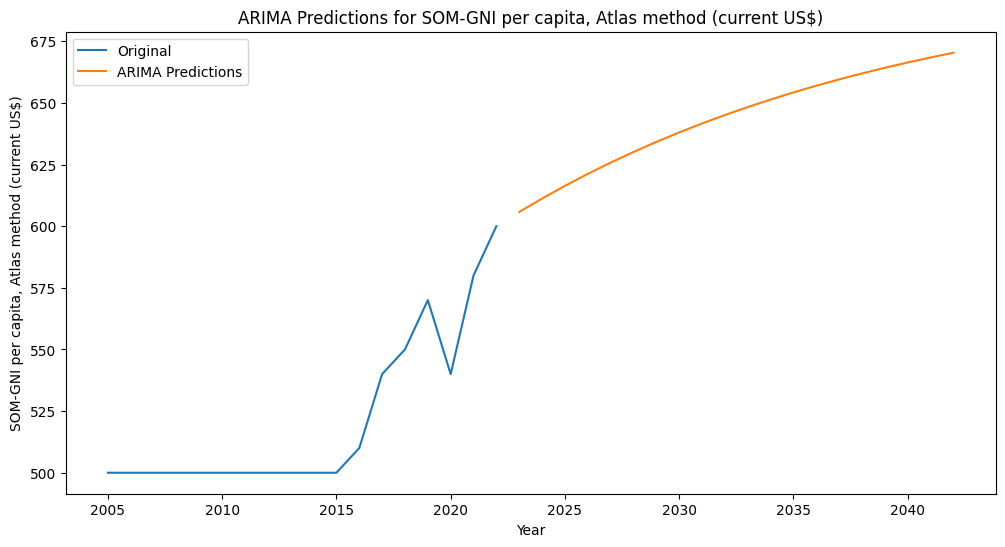

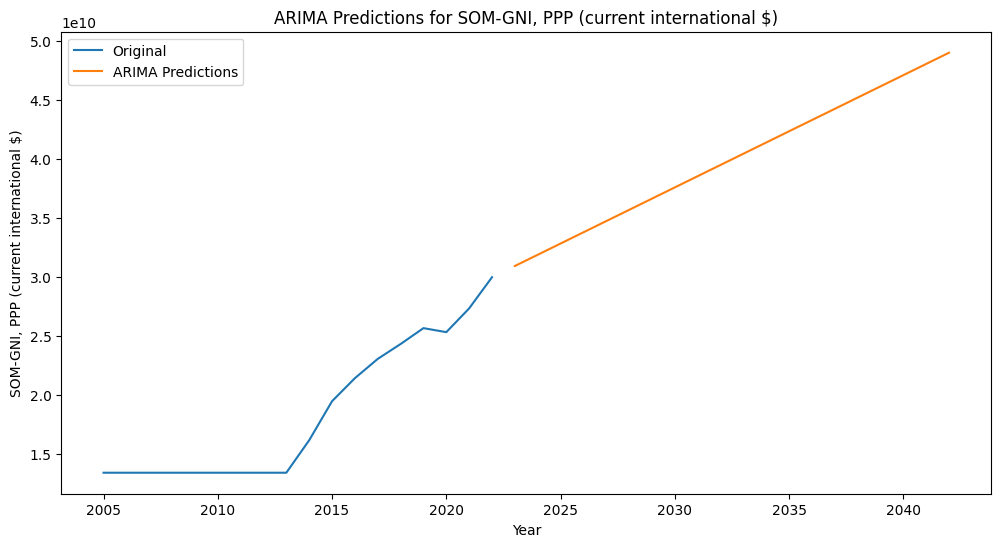

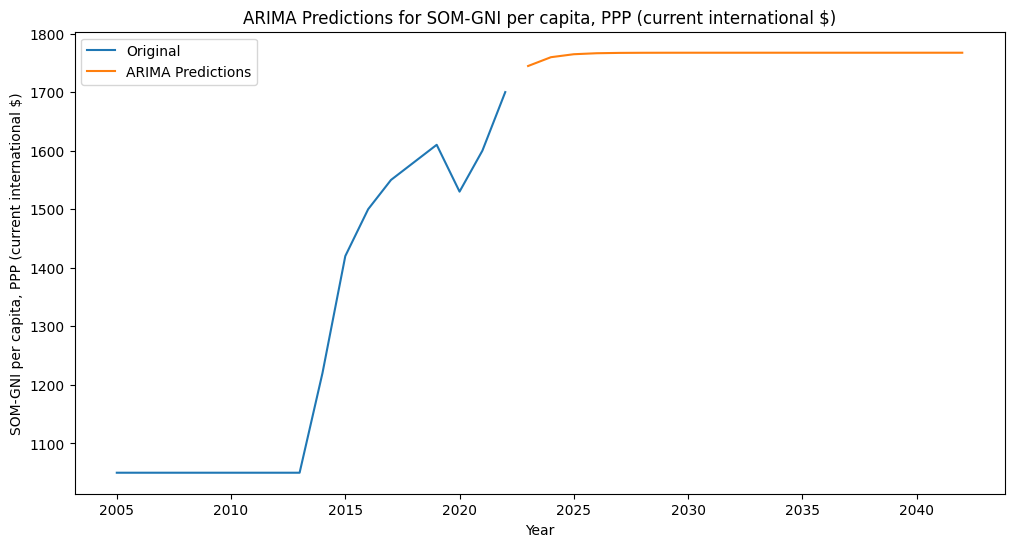

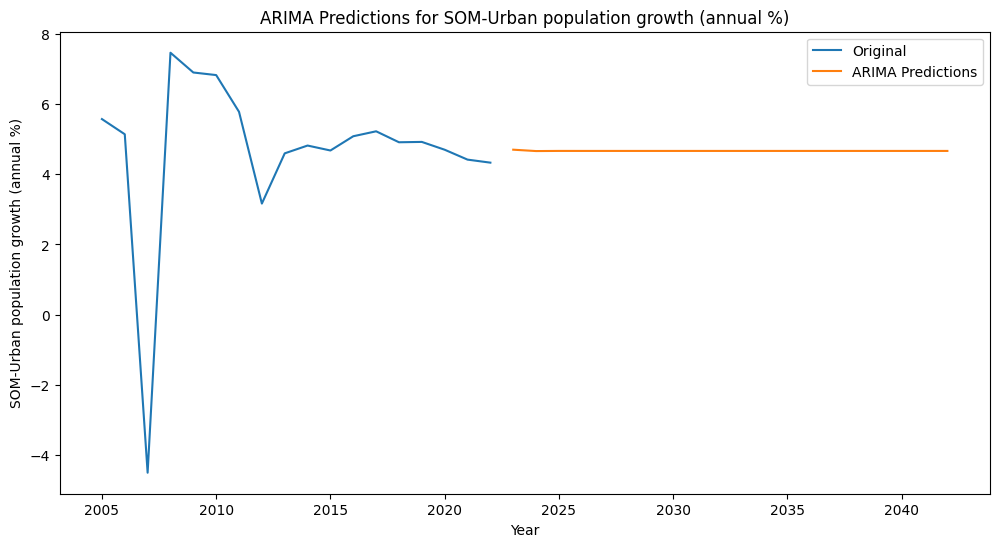

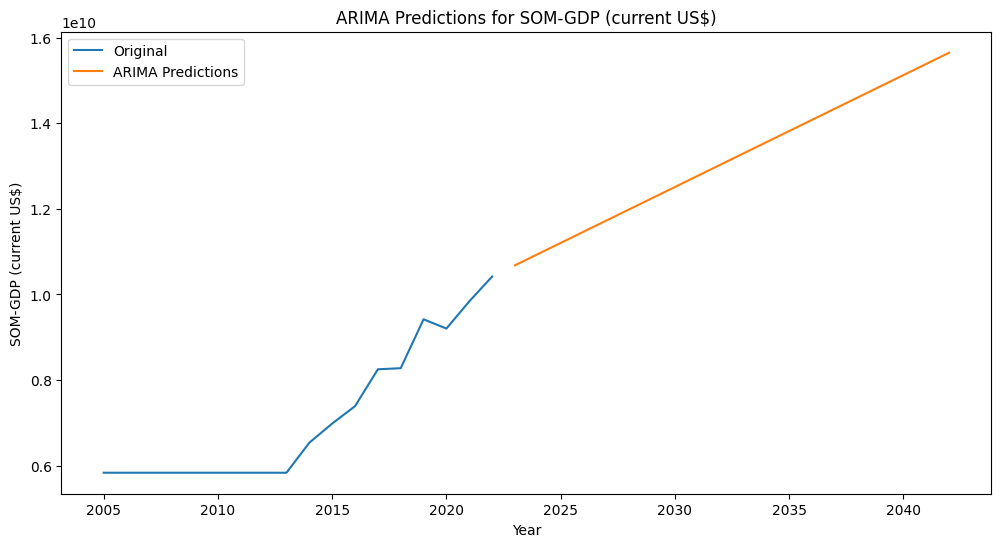

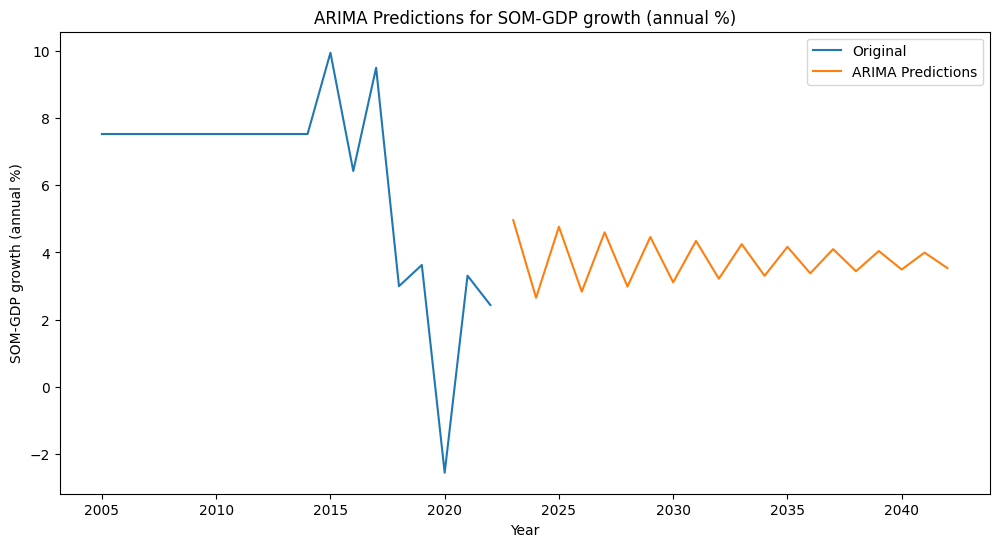

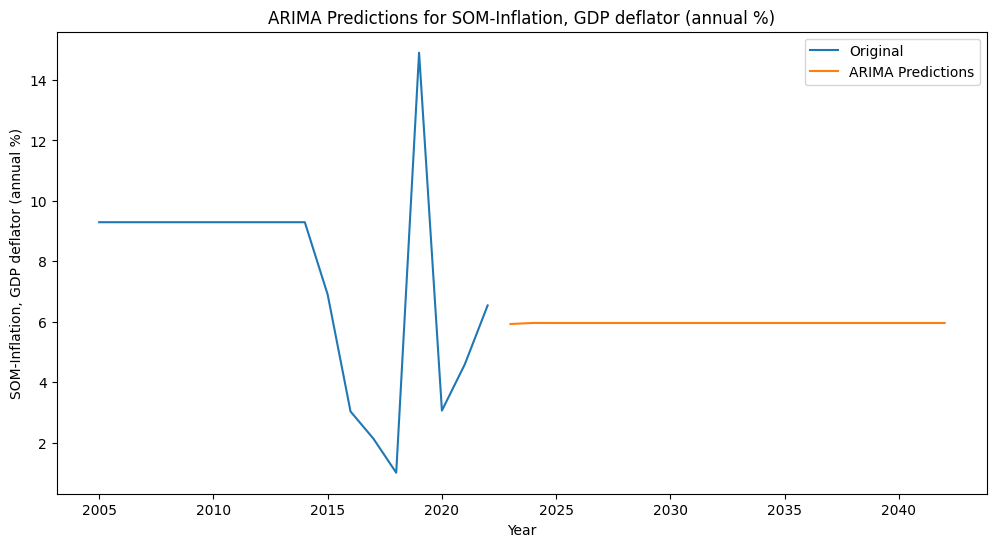

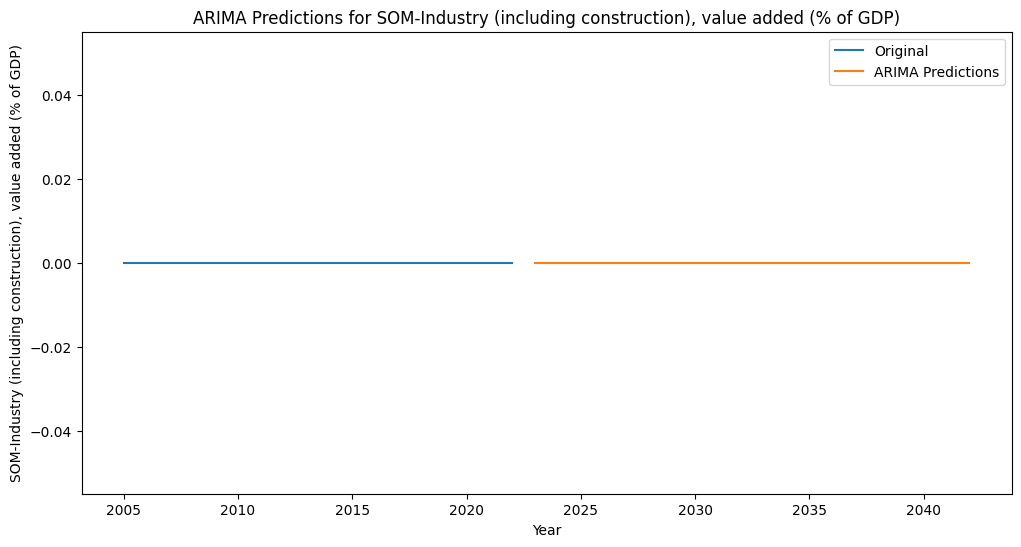

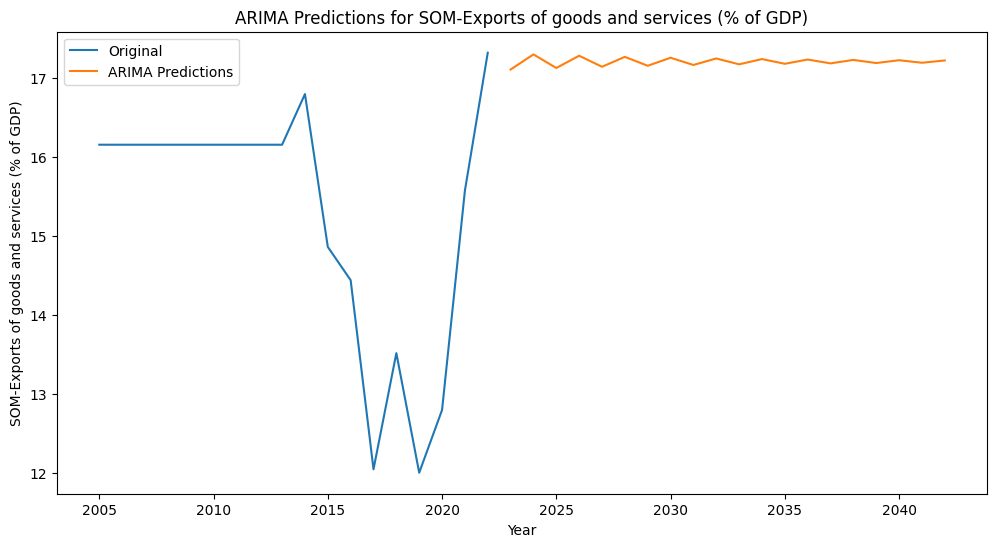

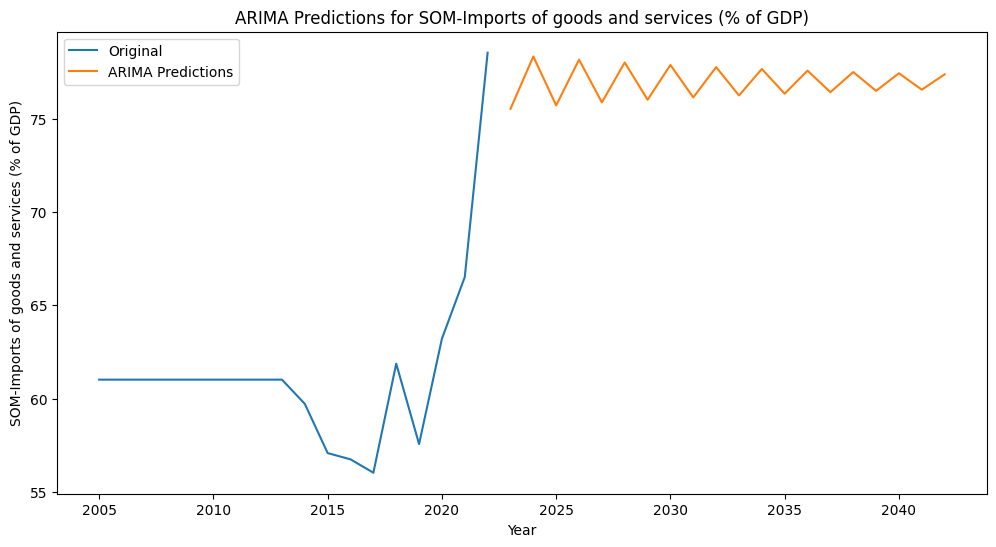

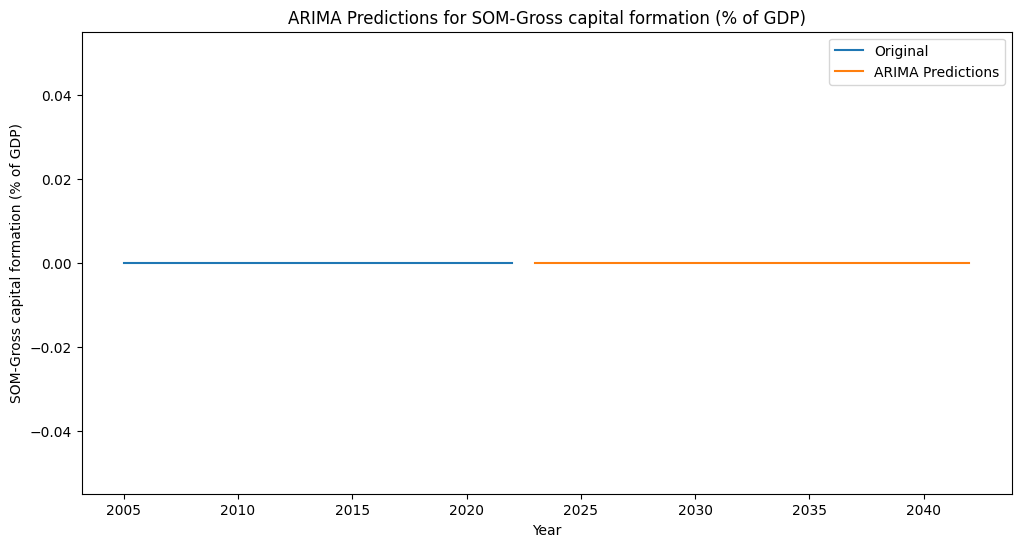

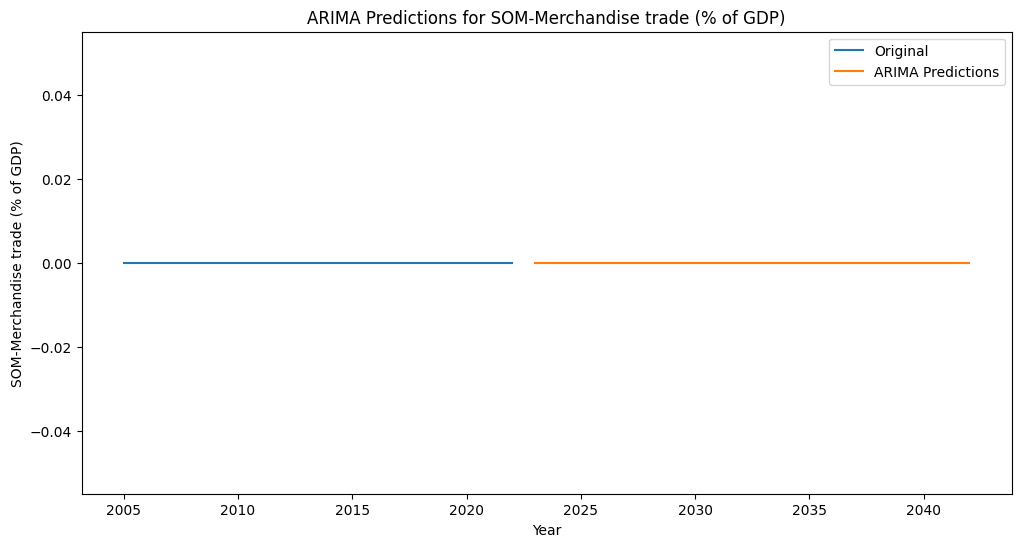

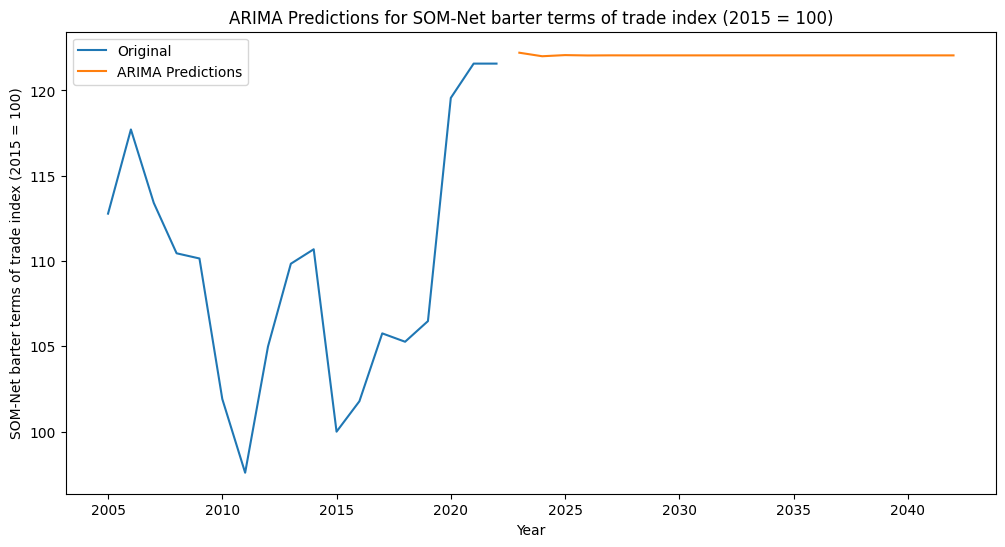

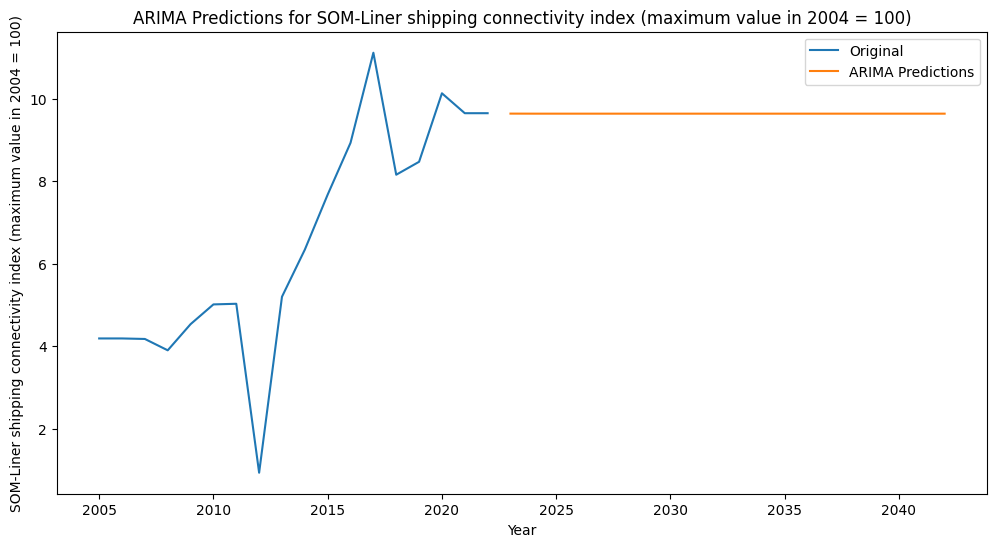

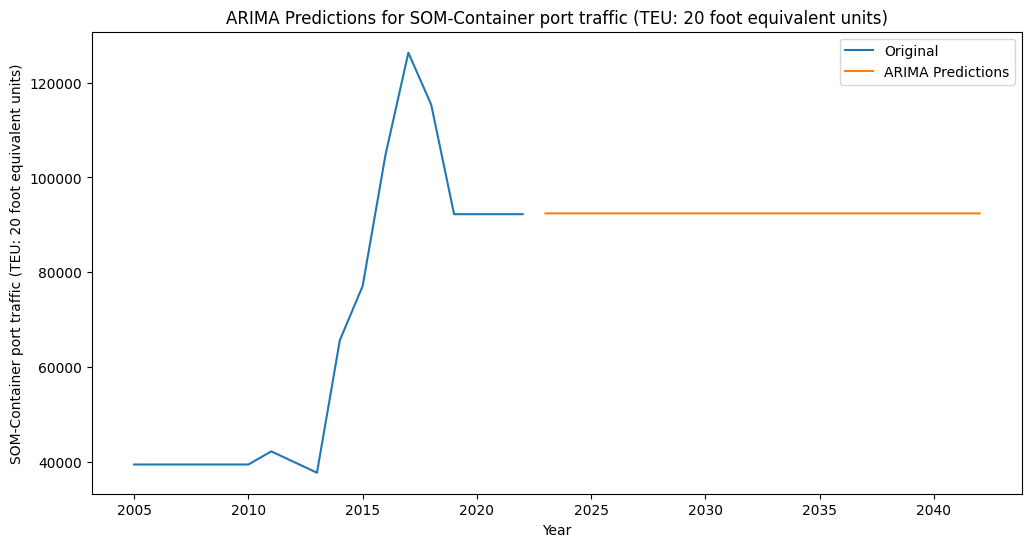

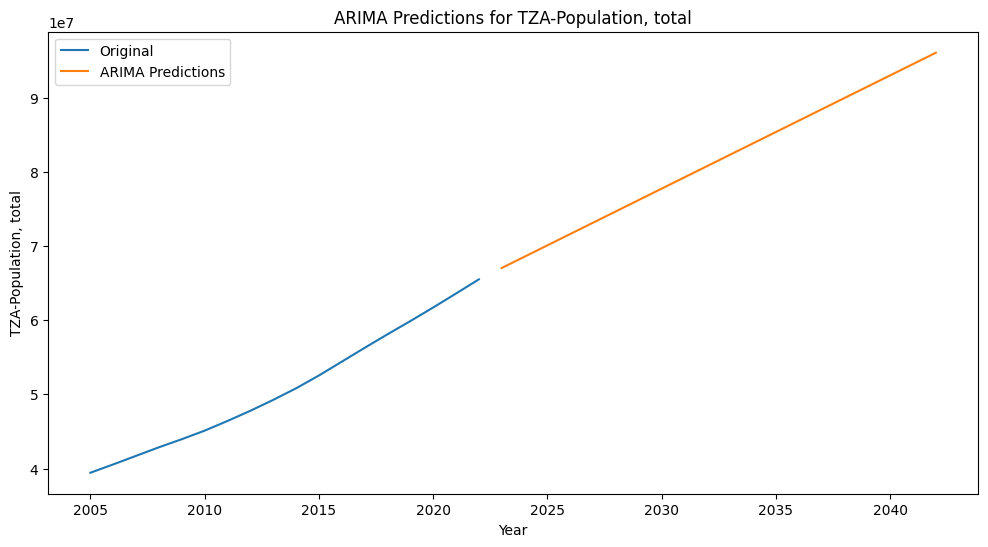

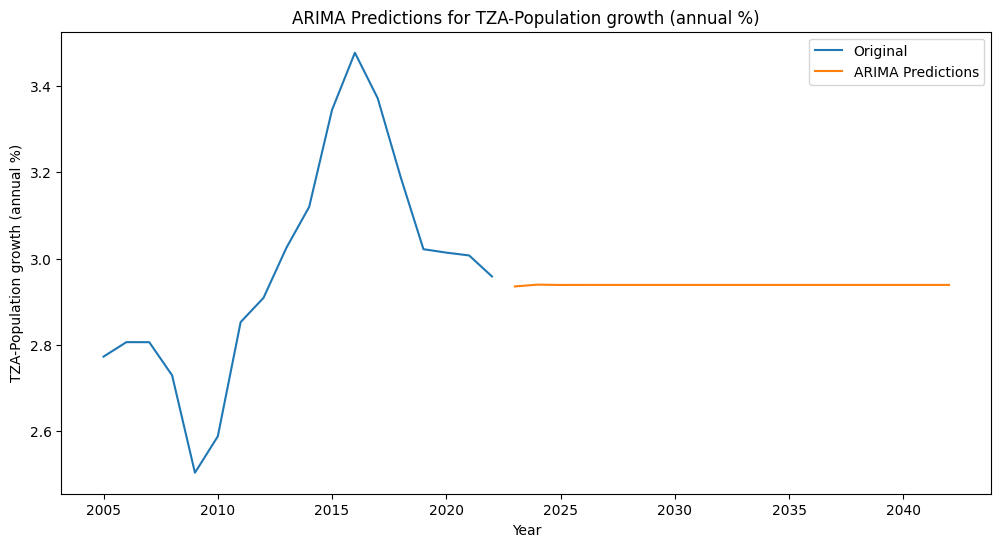

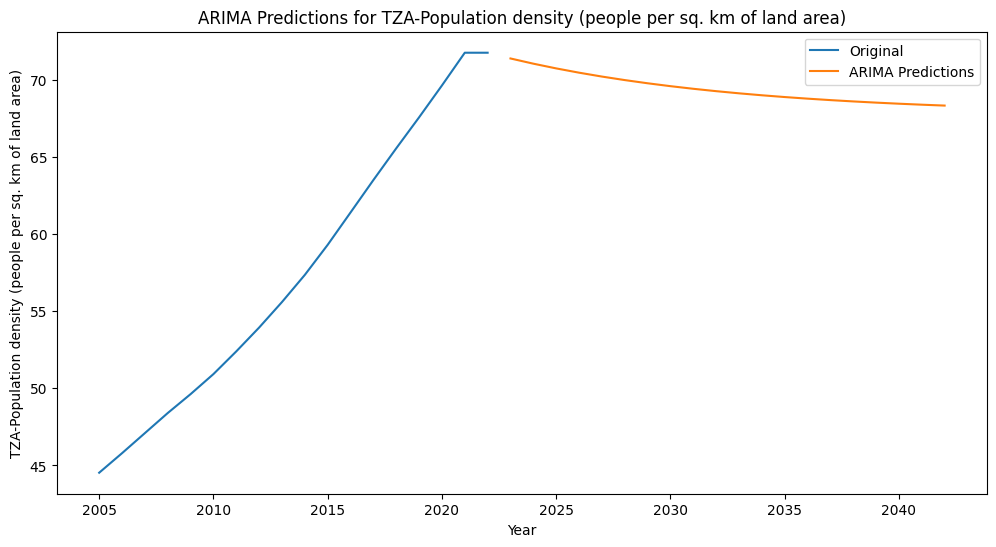

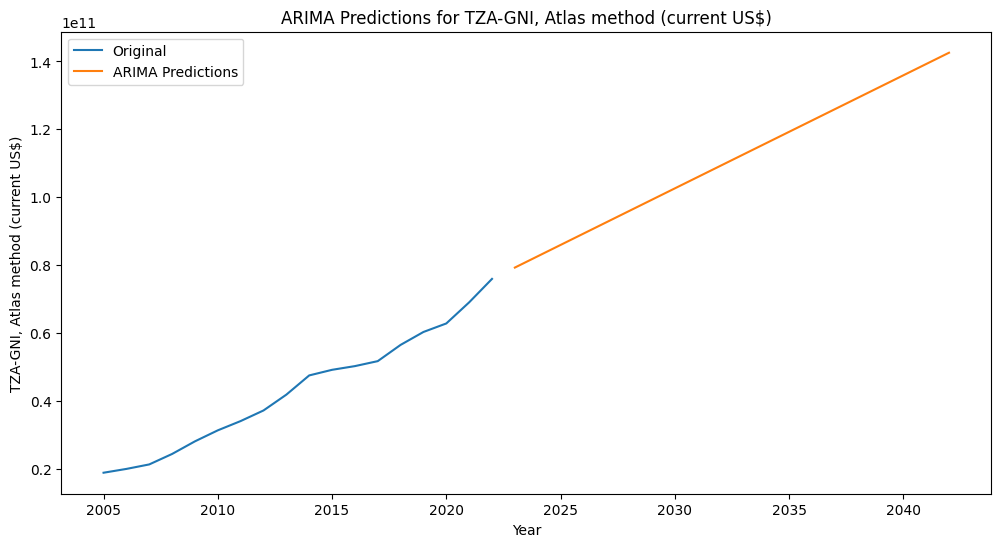

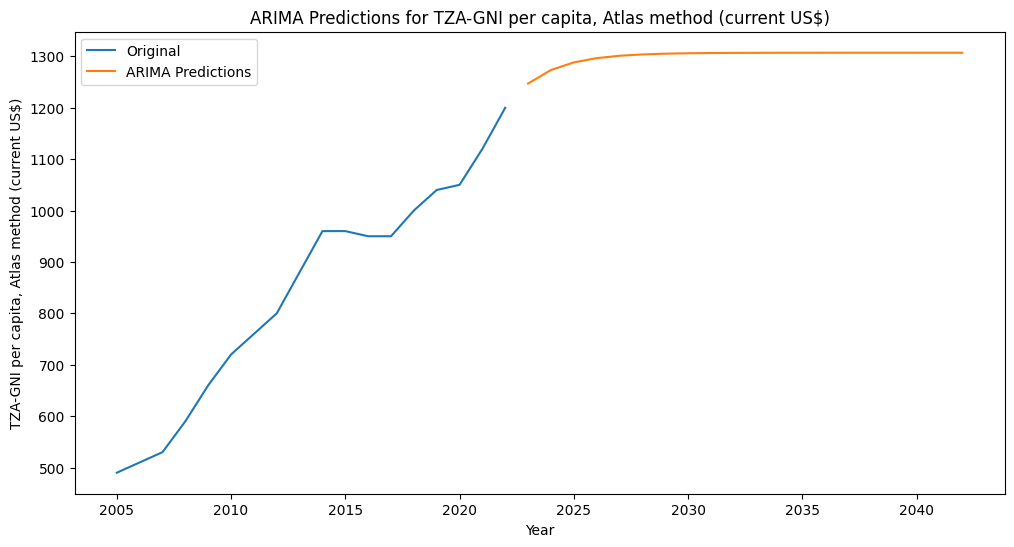

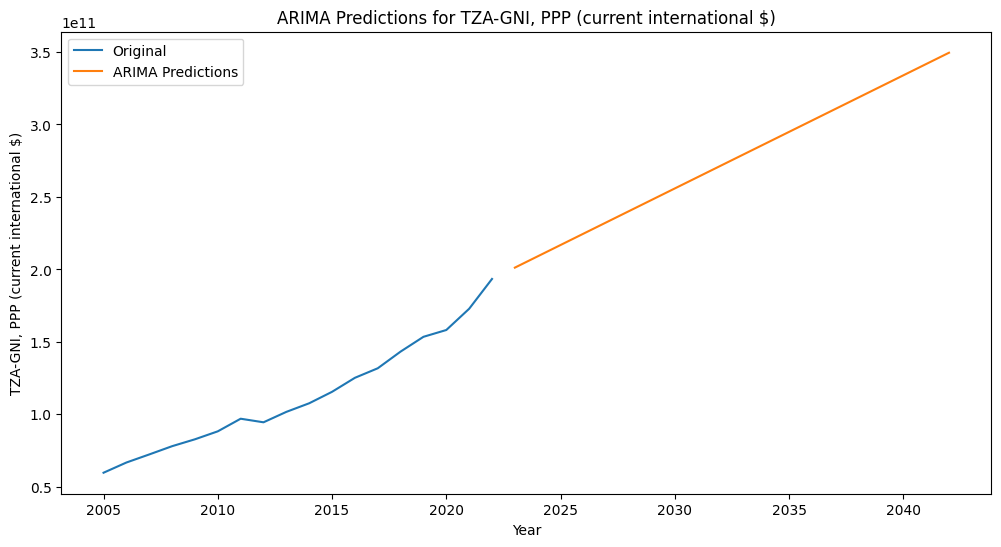

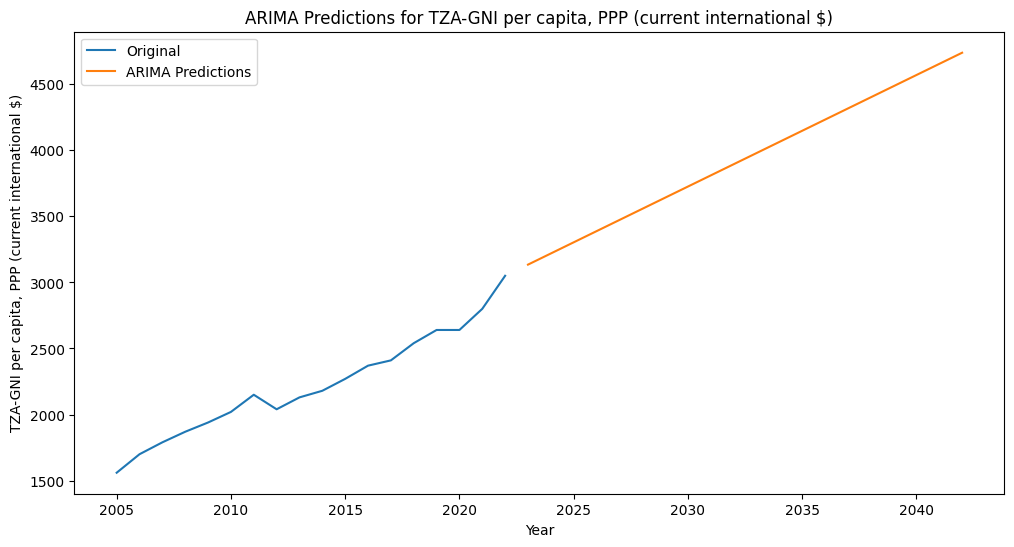

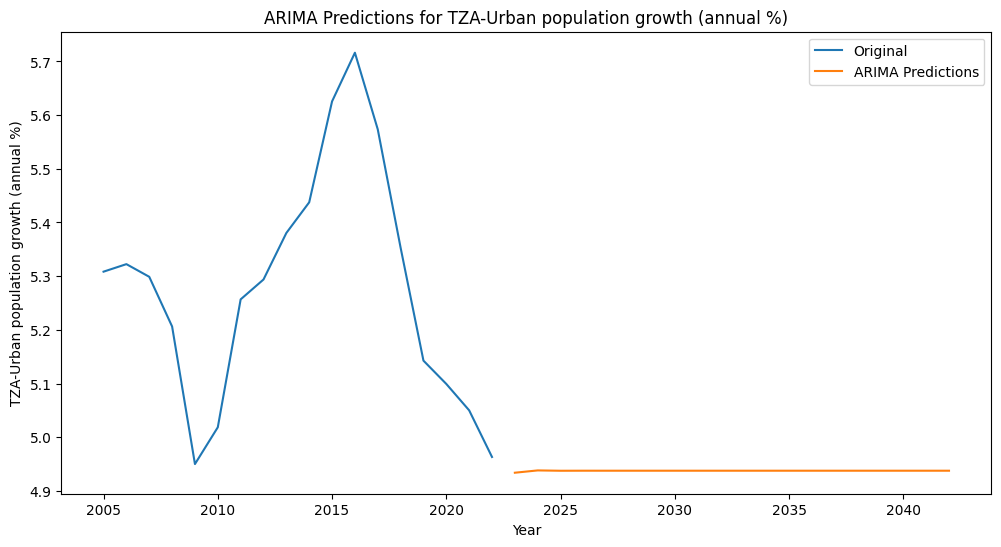

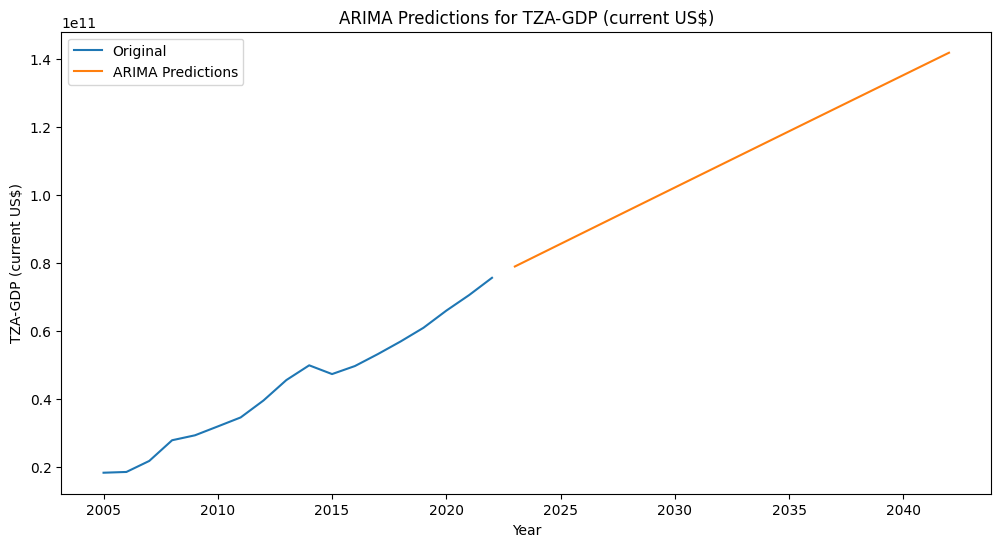

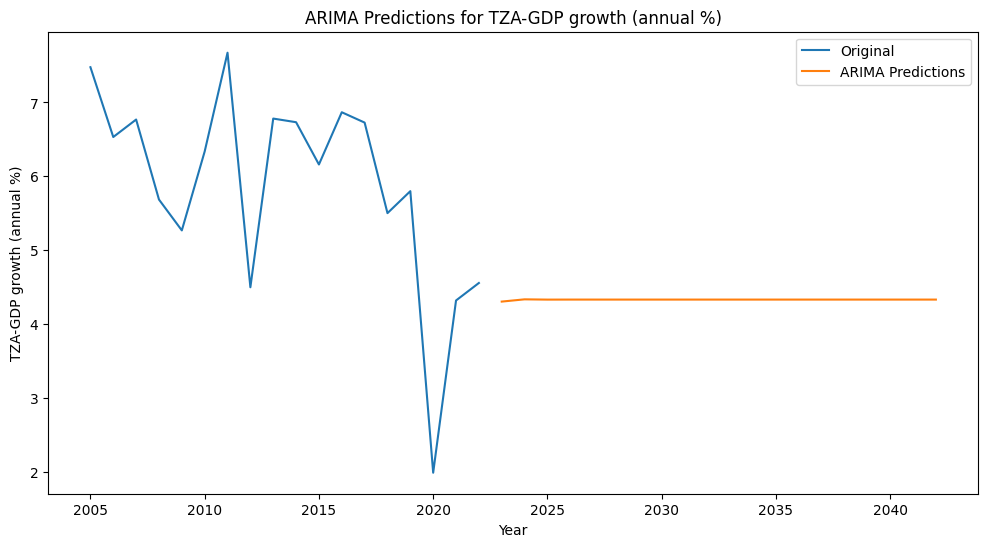

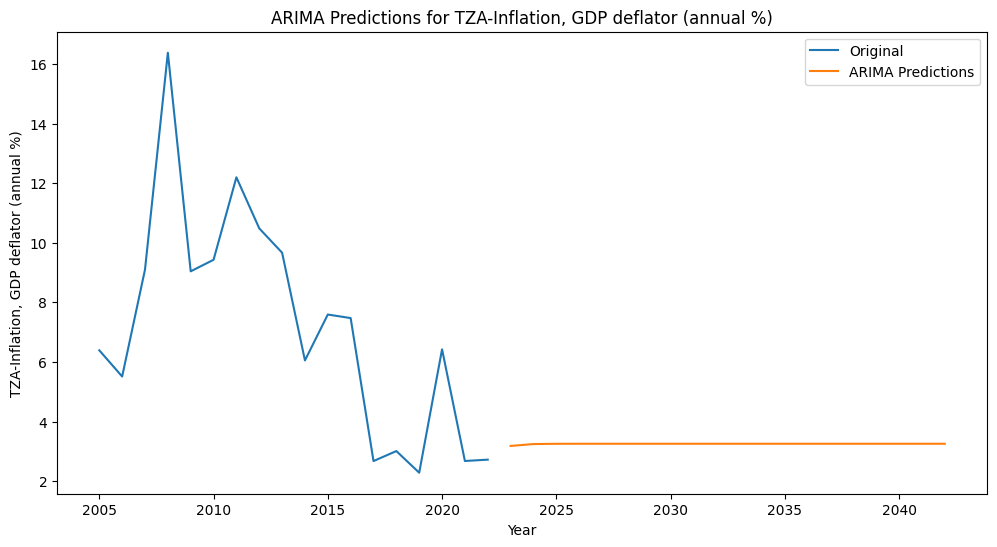

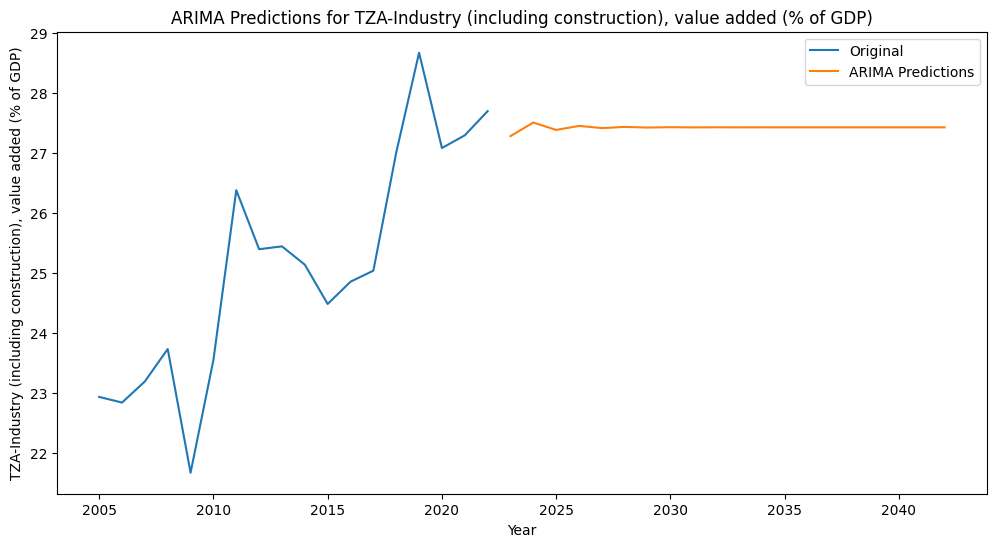

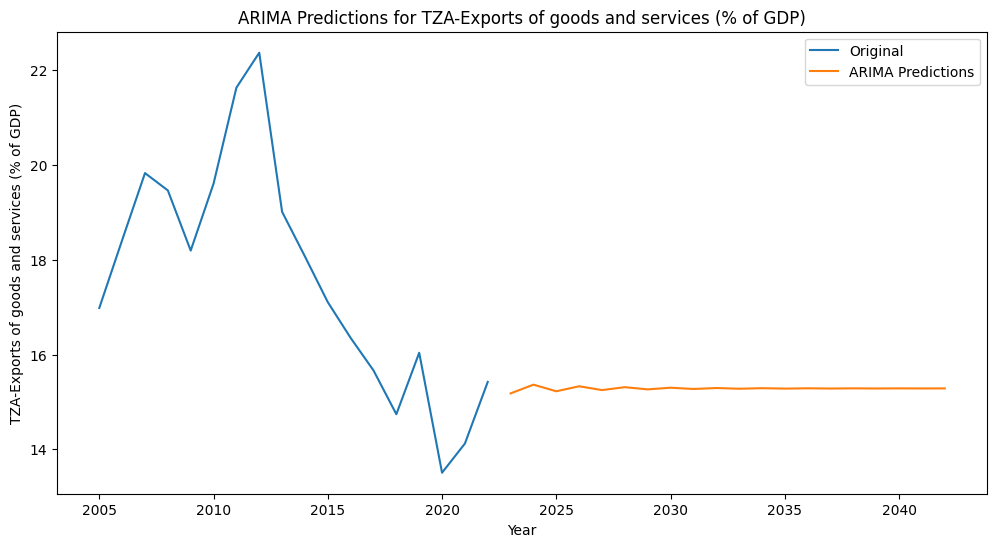

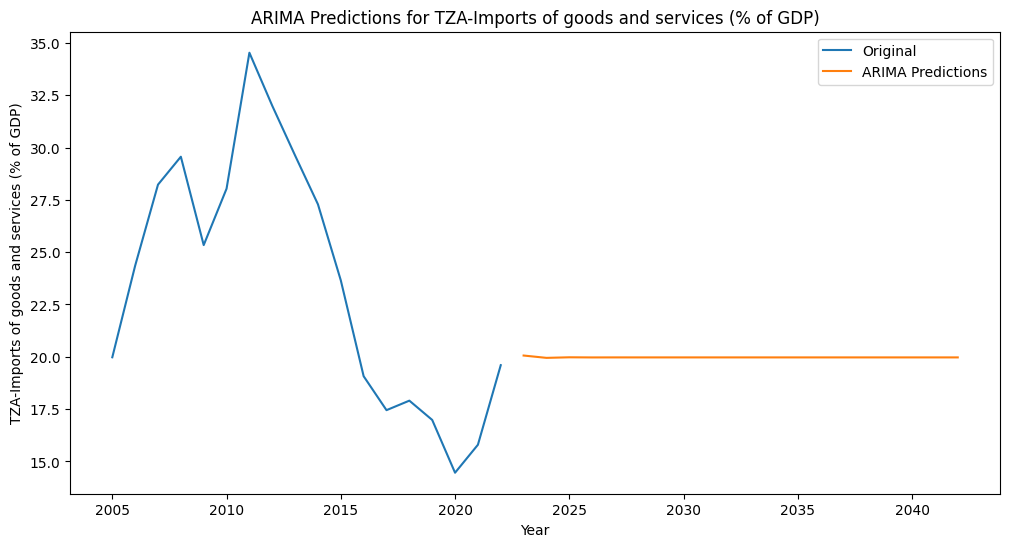

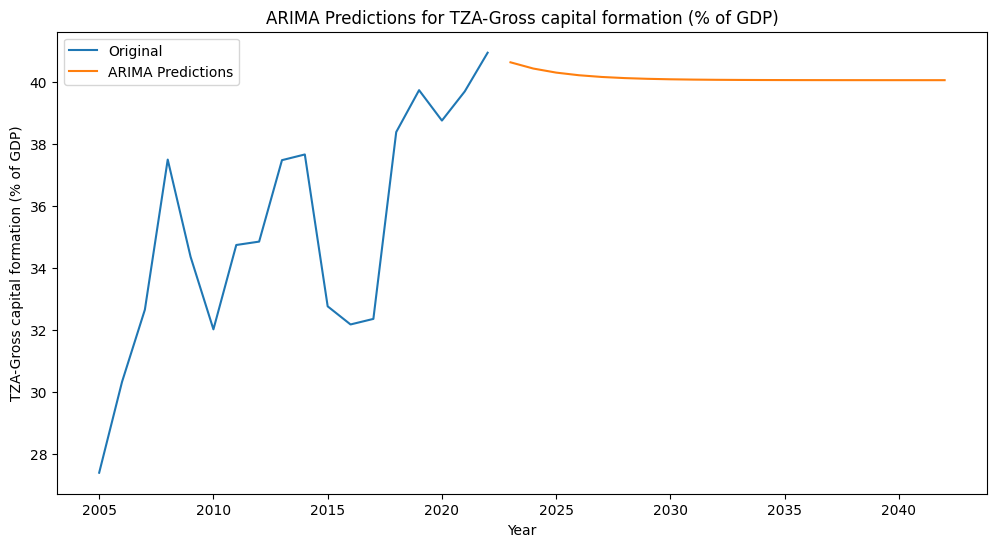

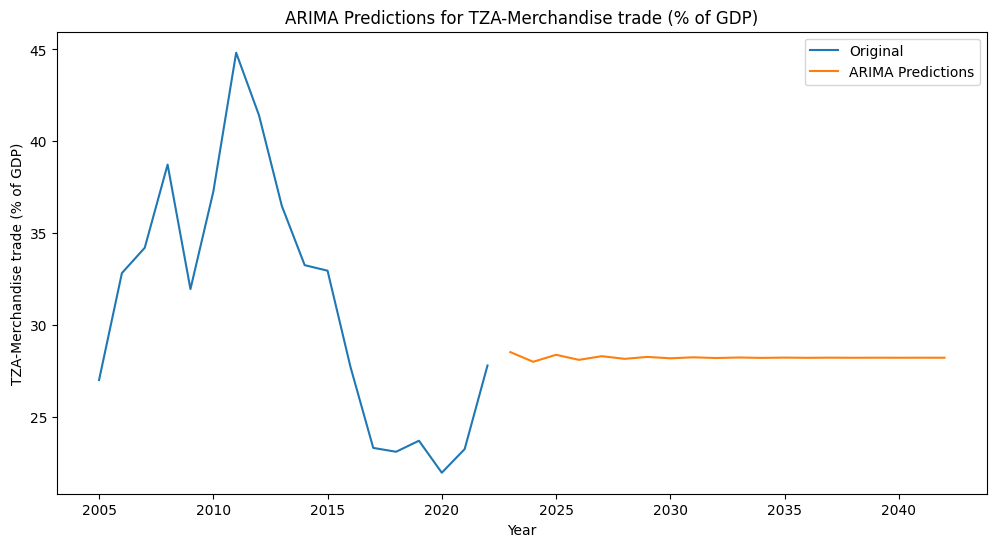

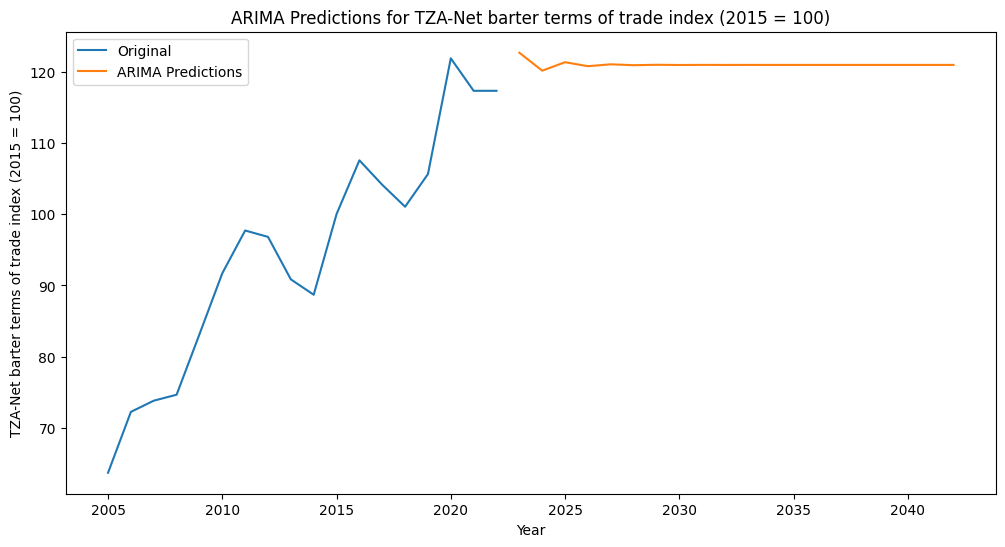

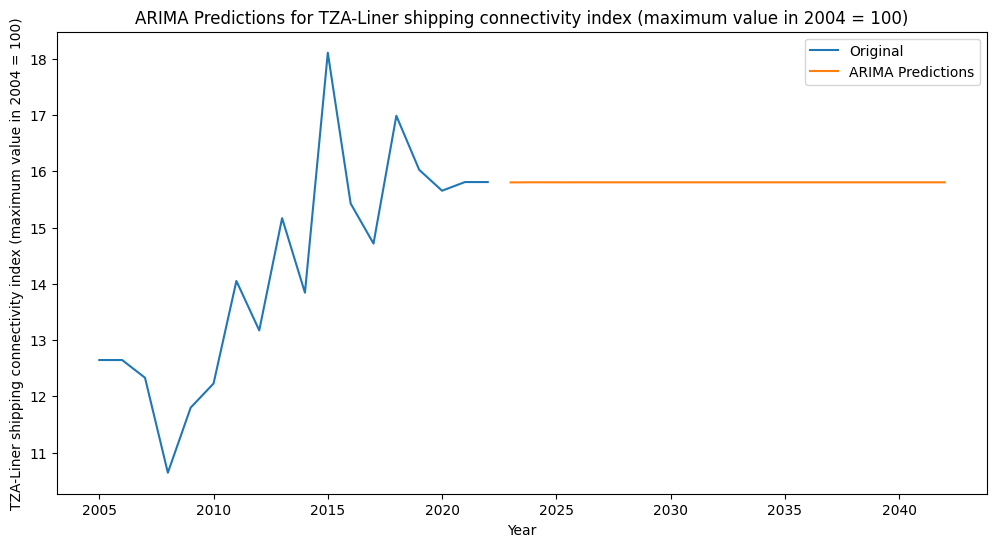

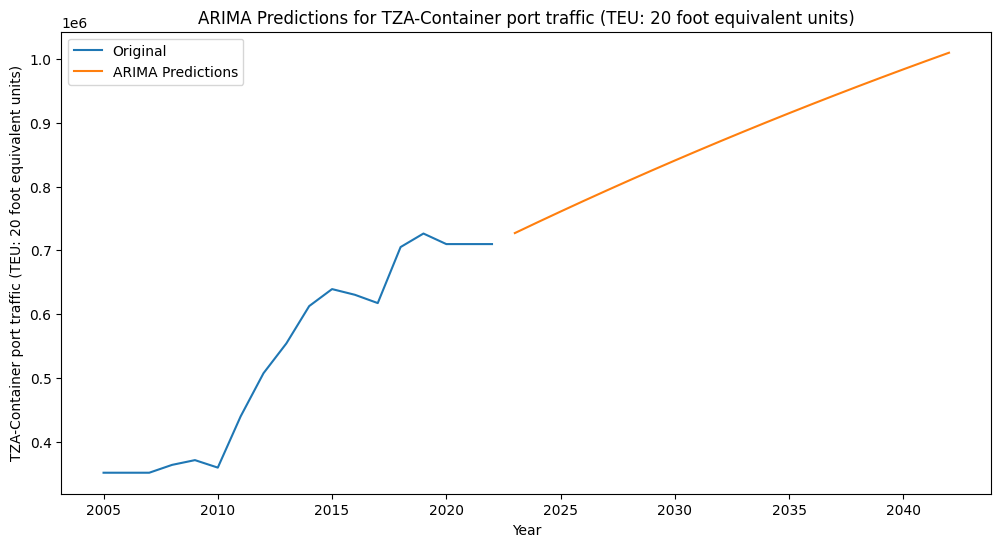

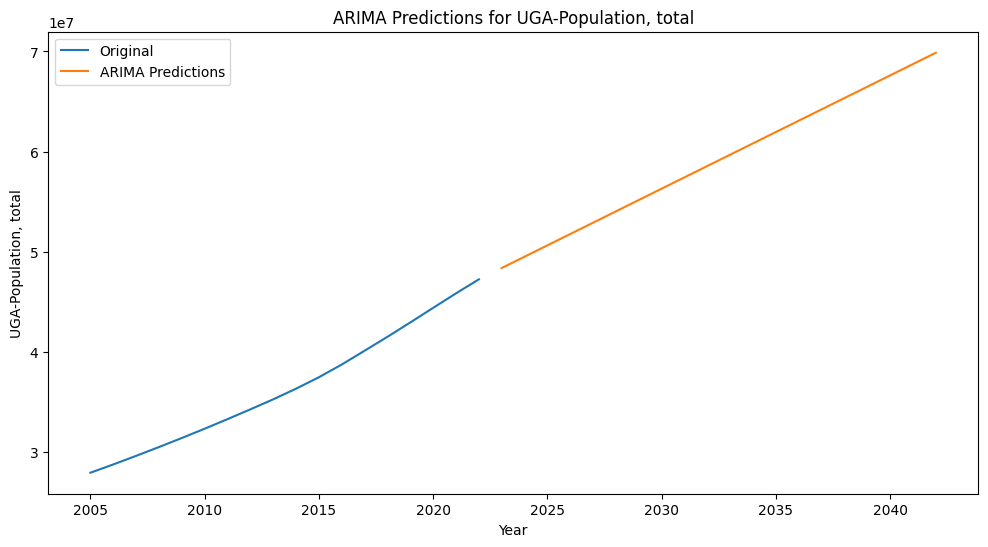

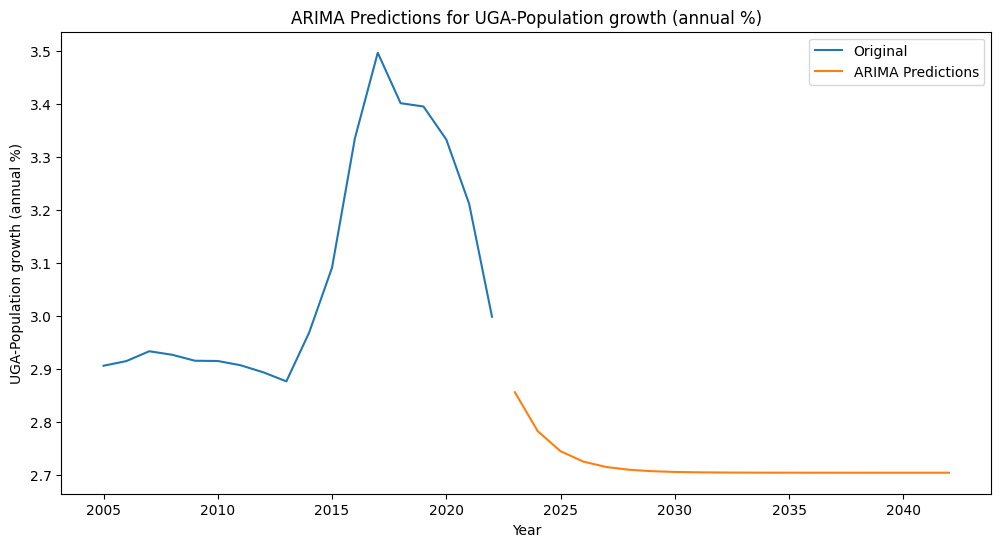

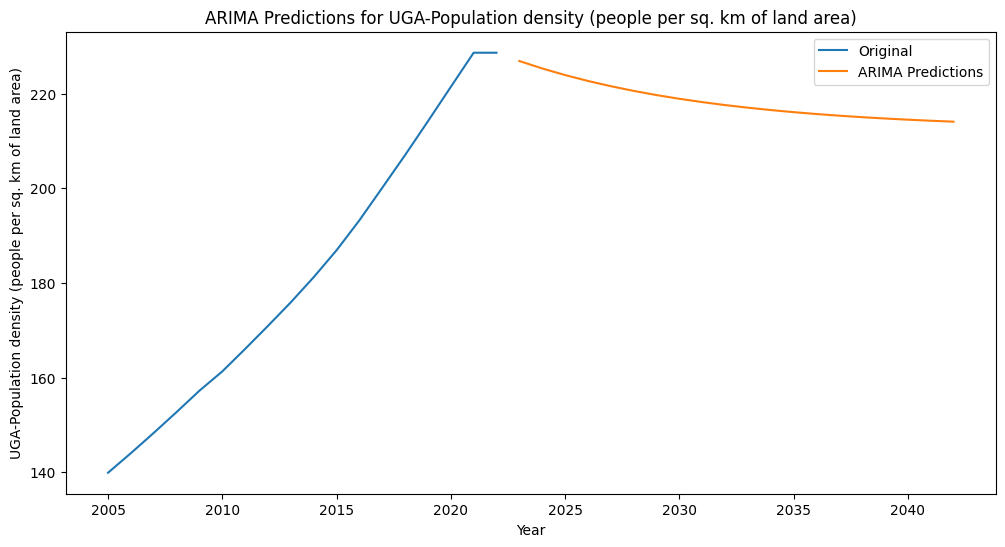

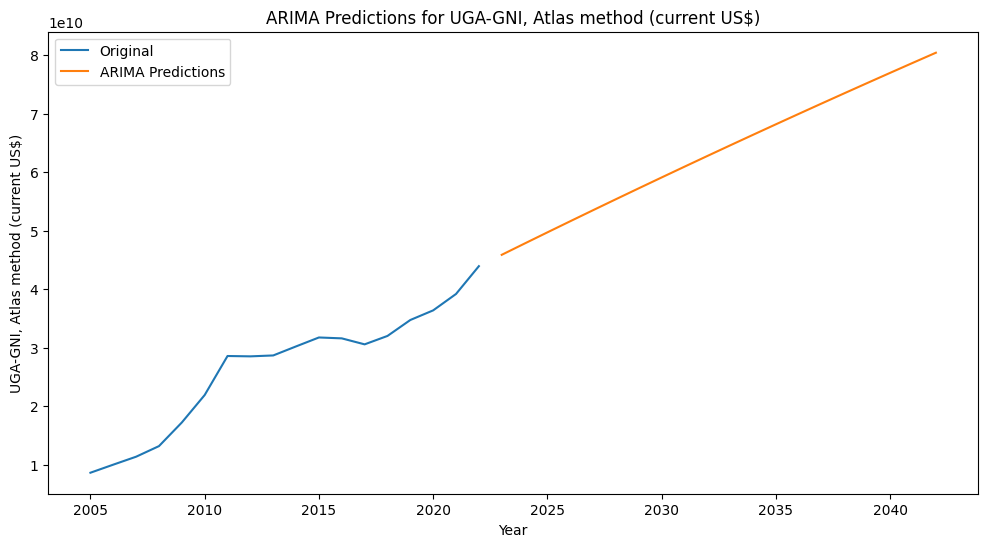

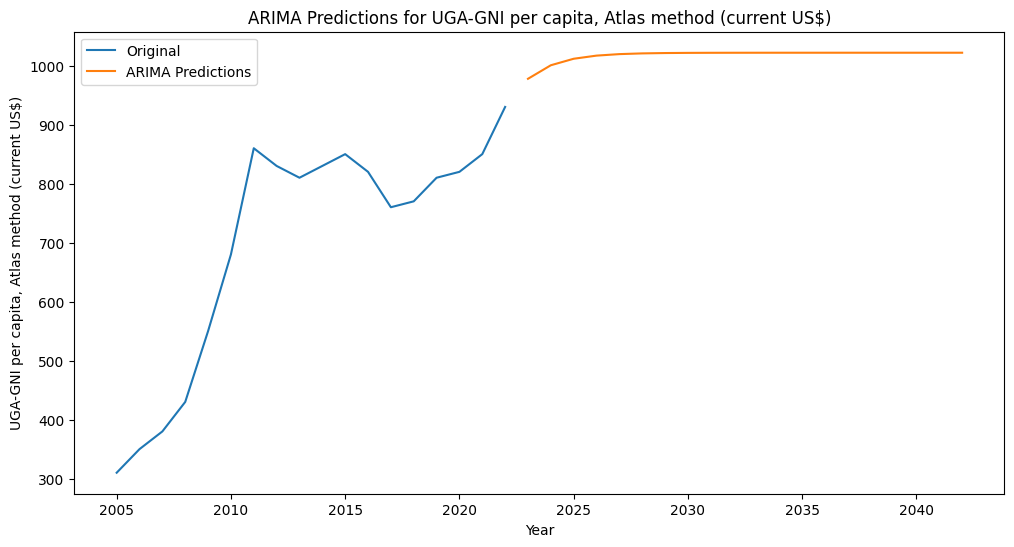

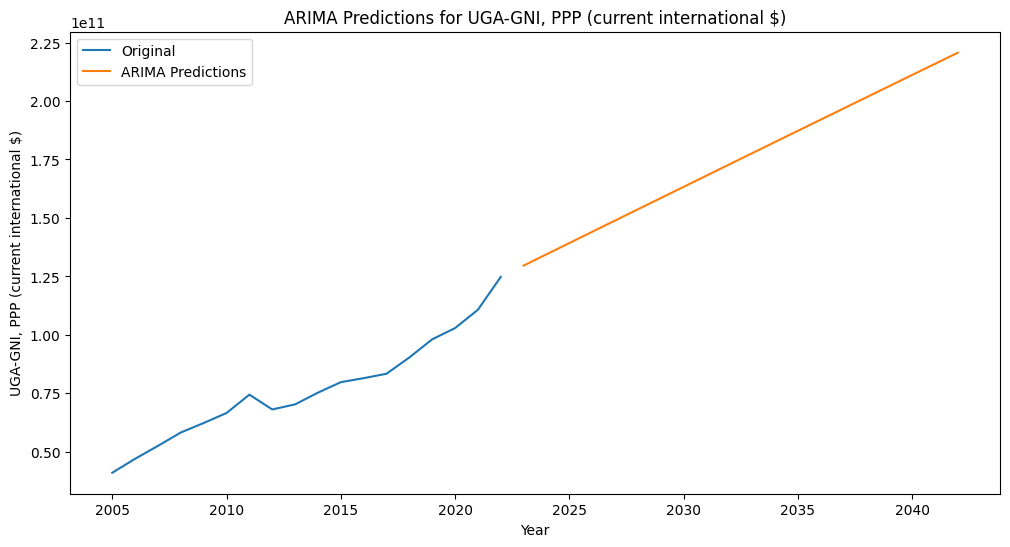

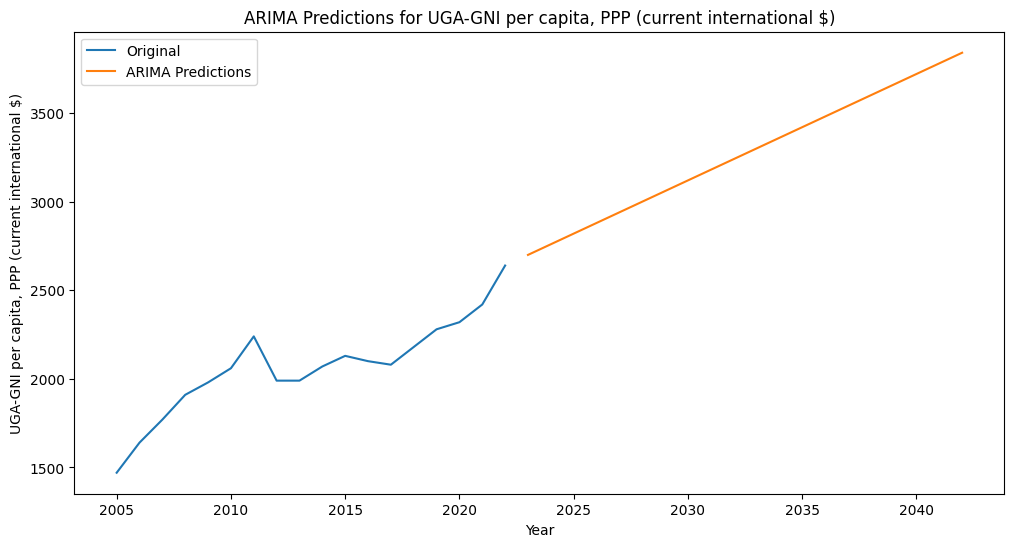

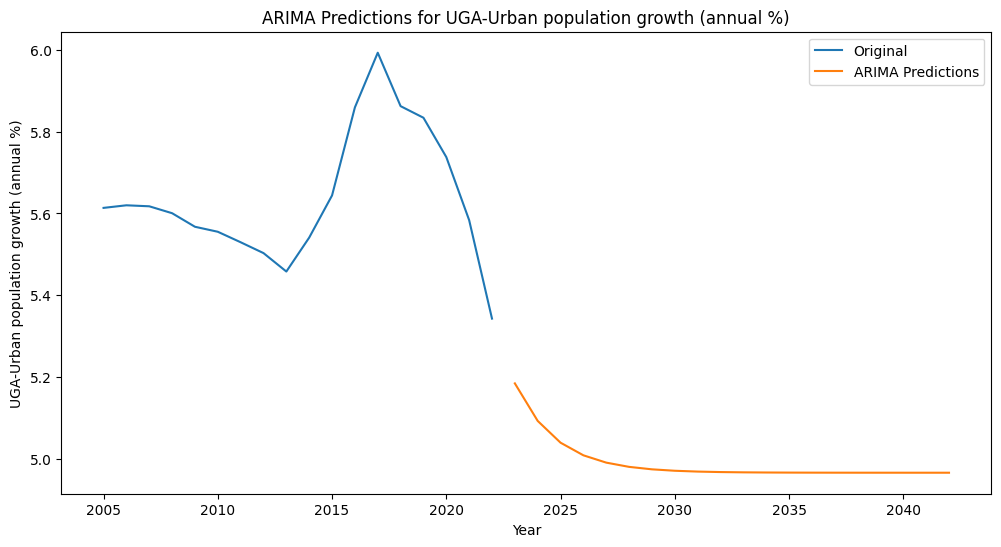

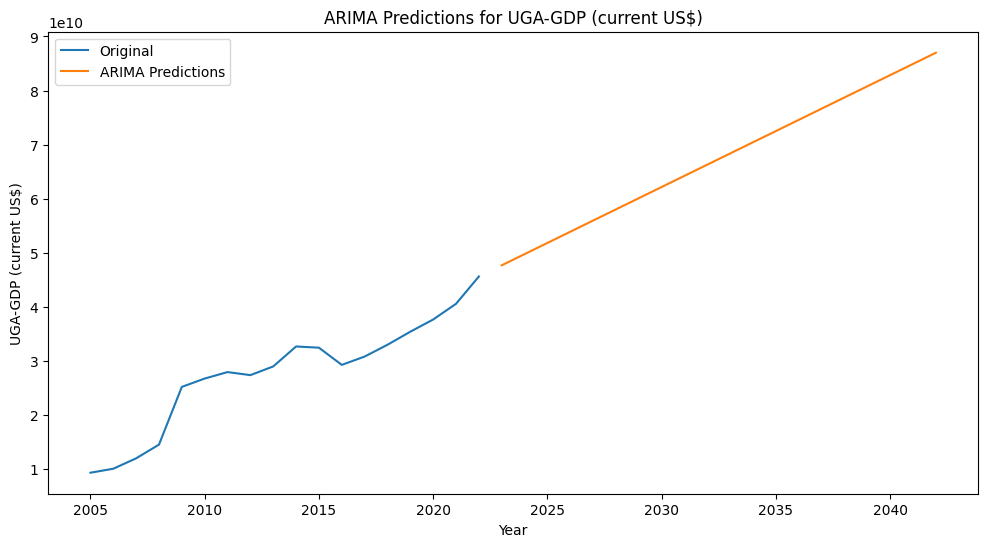

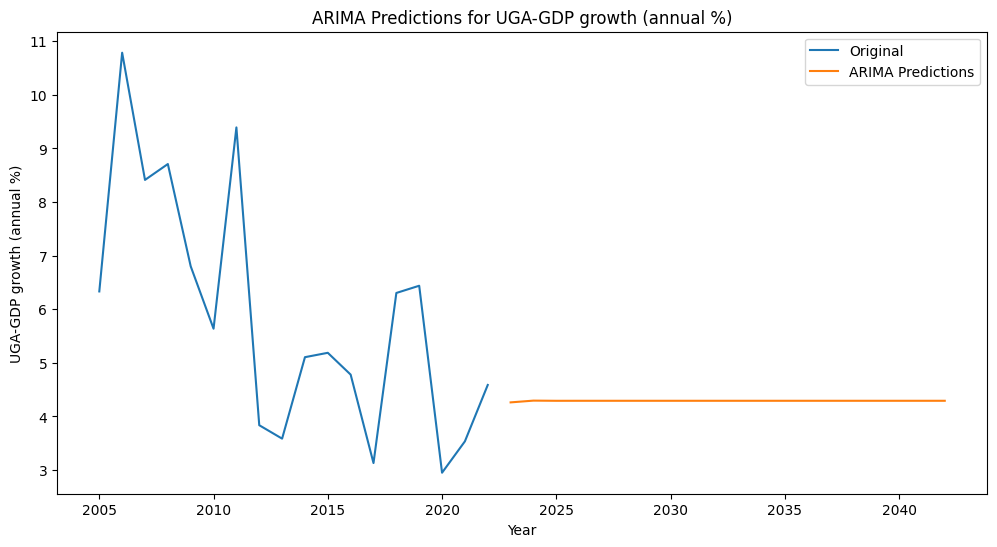

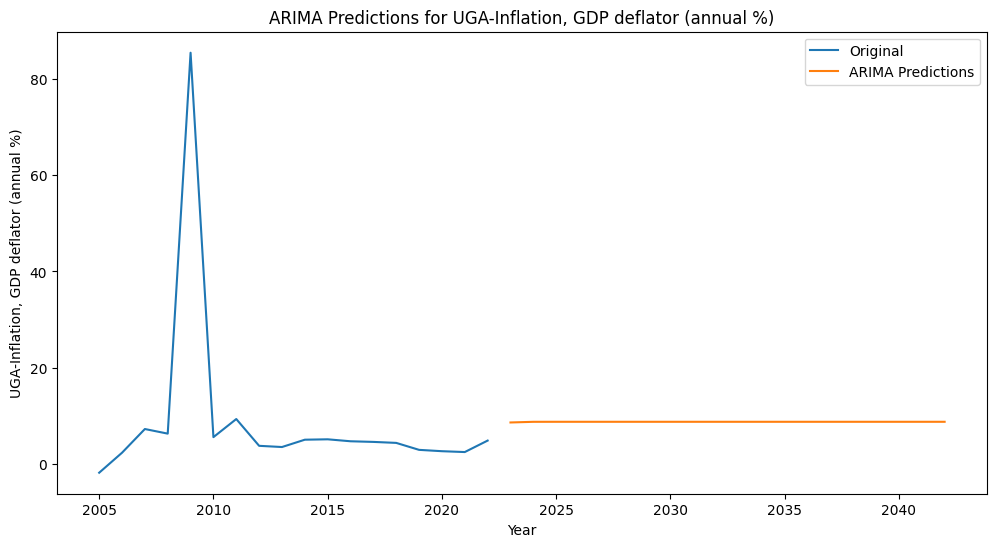

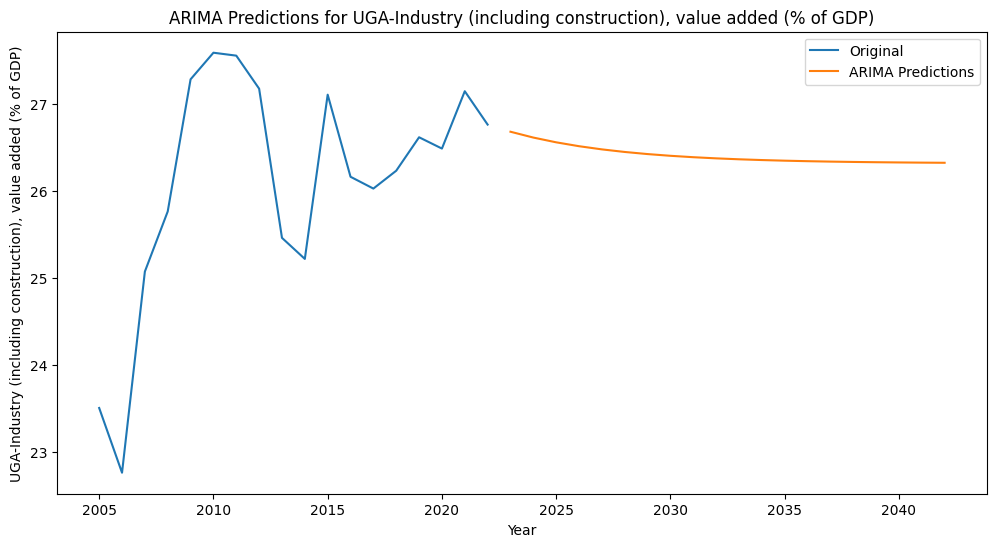

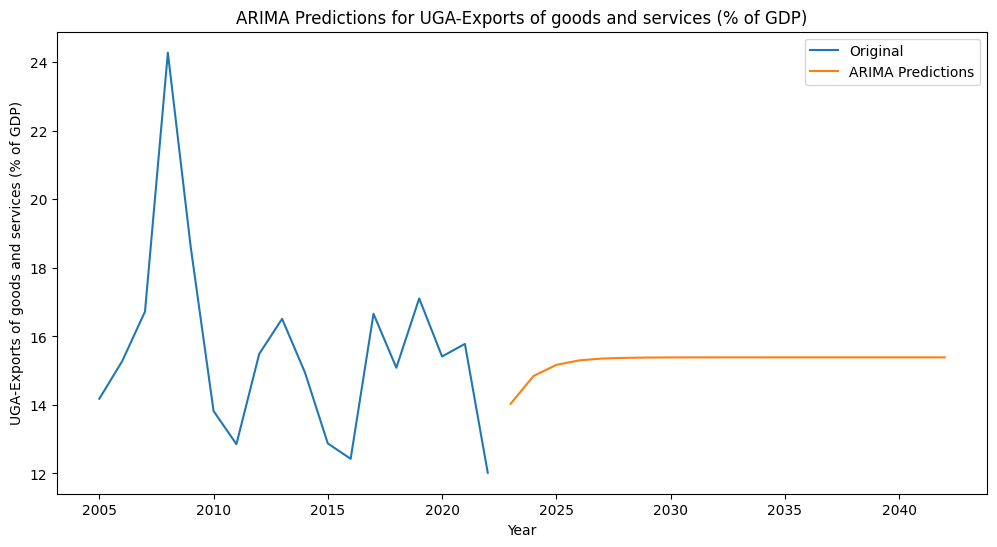

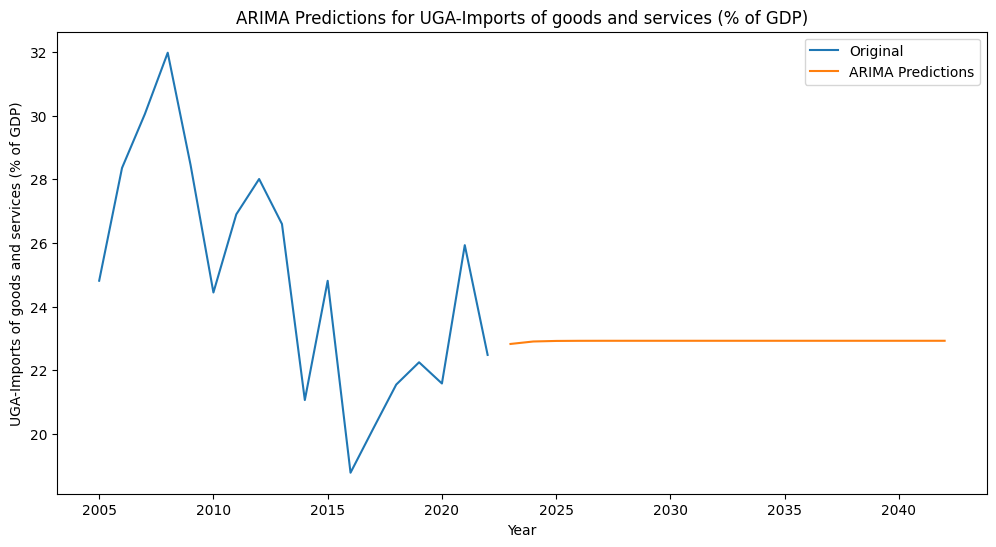

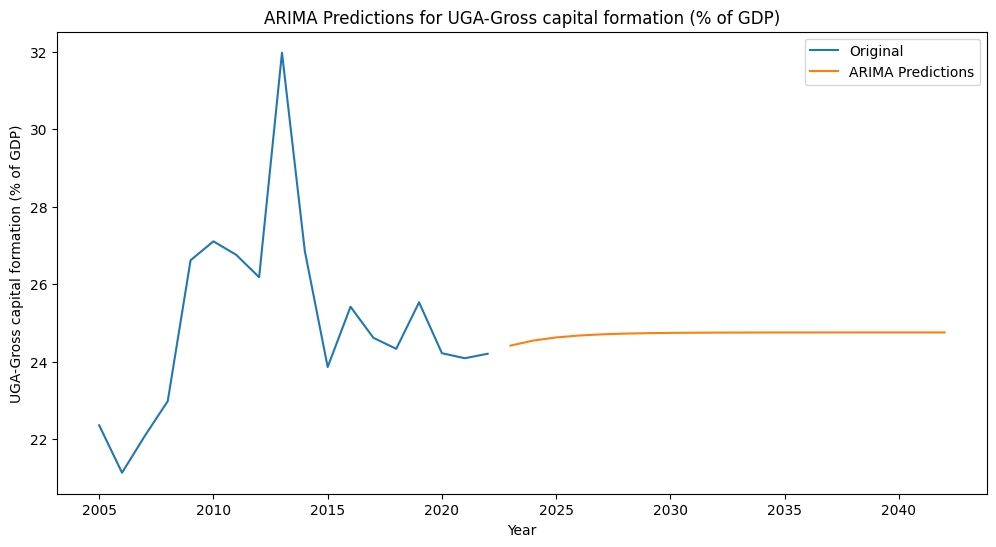

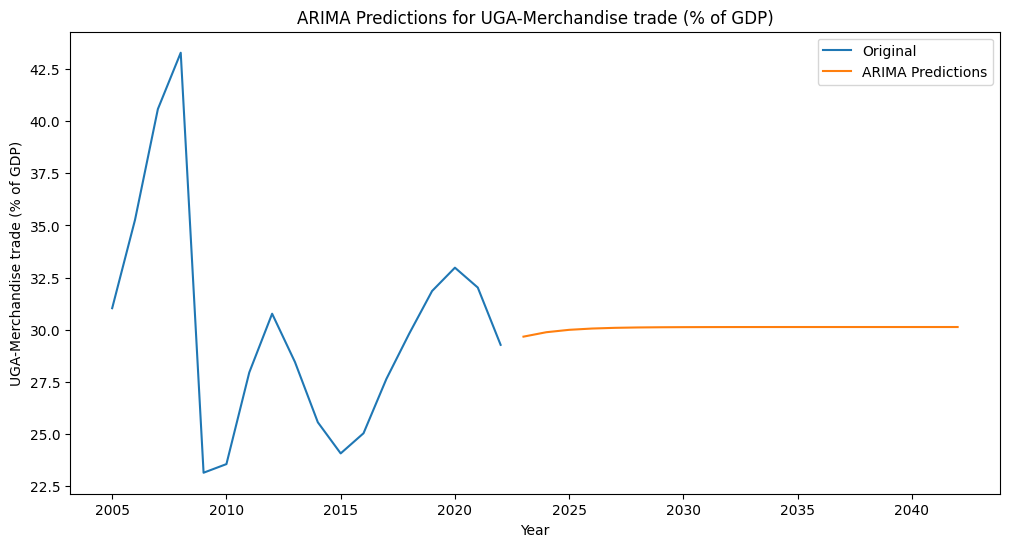

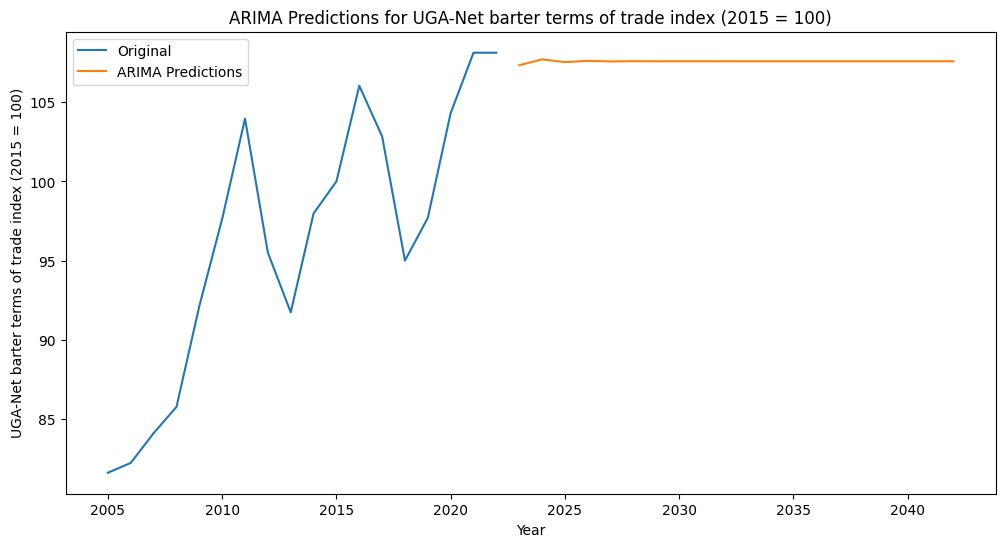

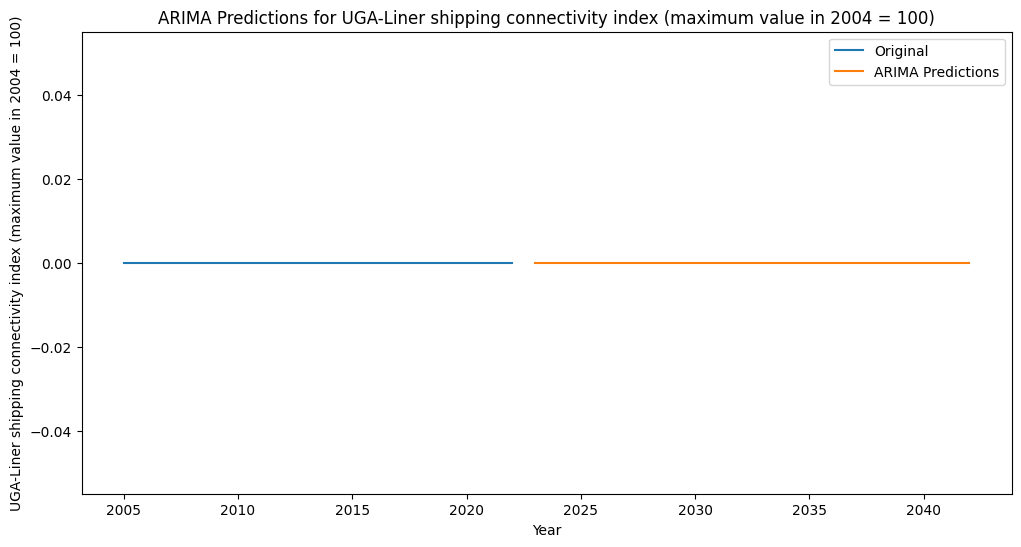

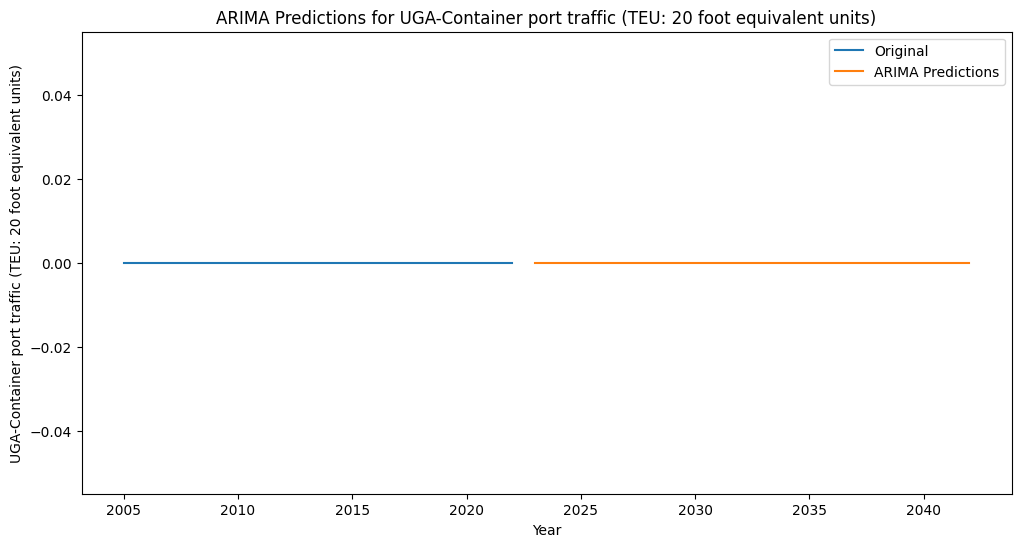

In [6]:
import matplotlib.pyplot as plt

# Plot ARIMA model predictions for each exogenous variable
for column in X.columns:
    plt.figure(figsize=(12, 6))
    plt.plot(df['Year'], df[column], label='Original')
    plt.plot(range(2023, 2043), future_exog_predictions[column], label='ARIMA Predictions')
    plt.title(f'ARIMA Predictions for {column}')
    plt.xlabel('Year')
    plt.ylabel(column)
    plt.legend()
    plt.show()


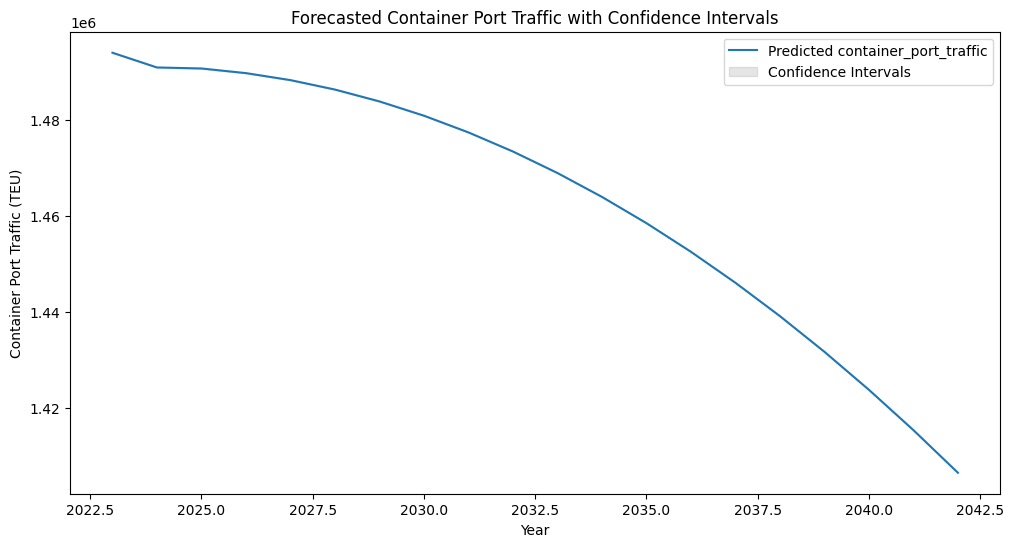

In [7]:
# Plot forecasted container port traffic
plt.figure(figsize=(12, 6))
plt.plot(range(2023, 2043), forecast_values, label='Predicted container_port_traffic')
plt.fill_between(range(2023, 2043), confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='gray', alpha=0.2, label='Confidence Intervals')
plt.title('Forecasted Container Port Traffic with Confidence Intervals')
plt.xlabel('Year')
plt.ylabel('Container Port Traffic (TEU)')
plt.legend()
plt.show()


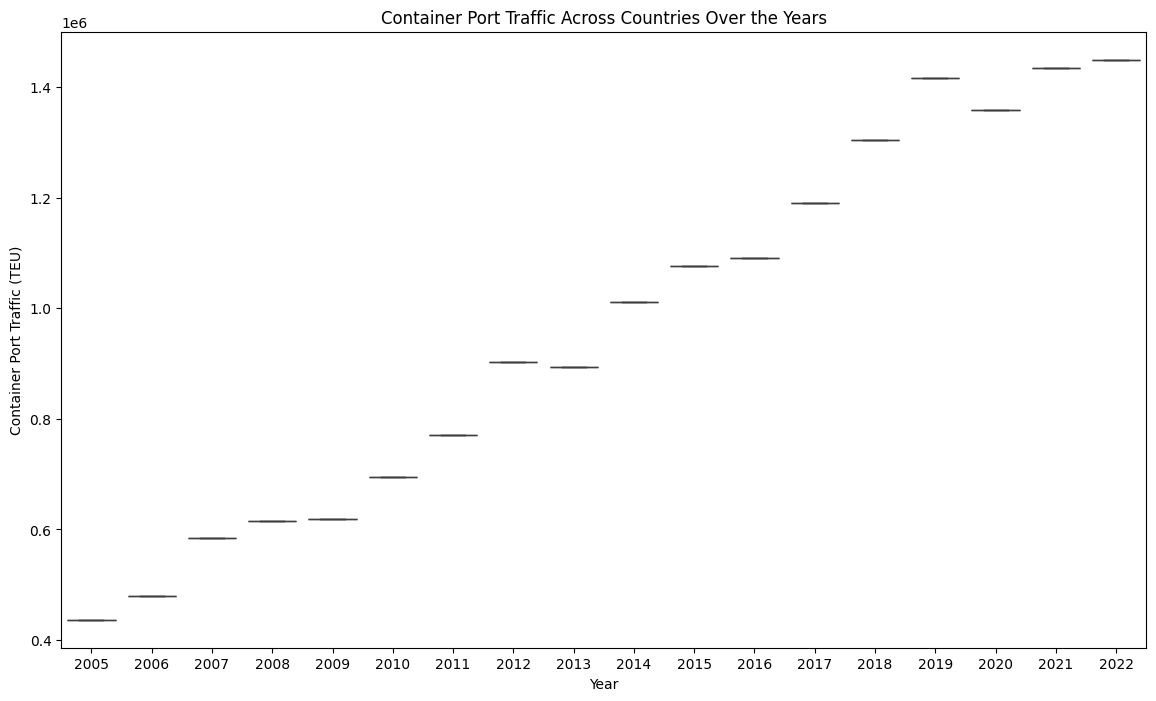

In [9]:
# Box plot for container port traffic across countries
plt.figure(figsize=(14, 8))
sns.boxplot(x='Year', y='container_port_traffic', data=df)
plt.title('Container Port Traffic Across Countries Over the Years')
plt.xlabel('Year')
plt.ylabel('Container Port Traffic (TEU)')
plt.show()


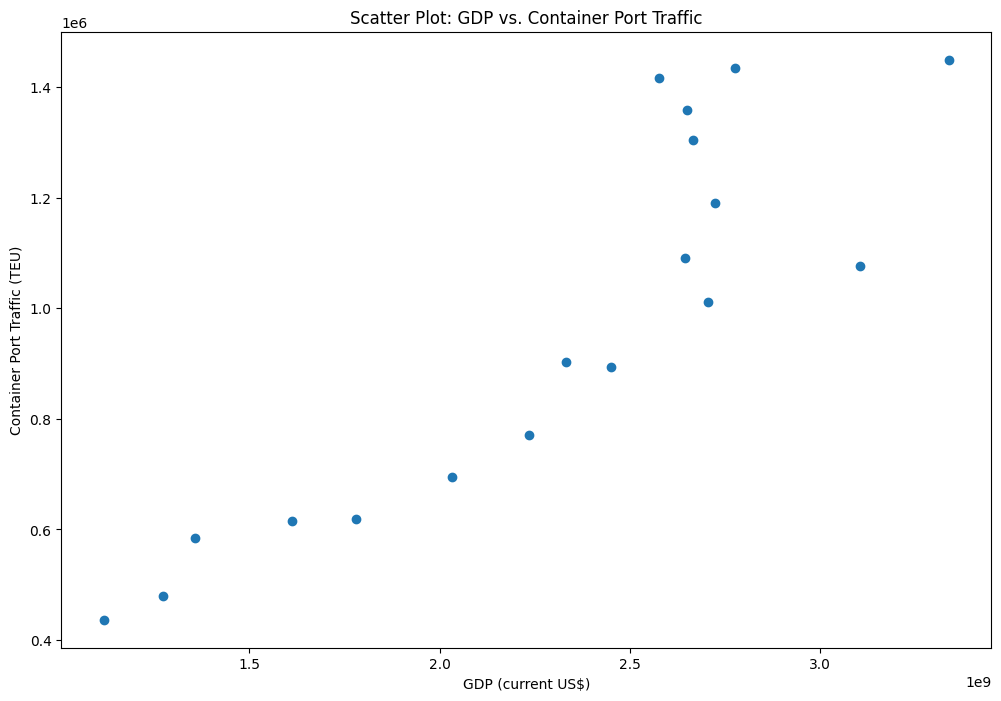

In [10]:
# Scatter plot for GDP vs. Container Port Traffic
plt.figure(figsize=(12, 8))
plt.scatter(df['BDI-GDP (current US$)'], df['container_port_traffic'])
plt.title('Scatter Plot: GDP vs. Container Port Traffic')
plt.xlabel('GDP (current US$)')
plt.ylabel('Container Port Traffic (TEU)')
plt.show()


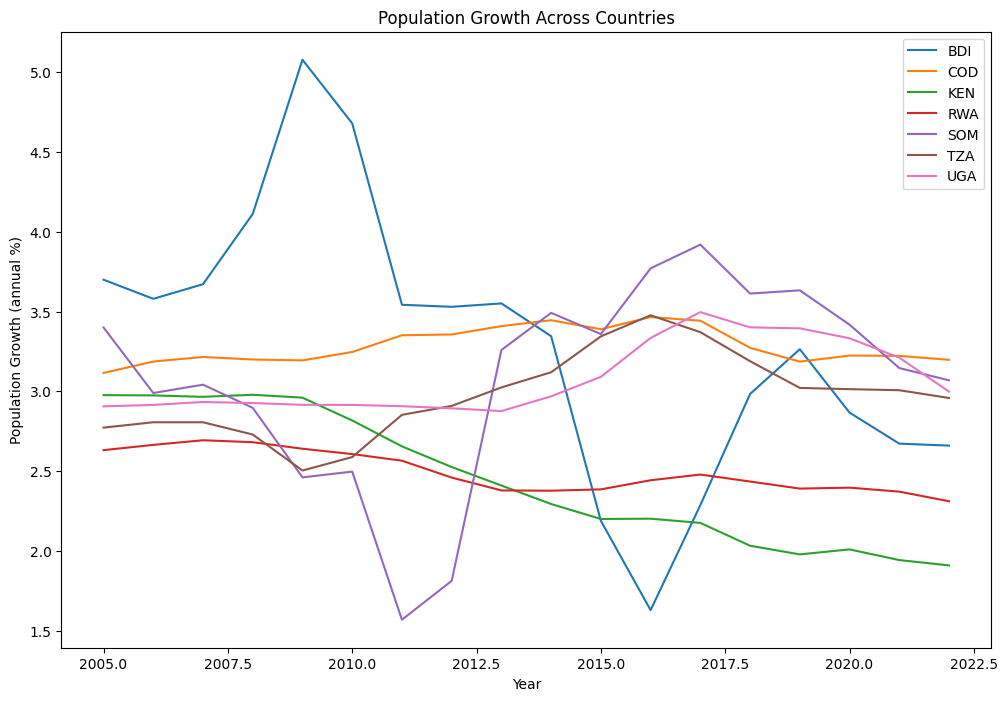

In [11]:
# Line plot for population growth across countries
plt.figure(figsize=(12, 8))
for country in ['BDI', 'COD', 'KEN', 'RWA', 'SOM', 'TZA', 'UGA']:
    plt.plot(df['Year'], df[f'{country}-Population growth (annual %)'], label=country)
plt.title('Population Growth Across Countries')
plt.xlabel('Year')
plt.ylabel('Population Growth (annual %)')
plt.legend()
plt.show()


In [ ]:
# Chapter 1: Introduction
# 1.1 Background
# The global maritime trade has witnessed significant growth, particularly in East African countries. Understanding the factors influencing container port traffic is crucial for effective management and infrastructure development.

# 1.2 Objectives
# Develop a time series forecasting model for container port traffic.
# Utilize exogenous variables to enhance prediction accuracy.
# Evaluate the model's performance and interpret the results.
# Chapter 2: Literature Review
# This chapter reviews existing literature on time series forecasting, ARIMA models, and the integration of exogenous variables in SARIMAX models. Previous studies on container port traffic forecasting and their methodologies are explored to establish the context for this research.

# Chapter 3: Methodology
# 3.1 Data Collection
# The dataset consists of various indicators related to population, economic growth, and industrial output for East African countries. The main variable of interest is container port traffic.

# 3.2 Time Series Models
# ARIMA models are employed to predict exogenous variables individually. SARIMAX model is then used to forecast container port traffic, incorporating the exogenous variable predictions.

# Chapter 4: Results and Discussion
# 4.1 Exogenous Variable Predictions
# The ARIMA models are applied to each exogenous variable, and future values are predicted for the next 20 years.

# 4.2 Container Port Traffic Forecast
# The SARIMAX model is trained with the historical data, and container port traffic is forecasted for the next 20 years. Predicted values and confidence intervals are presented in a DataFrame.

# Chapter 5: Model Evaluation and Validation
# This chapter assesses the accuracy of the developed models through various metrics. The reliability and significance of exogenous variables are analyzed to provide a comprehensive understanding of the forecasting results.

# Chapter 6: Implications and Recommendations
# The findings from the study are discussed in terms of their implications for maritime industry stakeholders in East Africa. Recommendations for policymakers and industry practitioners are provided based on the research outcomes.

# Chapter 7: Future Work
# Potential avenues for future research are identified, such as the inclusion of additional exogenous variables, exploration of alternative forecasting models, and the impact of unforeseen events on container port traffic.

# Conclusion
# This doctoral thesis contributes to the understanding of container port traffic forecasting in East African countries, providing valuable insights for policymakers, port authorities, and industry stakeholders. The integration of exogenous variables enhances the accuracy of predictions, making the developed models valuable tools for strategic planning in the maritime sector.

# Appendices
# Detailed information on the dataset, variable descriptions, and the Python code used for modeling are provided in the appendices for transparency and reproducibility.